In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook, _tqdm_notebook


# 基本資料

In [3]:
df = pd.read_excel('大陸投資100強data.xlsx', sheetname = 0)
pd.set_option('display.max_columns', None)
df.head(10)

/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


公司代碼         年月 轉投資名稱  上市別  TSE 產業別  會計月份   員工人數      實收資本額(元)  面額  \
0  2330 台積電 2017-12-29   _合計  TSE       24    12  48752  259303804580  10   
1   2303 聯電 2017-12-29   _合計  TSE       24    12  19929  117243187150  10   
2   1326 台化 2017-12-29   _合計  TSE        3    12   5049   58611862910  10   
3   2201 裕隆 2017-12-29   _合計  TSE       12    12  12402   15729199090  10   
4   9940 信義 2017-12-29   _合計  TSE       20    12   5639    7368465000  10   
5   4938 和碩 2017-12-29   _合計  TSE       25    12   7008   26110918560  10   
6  2882 國泰金 2017-12-29   _合計  TSE       17    12  55470  147025101280  10   
7   1101 台泥 2017-12-29   _合計  TSE        1    12   9993   56656192040  10   
8   3044 健鼎 2017-12-29   _合計  TSE       28    12  20225    5256058980  10   
9   2603 長榮 2017-12-29   _合計  TSE       15    12   6588   48129737860  10   

  幣別(IPO&面額)  首次承銷價格     TSE舊產業名     TEJ產業名      TEJ子產業名      TSE新產業名  \
0        NTD   90.00  M2300 電子工業   M23G 半導體  M23G1A 晶圓代工    M2324 半導體   
1        NTD   13.00  M2300 電子工業   M23G 半導體  M23G1A 晶圓代工    M2324 半導體   
2        NTD   24.76  M1300 塑膠工業    M13A 石化   M13A1 泛用塑膠   M1300 塑膠工業   
3        NTD   11.48  M2200 汽車工業  M22A 汽車製造    M22A 汽車製造   M2200 汽車工業   
4        NTD   20.30    M9900 其他  M25D 仲介建經    M25D 仲介建經     M9900 其他   
5        NTD   36.00  M2300 電子工業  M23A PC系統     M23A2 NB  M2325 電腦及週邊   
6        NTD     NaN   M2800 金融業  M28L 金融控股    M28L 金融控股    M2800 金融業   
7        NTD     NaN  M1100 水泥工業  M11A 水泥製造    M11A 水泥製造   M1100 水泥工業   
8        NTD   26.80  M2300 電子工業   M23B 主機板   M23B2D PCB  M2328 電子零組件   
9        NTD   35.00   M2600 航運業    M26A 海運    M26A2 貨櫃輪    M2600 航運業   

            TEJ產業指數                         主要經營業務1  \
0  TEJT16  電子- 晶圓製造  依客戶之訂單與其提供之產品設計說明，以從事製造與銷售積體電路   
1  TEJT16  電子- 晶圓製造                            積體電路   
2  TEJN03  傳產- 塑膠原料    純對苯二甲酸、聚苯乙烯、苯乙烯、鄰二甲苯、對二甲苯、苯、   
3    TEJN16  傳產- 汽車                              汽車   
4    TEJN17  傳產- 營建                       房屋買賣之居間仲介   
5    TEJT01  電子- PC                     電信管制射頻器材製造業   
6  TEJF01  金融- 金融中介                              投資   
7    TEJN01  傳產- 水泥                 有關水泥及水泥製品之生產及運銷   
8   TEJT03  電子- PCB                           印刷電路板   
9   TEJN18  傳產- 海空運       G301011船舶運送業、G401011船務代理業   

                          主要經營業務2                       主要經營業務3  \
0  以及其他晶圓半導體裝置。提供前述產品之封裝與測試服務、積體電    路之電腦輔助設計技術服務。提供製造光罩及其設計服務。   
1                      各種半導體相關零組件                           NaN   
2      合成酚、丙酮、聚丙烯、二甲基甲醯胺、ABS、嫘縈棉、     合成纖維紗、布、耐隆絲、耐隆絲布及其染整加工等製銷   
3                              零件                         保修及其他   
4                      住宅及大樓開發租售業                           NaN   
5                     電信管制射頻器材輸入業         除許可業務外，得經營法令非禁止或限制之業務   
6                              管理                           NaN   
7  有關水泥原料及水泥製品原料之開採製造運銷及附屬礦石之開採經銷                經營有關水泥工業及其附屬事業   
8                         工業自動化機械                       電子收銀機系統   
9                 G404011貨櫃集散站經營業  ZZ99999除許可業務外，得經營法令非禁止或限制之業務   

                                             主要產品比重        會計師事務所 TEJ產業_代碼  \
0                       2018/12:晶圓(88.4%),其他(11.7%)  勤業眾信聯合會計師事務所     M23G   
1                   2018/12:晶圓製造整合(99.9%),新事業(0.1%)    安永聯合會計師事務所     M23G   
2      2018/12:純對苯二甲酸(13.7%),ABS 樹脂(12.9%),其他(9.7%)    資誠聯合會計師事務所     M13A   
3                       2018/12:車輛(87.3%),零件(12.7%)  勤業眾信聯合會計師事務所     M22A   
4                    2018/12:信義嘉庭(94.5%),信義謙石(5.5%)  勤業眾信聯合會計師事務所     M25D   
5                    2018/12:3C電子產品(97.4%),其他(2.6%)  安侯建業聯合會計師事務所     M23A   
6     2018/12:保險業務淨收益(43.9%),淨利息收益(38.1%),其他(25.7%)  勤業眾信聯合會計師事務所     M28L   
7            2018/12:水泥及熟料(68.7%),化工產品(13%),電力(11%)  勤業眾信聯合會計師事務所     M11A   
8                2018/12:印刷電路板(PCB)(98.9%),其他(1.1%)  勤業眾信聯合會計師事務所     M23B   
9  2018/12:客戶合約-船東(92.8%),貨櫃碼頭(4.2%),客戶合約-代理行(1.7%)    資誠聯合會計師事務所     M26A   

  TEJ產業_名稱 TEJ子產業_代碼 TEJ子產業_名稱 TSE新產業_代碼 TSE新產業_名稱  本期匯出金額(NTD)  
0      半導體    M23G1A      晶圓代工     M2324       半導體     21724892  
1      半導體    M23G1A

In [3]:
pd.set_option('display.max_rows', None)
df['公司代碼']

0      2330 台積電
1       2303 聯電
2       1326 台化
3       2201 裕隆
4       9940 信義
5       4938 和碩
6      2882 國泰金
7       1101 台泥
8       3044 健鼎
9       2603 長榮
10     5880 合庫金
11     1907 永豐餘
12      1802 台玻
13      1313 聯成
14      1304 台聚
15     2352 佳世達
16      1216 統一
17      1308 亞聚
18     2883 開發金
19      2388 威盛
20      9941 裕融
21     2912 統一超
22     2454 聯發科
23     1314 中石化
24     2456 奇力新
25    2104 國際中橡
26     1402 遠東新
27      1710 東聯
28      6239 力成
29      1227 佳格
30      1598 岱宇
31     5469 瀚宇博
32      2392 正崴
33      1717 長興
34      6269 台郡
35     2207 和泰車
36      9939 宏全
37      6235 華孚
38      1709 和益
39      4532 瑞智
40      2501 國建
41      3032 偉訓
42      6414 樺漢
43      6288 聯嘉
44      2464 盟立
45      4961 天鈺
46      8039 台虹
47      1904 正隆
48      6605 帝寶
49      2905 三商
50      3037 欣興
51      6409 旭隼
52      1218 泰山
53     2308 台達電
54     2427 三商電
55      4720 德淵
56      3607 谷崧
57      3164 景岳
58      1609 大亞
59     9919 康那香
60      1789 神隆
61      4555 氣立
62      

In [4]:
df.columns

Index(['公司代碼', '年月', '轉投資名稱', '上市別', 'TSE 產業別', '會計月份', '員工人數', '實收資本額(元)',
       '面額', '幣別(IPO&面額)', '首次承銷價格', 'TSE舊產業名', 'TEJ產業名', 'TEJ子產業名', 'TSE新產業名',
       'TEJ產業指數', '主要經營業務1', '主要經營業務2', '主要經營業務3', '主要產品比重', '會計師事務所',
       'TEJ產業_代碼', 'TEJ產業_名稱', 'TEJ子產業_代碼', 'TEJ子產業_名稱', 'TSE新產業_代碼',
       'TSE新產業_名稱', '本期匯出金額(NTD)'],
      dtype='object')

# 匯出金額
1. https://www.moeaic.gov.tw/business_category.view?lang=ch&seq=3
2. 總金額一億

In [5]:
sum(df['本期匯出金額(NTD)']) * 1000

109589854000

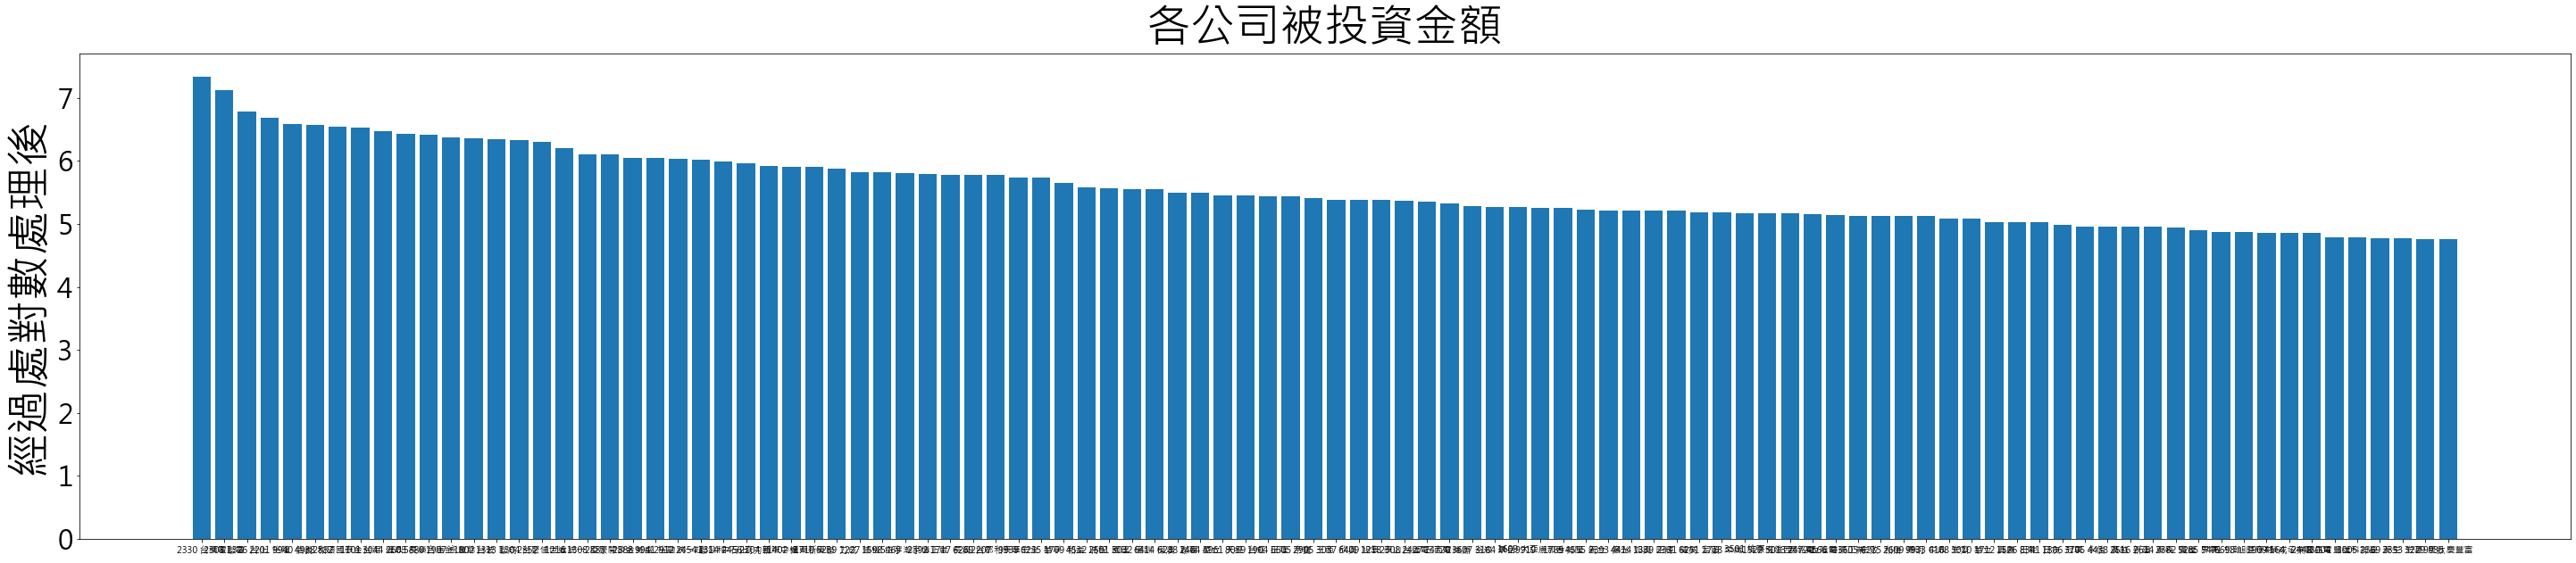

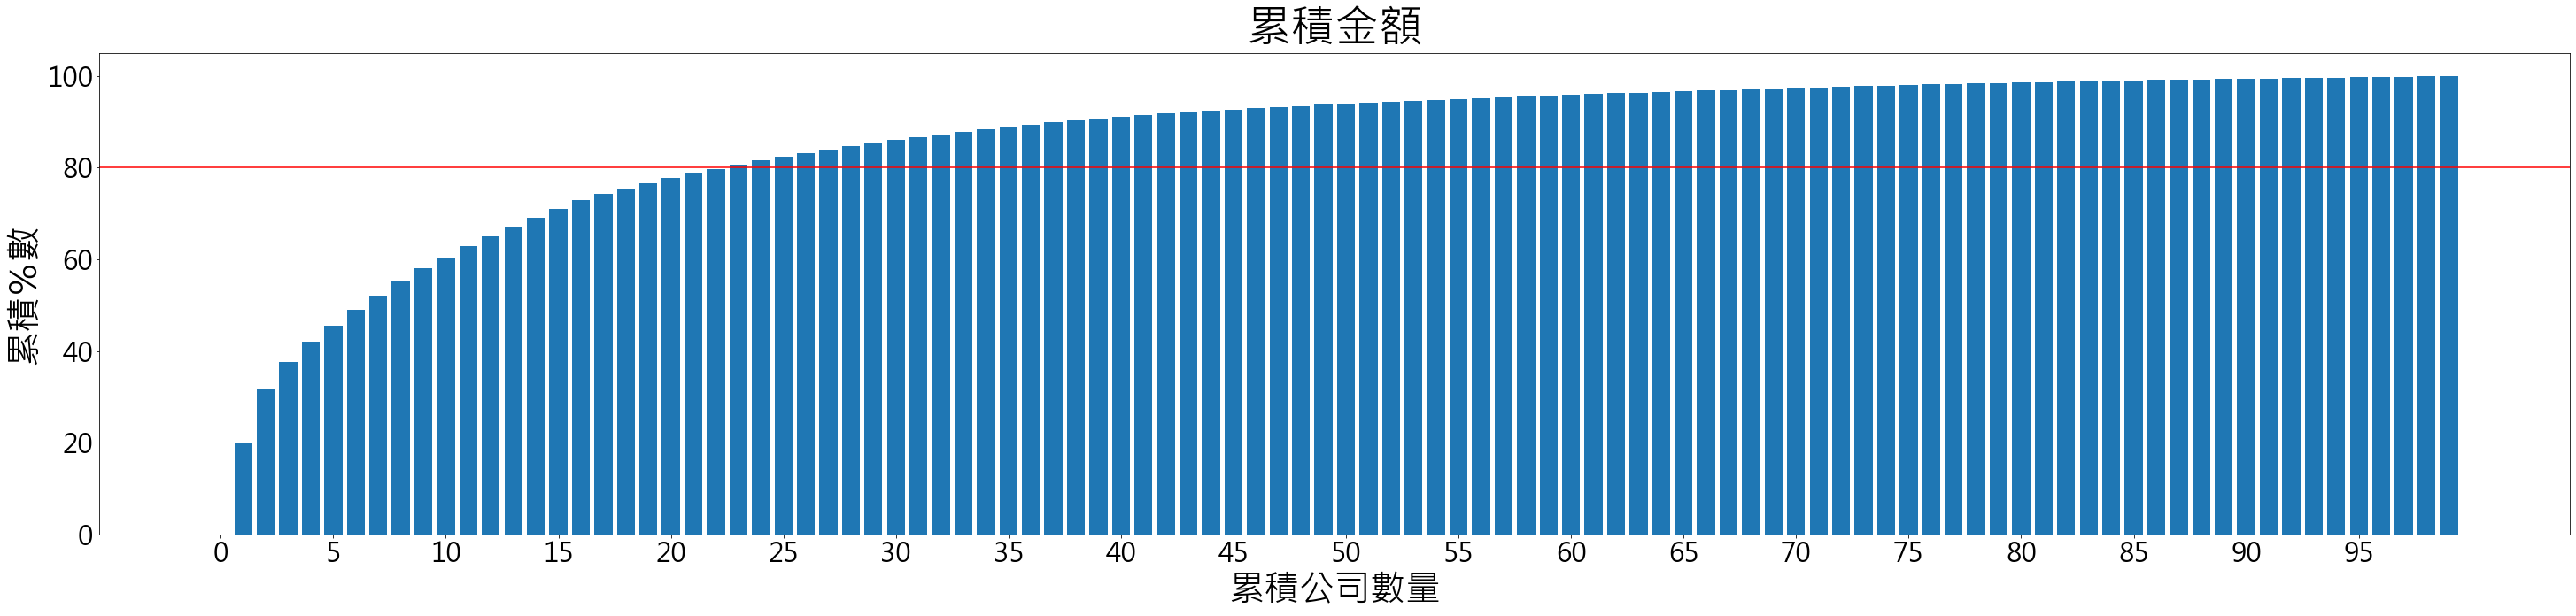

count    1.000000e+02
mean     1.095899e+06
std      2.678541e+06
min      5.709600e+04
25%      1.356162e+05
50%      2.495810e+05
75%      8.603125e+05
max      2.172489e+07
Name: 本期匯出金額(NTD), dtype: float64

In [6]:
x = df['公司代碼']
y = np.log10(df['本期匯出金額(NTD)'])
plt.figure(figsize = (50,10))
plt.bar(x,y)
plt.ylabel('經過處對數處理後', fontsize = 50)
plt.title('各公司被投資金額', fontsize = 50)
plt.yticks(fontsize = 30)
plt.show()
#-------------------------------累計分配------------------------------------------------------------------------
total_cash = sum(df['本期匯出金額(NTD)'])
plt.figure(figsize = (50,10))
x = [z for z in range(0, 100)]
y= [sum(df['本期匯出金額(NTD)'][:z])/total_cash*100 for z in range(0, 100)]
plt.bar(x,y)
plt.title('累積金額', fontsize = 50)
plt.ylabel('累積％數', fontsize = 40)
plt.xlabel('累積公司數量', fontsize = 40)
plt.xticks(np.arange(0, 100, step = 5),fontsize = 30)
plt.yticks(fontsize = 30)
plt.axhline(80, color= 'r')
plt.show()
df['本期匯出金額(NTD)'].describe()

# 員工人數

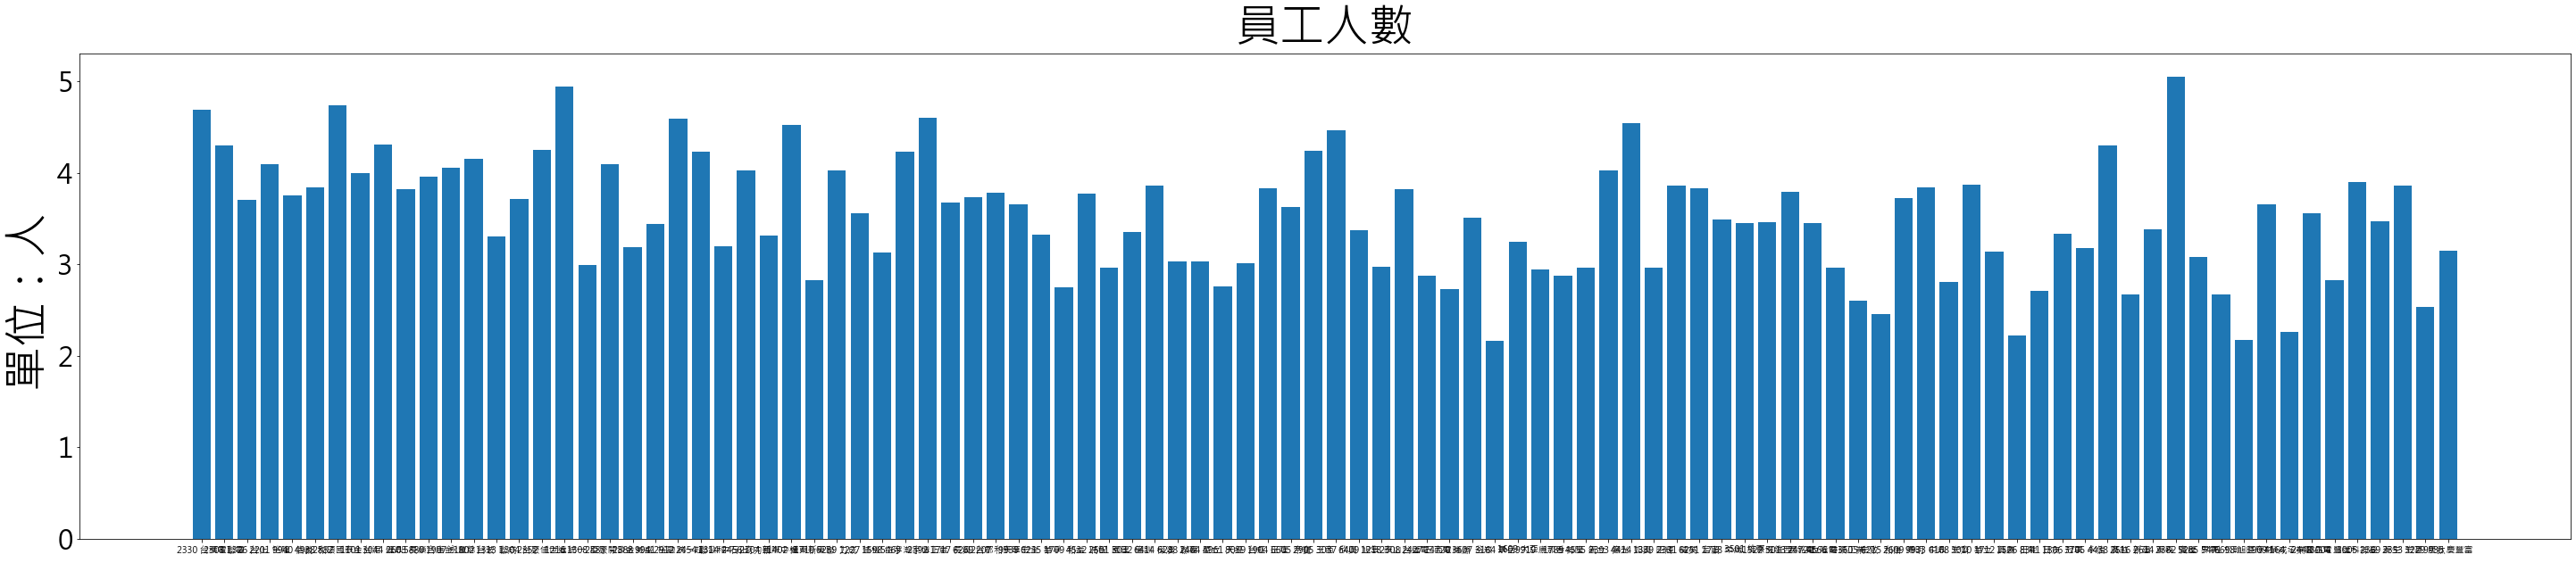

count       100.000000
mean       9271.310000
std       16867.456746
min         147.000000
25%        1015.250000
50%        3410.500000
75%        8301.500000
max      112421.000000
Name: 員工人數, dtype: float64

In [7]:
x = df['公司代碼']
y = np.log10(df['員工人數'])
plt.figure(figsize = (50,10))
plt.bar(x,y)
plt.ylabel('單位：人 ', fontsize = 50)
plt.title('員工人數', fontsize = 50)
plt.yticks(fontsize = 30)
plt.show()
df['員工人數'].describe()

# 實收資本額(元）

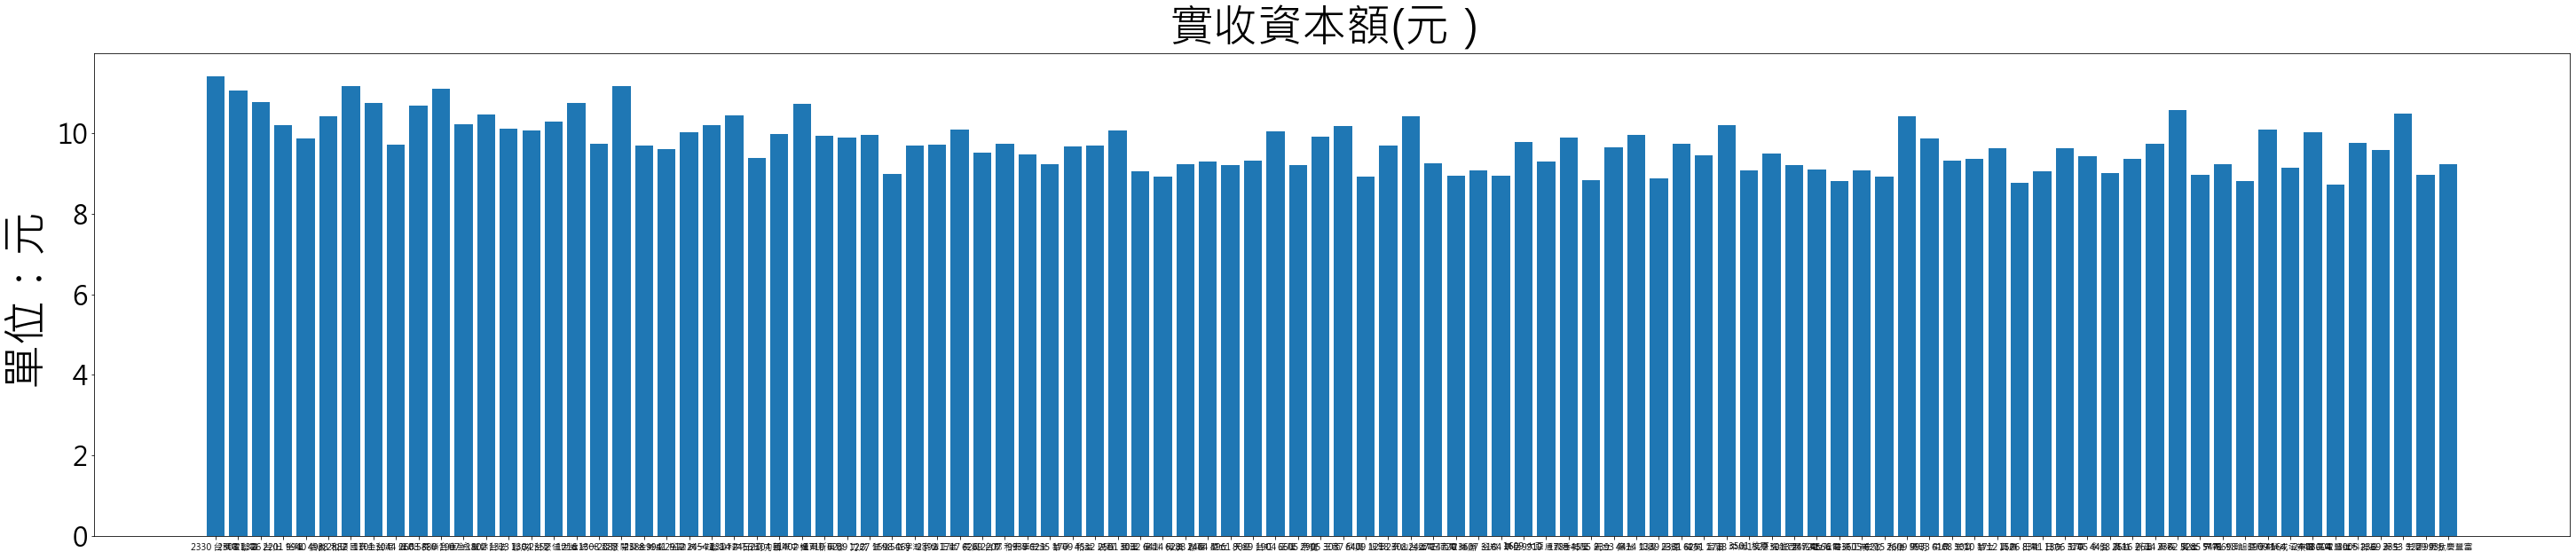

count    1.000000e+02
mean     1.703870e+10
std      3.731944e+10
min      5.264716e+08
25%      1.673619e+09
50%      4.966512e+09
75%      1.223334e+10
max      2.593038e+11
Name: 實收資本額(元), dtype: float64

In [8]:
x = df['公司代碼']
y = np.log10(df['實收資本額(元)'])
plt.figure(figsize = (50,10))
plt.bar(x,y)
plt.ylabel('單位：元 ', fontsize = 50)
plt.title('實收資本額(元）', fontsize = 50)
plt.yticks(fontsize = 30)
plt.show()
df['實收資本額(元)'].describe()

# 產業類型

TSE舊產業名 18
TSE新產業_名稱 25
TEJ產業名 42
TEJ子產業名 63


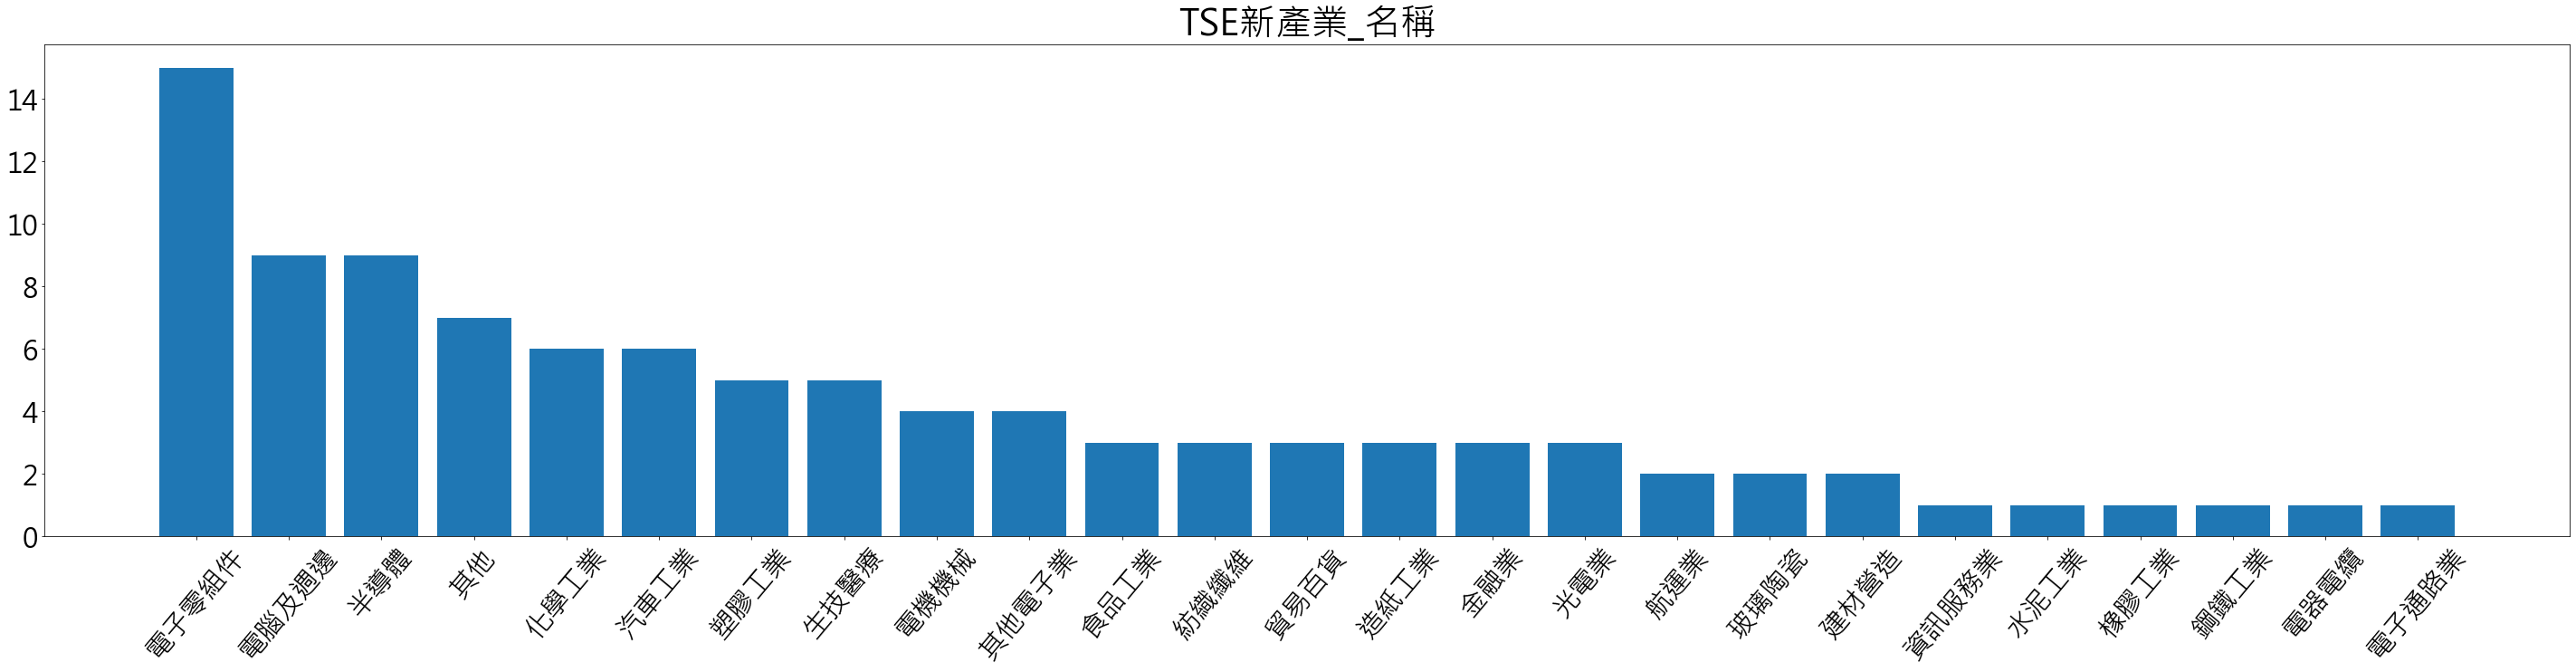

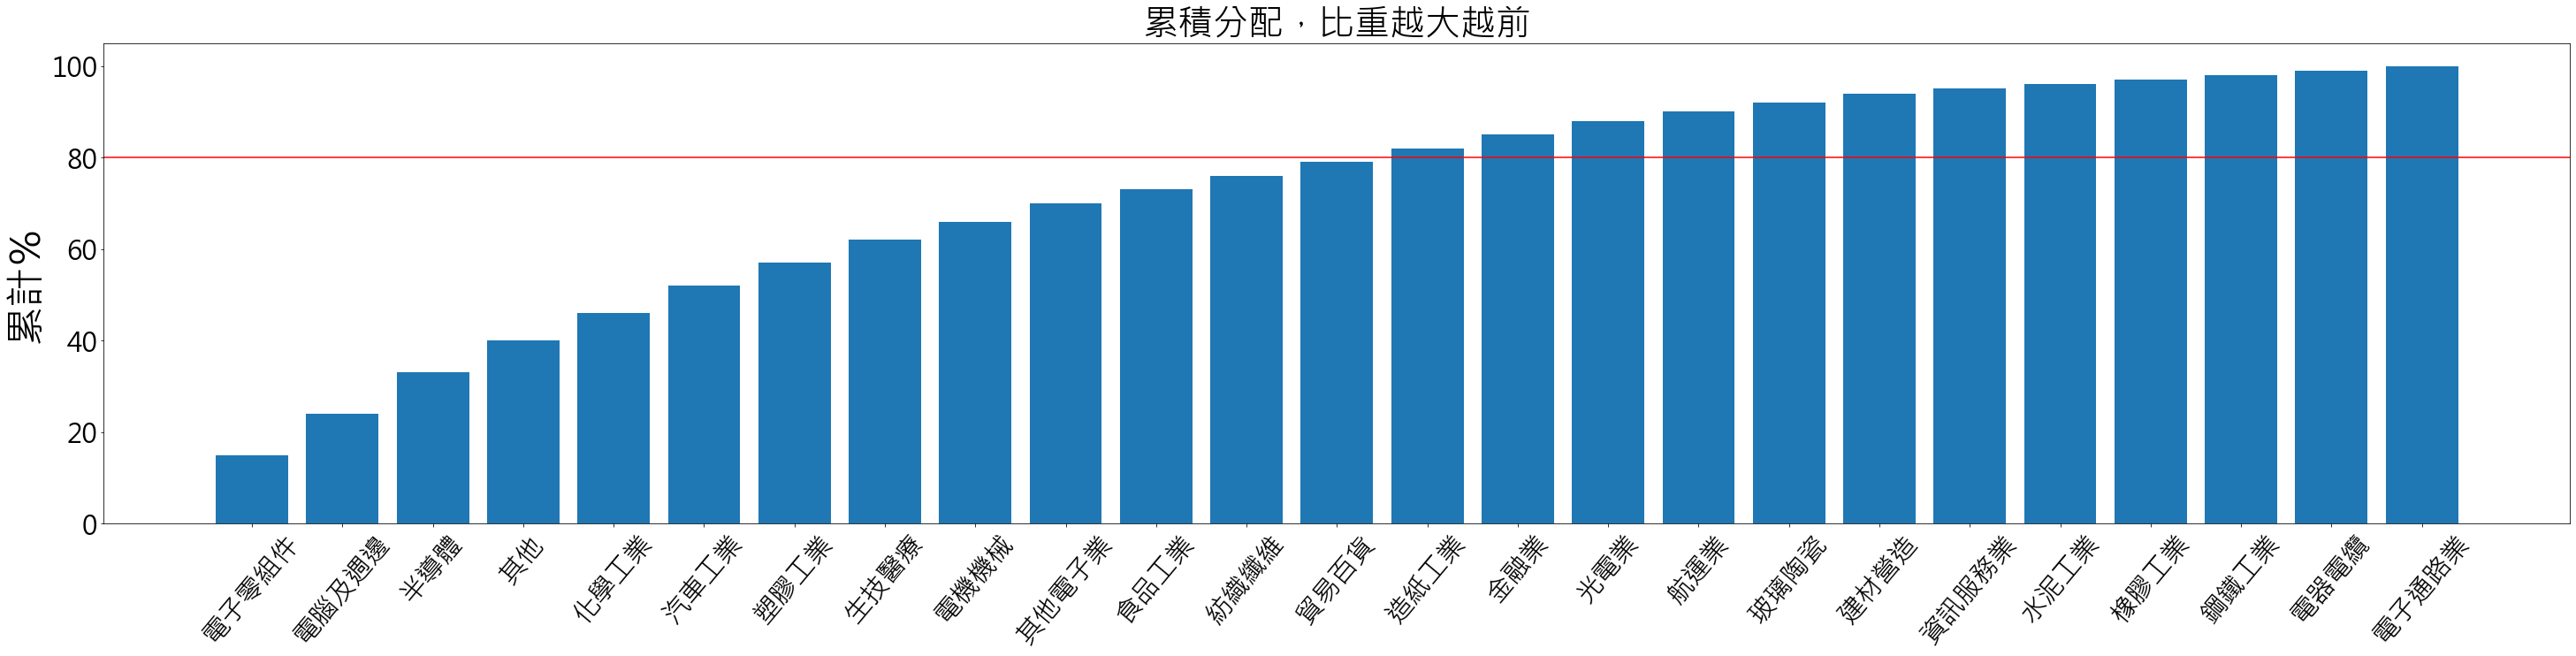

In [9]:
print( 'TSE舊產業名', len(df.groupby('TSE舊產業名').size()))
print( 'TSE新產業_名稱', len(df.groupby('TSE新產業_名稱').size()))
print( 'TEJ產業名', len(df.groupby('TEJ產業名').size()))
print( 'TEJ子產業名', len(df.groupby('TEJ子產業名').size()))
Group = df.groupby('TSE新產業_名稱')
indus = Group.size().sort_values(ascending = False)
x = indus.index
y = indus.values
plt.figure(figsize = (50,10))
plt.bar(x,y)
plt.title('TSE新產業_名稱', fontsize = 40)
plt.yticks(fontsize = 30)
plt.xticks(rotation = 50,fontsize = 30)
plt.show()
#-------------------------------- 累積分配圖-------------------------------------------------------------------
x = indus.index
y = indus.values
T = [ sum(y[0: x+1]) for x in range(0, len(y))]
plt.figure(figsize = (50,10))
plt.bar(x,T)
plt.ylabel('累計％', fontsize = 45)
plt.yticks(fontsize = 30)
plt.title('累積分配，比重越大越前', fontsize = 40)
plt.xticks(rotation = 50,fontsize = 30)
plt.axhline(80, color= 'r')
plt.show()


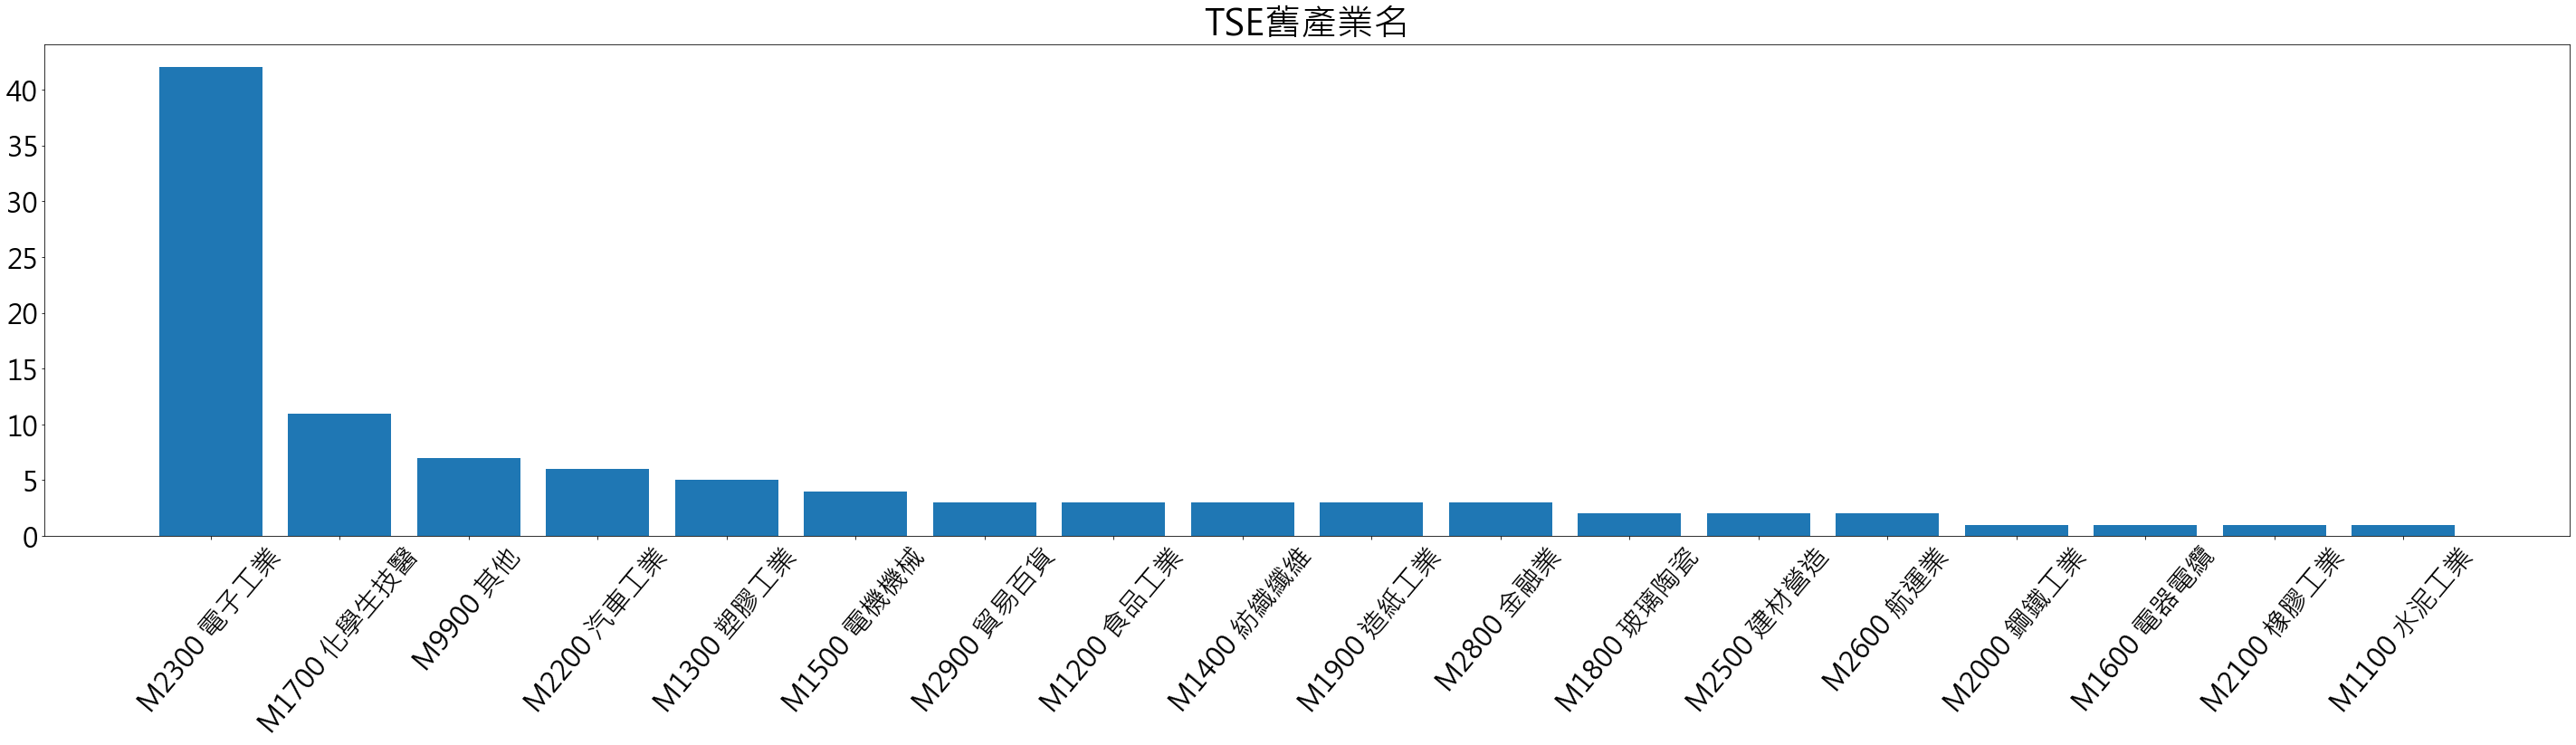

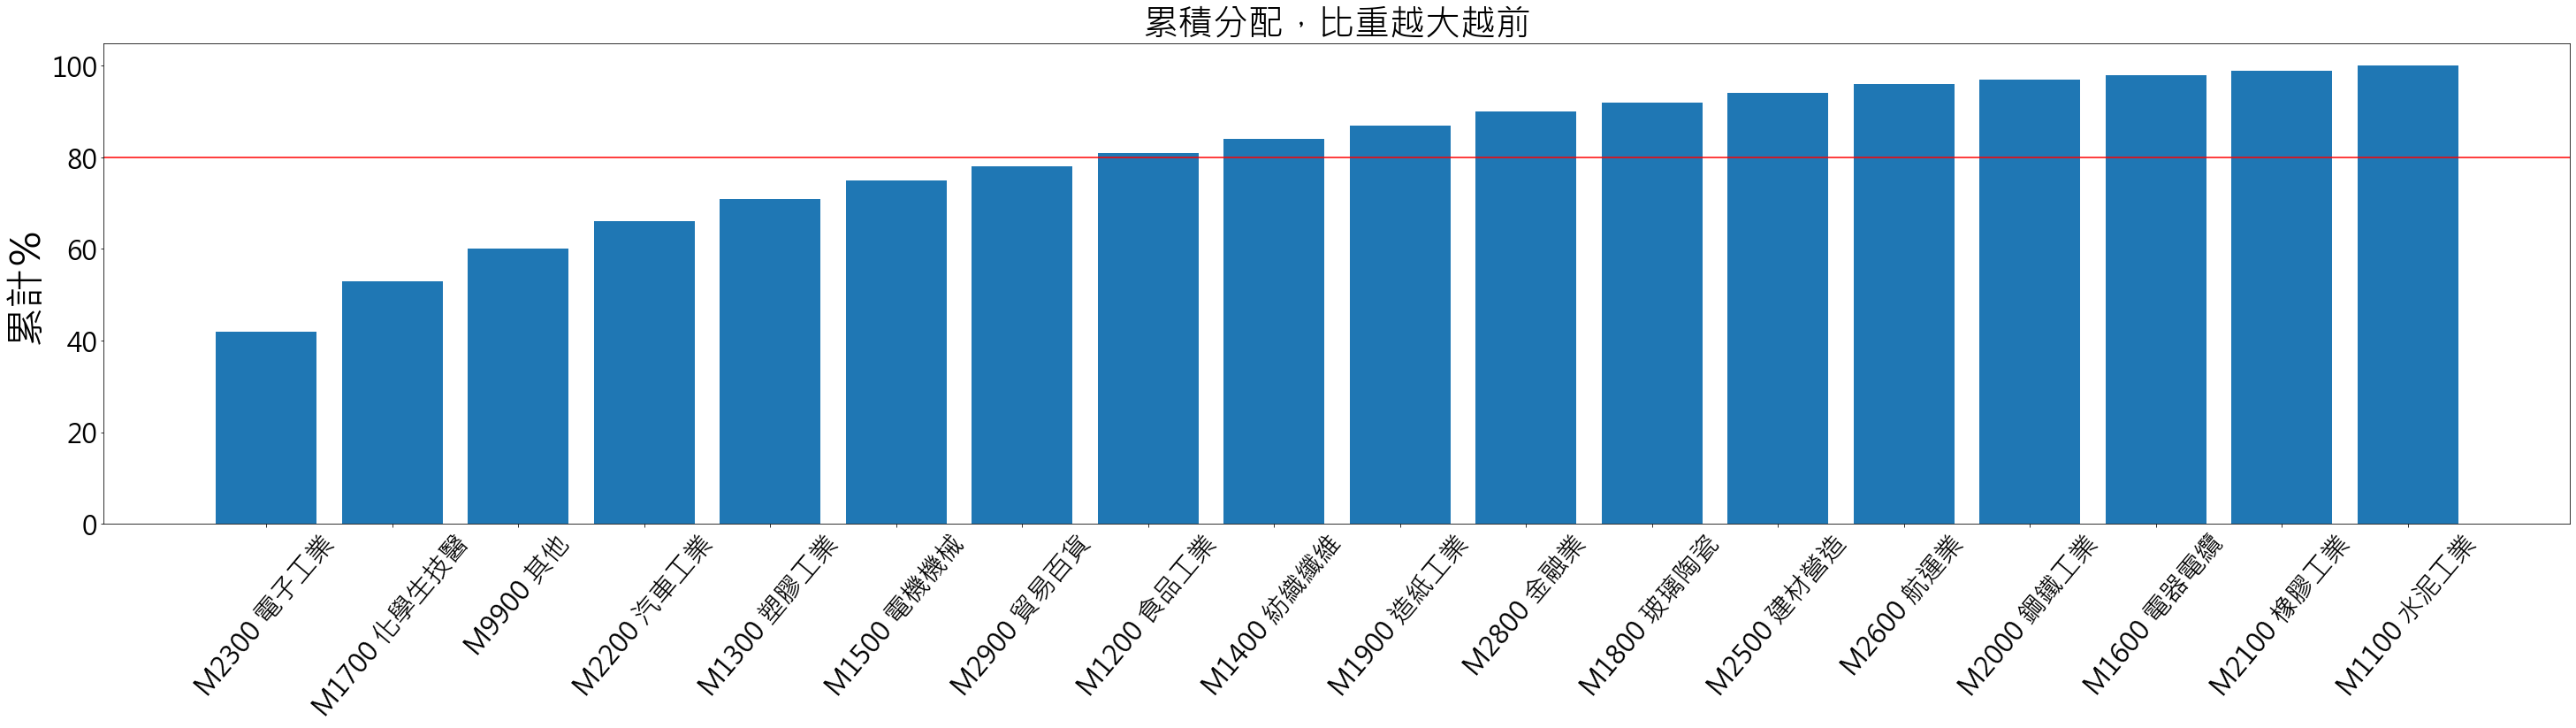

In [10]:
Group = df.groupby('TSE舊產業名')
indus = Group.size().sort_values(ascending = False)
x = indus.index
y = indus.values
plt.figure(figsize = (50,10))
plt.bar(x,y)
plt.title('TSE舊產業名', fontsize = 40)
plt.yticks(fontsize = 30)
plt.xticks(rotation = 50,fontsize = 30)
plt.show()
#-------------------------------- 累積分配圖-------------------------------------------------------------------
x = indus.index
y = indus.values
T = [ sum(y[0: x+1]) for x in range(0, len(y))]
plt.figure(figsize = (50,10))
plt.bar(x,T)
plt.ylabel('累計％', fontsize = 45)
plt.yticks(fontsize = 30)
plt.title('累積分配，比重越大越前', fontsize = 40)
plt.xticks(rotation = 50,fontsize = 30)
plt.axhline(80, color= 'r')
plt.show()

In [11]:
len(df.groupby('TSE新產業_名稱').size())


25

# 成長率指摽

In [12]:
df1 = pd.read_excel('大陸投資100強data.xlsx', sheetname = 8)
pd.set_option('display.max_columns', None)
df1.head(10)

公司代碼         年月 轉投資名稱   營收成長率  營業毛利成長率  已實現銷貨毛利成長率  營業利益成長率  稅前淨利成長率  \
0  2330 台積電 2017-12-29   _合計    3.11     4.21        4.21     2.01     2.64   
1   2303 聯電 2017-12-29   _合計    0.96   -10.93      -10.93     6.05    60.90   
2   1326 台化 2017-12-29   _合計   12.29    11.87       11.87    16.38    22.00   
3   2201 裕隆 2017-12-29   _合計  -16.10     4.19        4.17   -14.70    35.07   
4   9940 信義 2017-12-29   _合計  134.64   241.74      241.74   729.19   325.34   
5   4938 和碩 2017-12-29   _合計    3.12   -26.00      -26.00   -41.39   -29.80   
6  2882 國泰金 2017-12-29   _合計   16.37      NaN         NaN      NaN    18.83   
7   1101 台泥 2017-12-29   _合計    9.77     5.18        5.18     7.13    20.05   
8   3044 健鼎 2017-12-29   _合計    5.30     6.87        6.87    30.06    23.81   
9   2603 長榮 2017-12-29   _合計   20.98   412.17      411.22   161.38   184.54   

   稅後淨利成長率  經常淨利成長率  常續淨利成長率  總資產成長率  淨值成長率  折舊性FA成長率  總資產報酬成長率  營收變動率  \
0     2.63     2.63     1.93    5.59   9.55      6.49      2.07    NaN   
1    71.66    71.66    76.13    1.93  -2.15     -8.60      1.19    NaN   
2    23.11    23.11    15.05    5.12  10.24     -4.52      1.74    NaN   
3    73.02    73.02    50.02   16.79   0.07      7.50      0.54    NaN   
4   205.77   205.77   399.31   12.93  21.75    -10.09      7.95    NaN   
5   -27.66   -27.66   -30.68    9.98  -1.26     17.87     -1.34    NaN   
6    17.97    17.97    17.97    8.68  14.84     -2.05      0.11    NaN   
7    16.75    16.75    13.99    2.09   3.56     -8.72      0.39    NaN   
8    22.18    22.18    -3.00   10.89   3.85     35.03      0.52    NaN   
9   177.77   177.77   170.97    5.44  24.33     -1.79      7.91    NaN   

   營業利益變動率  淨利變動率（單季）  稅前盈餘變動率  本期匯出金額(NTD)  
0      NaN        NaN      NaN     21724892  
1      NaN        NaN      NaN     13244953  
2      NaN        NaN      NaN      6155311  
3      NaN        NaN      NaN      4874572  
4      NaN        NaN      NaN      3900696  
5      NaN        NaN      NaN      3749760  
6      NaN        NaN      NaN      3457594  
7      NaN        NaN      NaN      3422400  
8      NaN        NaN      NaN      3013300  
9      NaN        NaN      NaN      2687071

# 拿掉所有缺失值的coulmn

In [13]:
df1.columns

Index(['公司代碼', '年月', '轉投資名稱', '營收成長率', '營業毛利成長率', '已實現銷貨毛利成長率', '營業利益成長率',
       '稅前淨利成長率', '稅後淨利成長率', '經常淨利成長率', '常續淨利成長率', '總資產成長率', '淨值成長率',
       '折舊性FA成長率', '總資產報酬成長率', '營收變動率', '營業利益變動率', '淨利變動率（單季）', '稅前盈餘變動率',
       '本期匯出金額(NTD)'],
      dtype='object')

In [14]:
df1_dp = df1.dropna(axis = 1)
df1_dp

公司代碼         年月 轉投資名稱   營收成長率  稅前淨利成長率  稅後淨利成長率  經常淨利成長率  常續淨利成長率  \
0    2330 台積電 2017-12-29   _合計    3.11     2.64     2.63     2.63     1.93   
1     2303 聯電 2017-12-29   _合計    0.96    60.90    71.66    71.66    76.13   
2     1326 台化 2017-12-29   _合計   12.29    22.00    23.11    23.11    15.05   
3     2201 裕隆 2017-12-29   _合計  -16.10    35.07    73.02    73.02    50.02   
4     9940 信義 2017-12-29   _合計  134.64   325.34   205.77   205.77   399.31   
5     4938 和碩 2017-12-29   _合計    3.12   -29.80   -27.66   -27.66   -30.68   
6    2882 國泰金 2017-12-29   _合計   16.37    18.83    17.97    17.97    17.97   
7     1101 台泥 2017-12-29   _合計    9.77    20.05    16.75    16.75    13.99   
8     3044 健鼎 2017-12-29   _合計    5.30    23.81    22.18    22.18    -3.00   
9     2603 長榮 2017-12-29   _合計   20.98   184.54   177.77   177.77   170.97   
10   5880 合庫金 2017-12-29   _合計    1.16     3.55     4.05     4.05     4.05   
11   1907 永豐餘 2017-12-29   _合計    5.39   194.60   284.09   284.09  1709.49   
12    1802 台玻 2017-12-29   _合計    4.11   236.58   214.31   214.31   213.00   
13    1313 聯成 2017-12-29   _合計   19.36   113.47   115.13   115.13    83.80   
14    1304 台聚 2017-12-29   _合計    9.48    13.58    13.88    15.03    13.18   
15   2352 佳世達 2017-12-29   _合計    5.64    32.52    39.05    39.05    42.17   
16    1216 統一 2017-12-29   _合計   -3.27   150.76   153.28   153.28   -29.34   
17    1308 亞聚 2017-12-29   _合計    8.67   -17.30   -15.74   -15.74   -15.72   
18   2883 開發金 2017-12-29   _合計   81.18   104.19   106.54   106.54   106.54   
19    2388 威盛 2017-12-29   _合計   -8.40   -85.97   -79.81   -79.81  -295.23   
20    9941 裕融 2017-12-29   _合計   10.86    39.55    37.64    37.64    37.48   
21   2912 統一超 2017-12-29   _合計    2.68   209.70   190.15   190.15   -48.33   
22   2454 聯發科 2017-12-29   _合計  -13.54     0.09     0.16     0.16   -63.91   
23   1314 中石化 2017-12-29   _合計   31.36   449.08   424.11   424.11   396.72   
24   2456 奇力新 2017-12-29   _合計   11.26     0.43     1.63     1.63   -10.43   
25  2104 國際中橡 2017-12-29   _合計   26.59    35.17    62.72    62.72    45.37   
26   1402 遠東新 2017-12-29   _合計    0.92     5.84    11.80    11.80    41.99   
27    1710 東聯 2017-12-29   _合計   48.07   518.69   471.10   471.10   442.91   
28    6239 力成 2017-12-29   _合計   23.35    22.36    21.34    21.34    12.13   
29    1227 佳格 2017-12-29   _合計   -2.20   -16.29   -16.22   -16.22   -13.29   
30    1598 岱宇 2017-12-29   _合計   -5.65  -149.90  -155.04  -155.04  -152.46   
31   5469 瀚宇博 2017-12-29   _合計    0.55     3.04   -13.42   -13.42   -36.83   
32    2392 正崴 2017-12-29   _合計    3.45    -6.52   -47.22   -47.22   191.99   
33    1717 長興 2017-12-29   _合計    7.42   -28.87   -28.47   -28.47   -44.91   
34    6269 台郡 2017-12-29   _合計   35.35    30.98    34.36    34.36    35.54   
35   2207 和泰車 2017-12-29   _合計    3.78    -1.81    -4.10    -4.10    -3.92   
36    9939 宏全 2017-12-29   _合計    6.11     3.28     6.02     6.02    15.04   
37    6235 華孚 2017-12-29   _合計   36.69   214.52   -93.78  1019.29   447.85   
38    1709 和益 2017-12-29   _合計    2.49   -26.06   -26.53   -26.53   -22.59   
39    4532 瑞智 2017-12-29   _合計   12.18   -27.63   -25.37   -25.37   -28.91   
40    2501 國建 2017-12-29   _合計  -34.37   -64.25   -56.25   -56.25   -56.15   
41    3032 偉訓 2017-12-29   _合計   20.71   -31.63   -34.10   -34.10   -39.58   
42    6414 樺漢 2017-12-29   _合計  141.19    31.49    31.12    31.12    22.29   
43    6288 聯嘉 2017-12-29   _合計    6.65   -38.12   -31.72   -31.72   -72.36   
44    2464 盟立 2017-12-29   _合計   39.32   -10.92   -13.98   -13.98    16.08   
45    4961 天鈺 2017-12-29   _合計    3.87   -48.75   -54.05   -54.05   -54.05   
46    8039 台虹 2017-12-29   _合計    8.84    40.34    36.58    36.58    48.90   
47    1904 正隆 2017-12-29   _合計    6.43     7.79    17.20    17.20    65.44   
48    6605 帝寶 2017-12-29   _合計    2.06   -16.82   -15.80   -15.80   -12.19   
49    2905 三商 2017-12-29   _合計   16.15     1.43    -6.08    -6.08   -10.91   
50    3037 欣興 2017-12-29   _合計 

In [15]:
df1_dp.columns

Index(['公司代碼', '年月', '轉投資名稱', '營收成長率', '稅前淨利成長率', '稅後淨利成長率', '經常淨利成長率',
       '常續淨利成長率', '總資產成長率', '淨值成長率', '折舊性FA成長率', '總資產報酬成長率', '本期匯出金額(NTD)'],
      dtype='object')

In [16]:
df1_dp.corr()

營收成長率   稅前淨利成長率   稅後淨利成長率   經常淨利成長率   常續淨利成長率    總資產成長率  \
營收成長率        1.000000  0.103861  0.045055  0.081811  0.083014  0.815581   
稅前淨利成長率      0.103861  1.000000  0.922648  0.979838  0.176723  0.025728   
稅後淨利成長率      0.045055  0.922648  1.000000  0.907772  0.120469  0.055160   
經常淨利成長率      0.081811  0.979838  0.907772  1.000000  0.109568  0.040650   
常續淨利成長率      0.083014  0.176723  0.120469  0.109568  1.000000 -0.043863   
總資產成長率       0.815581  0.025728  0.055160  0.040650 -0.043863  1.000000   
淨值成長率        0.763147  0.031845  0.055668  0.037763 -0.029471  0.971195   
折舊性FA成長率     0.746734 -0.084334 -0.036791 -0.048081 -0.055457  0.926819   
總資產報酬成長率     0.258449  0.648386  0.560146  0.564951  0.238167  0.191529   
本期匯出金額(NTD) -0.048135 -0.017316 -0.009260 -0.030084  0.045818 -0.047009   

                淨值成長率  折舊性FA成長率  總資產報酬成長率  本期匯出金額(NTD)  
營收成長率        0.763147  0.746734  0.258449    -0.048135  
稅前淨利成長率      0.031845 -0.084334  0.648386    -0.017316  
稅後淨利成長率      0.055668 -0.036791  0.560146    -0.009260  
經常淨利成長率      0.037763 -0.048081  0.564951    -0.030084  
常續淨利成長率     -0.029471 -0.055457  0.238167     0.045818  
總資產成長率       0.971195  0.926819  0.191529    -0.047009  
淨值成長率        1.000000  0.896091  0.234996    -0.036980  
折舊性FA成長率     0.896091  1.000000  0.045497    -0.058736  
總資產報酬成長率     0.234996  0.045497  1.000000    -0.002171  
本期匯出金額(NTD) -0.036980 -0.058736 -0.002171     1.000000

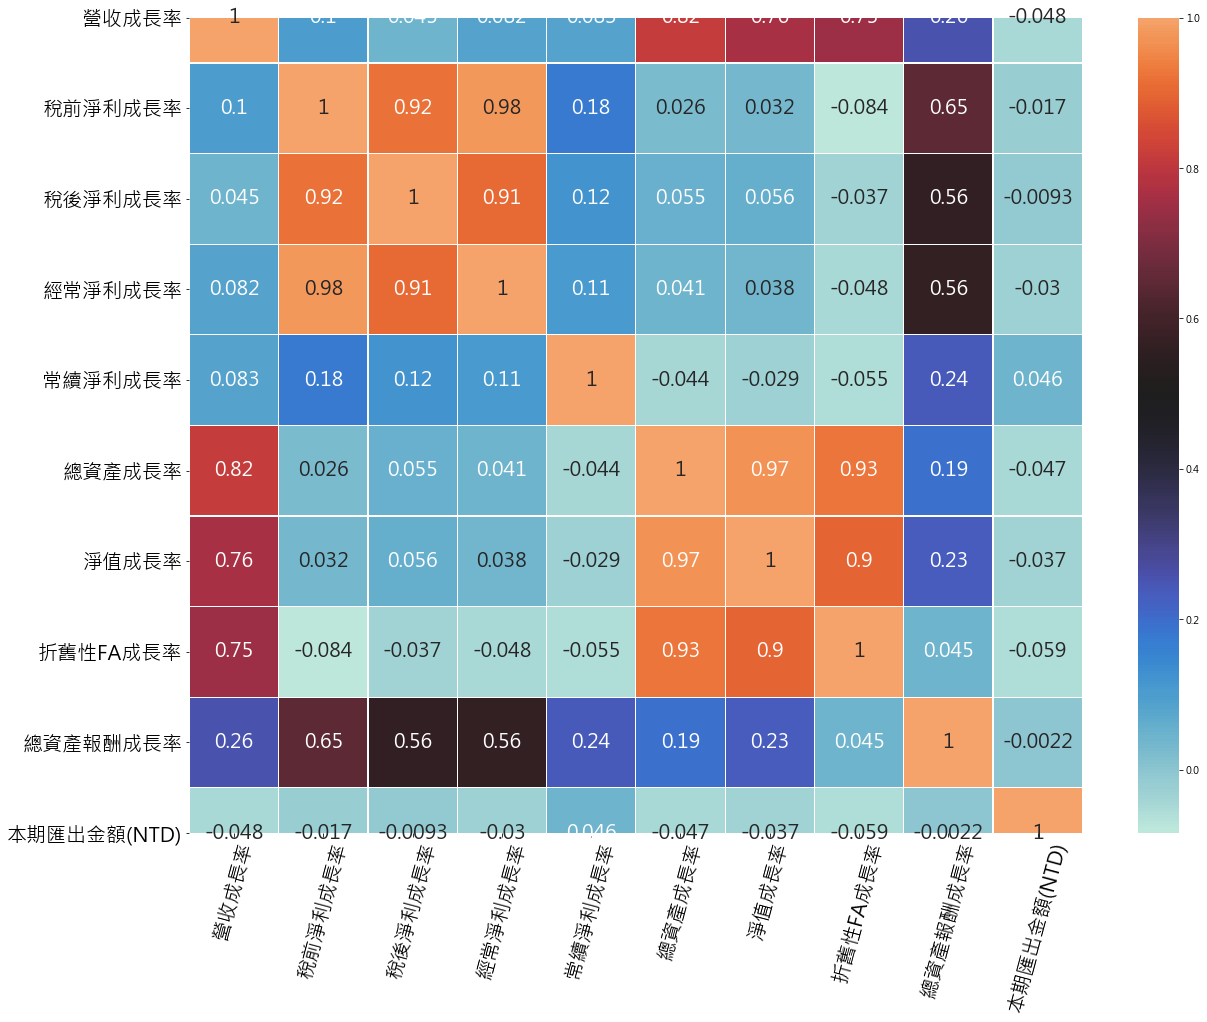

In [17]:
plt.figure(figsize= (20,15) )
sns.heatmap(df1_dp.corr(), annot=True, linewidths = 0.1, annot_kws = {'size': 20} ,center = 0.5)
plt.xticks(fontsize = 20, rotation = 75)
plt.yticks(fontsize = 20, rotation = 0)
plt.show()

In [ ]:
# 全部表，丟heatmap
# 

In [111]:
def heatmap(names):
    total_num = len(names)
    for Sh_num, name in zip(range(0, total_num), names):
        df1 = pd.read_excel('大陸投資100強data.xlsx', sheetname = name)
        df1_dp = df1.dropna(axis = 1)
        df1_dp.corr()
        normal = True if len(df1_dp.corr().columns ) < 20 else False
        plt.figure(figsize= (20,15) )
        sns.heatmap(df1_dp.corr(), annot=True, linewidths = 0.1, annot_kws = {'size': 20 if normal else 10},\
                    mask = (abs(df1_dp.corr()) < 0.1) ,center = 0.6)
        plt.xticks(fontsize = 20 if normal else 10, rotation = 75)
        plt.yticks(fontsize = 20 if normal else 10, rotation = 0)
        plt.title(name, fontsize = 60)
        plt.savefig(name + '.png', dpi = 500, bbox_inches = 'tight')
        plt.show()
       

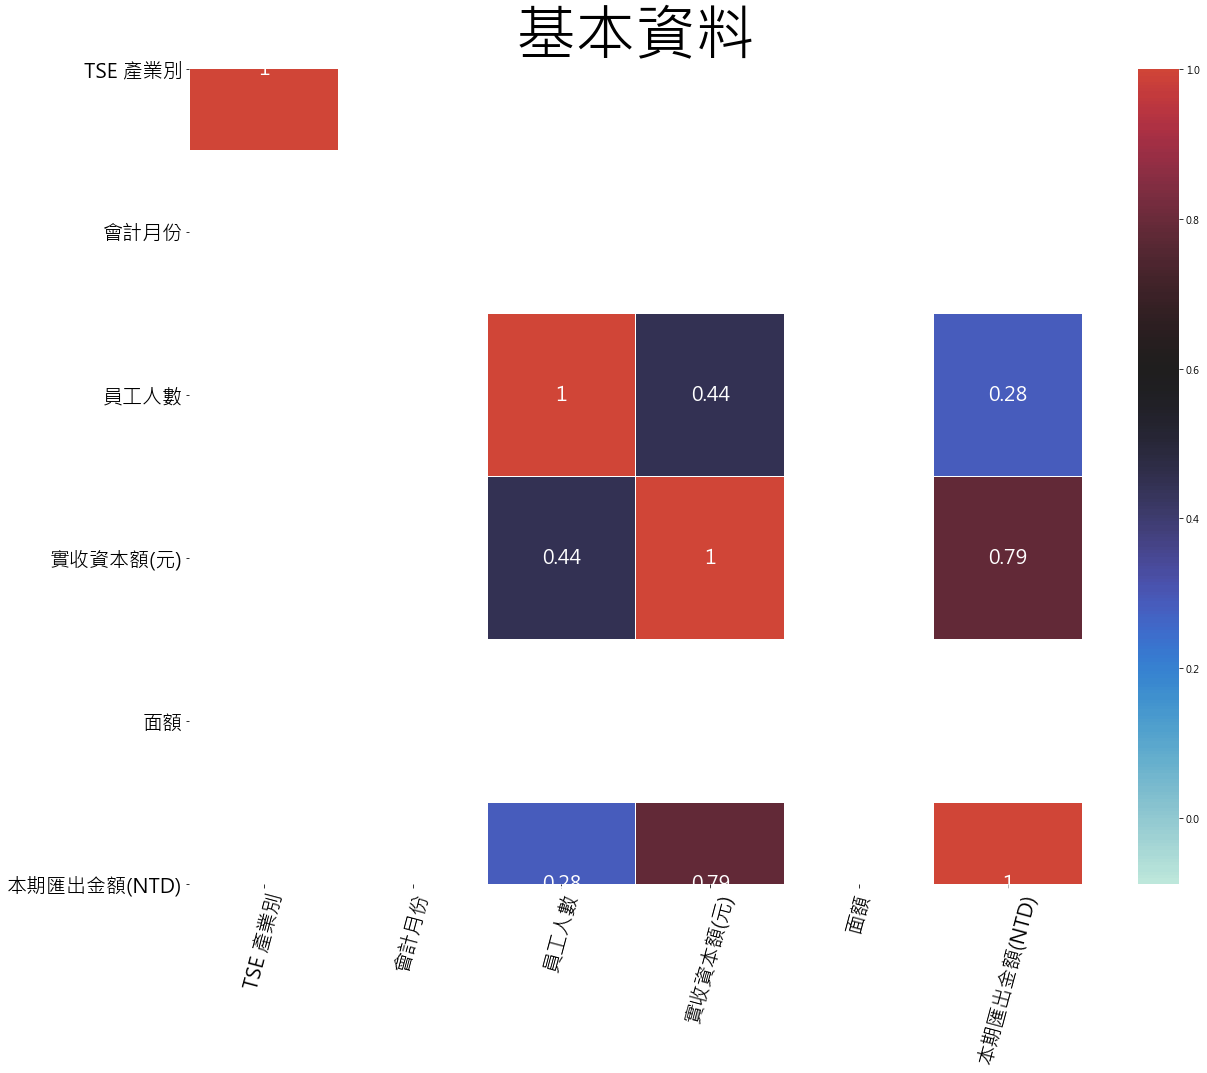

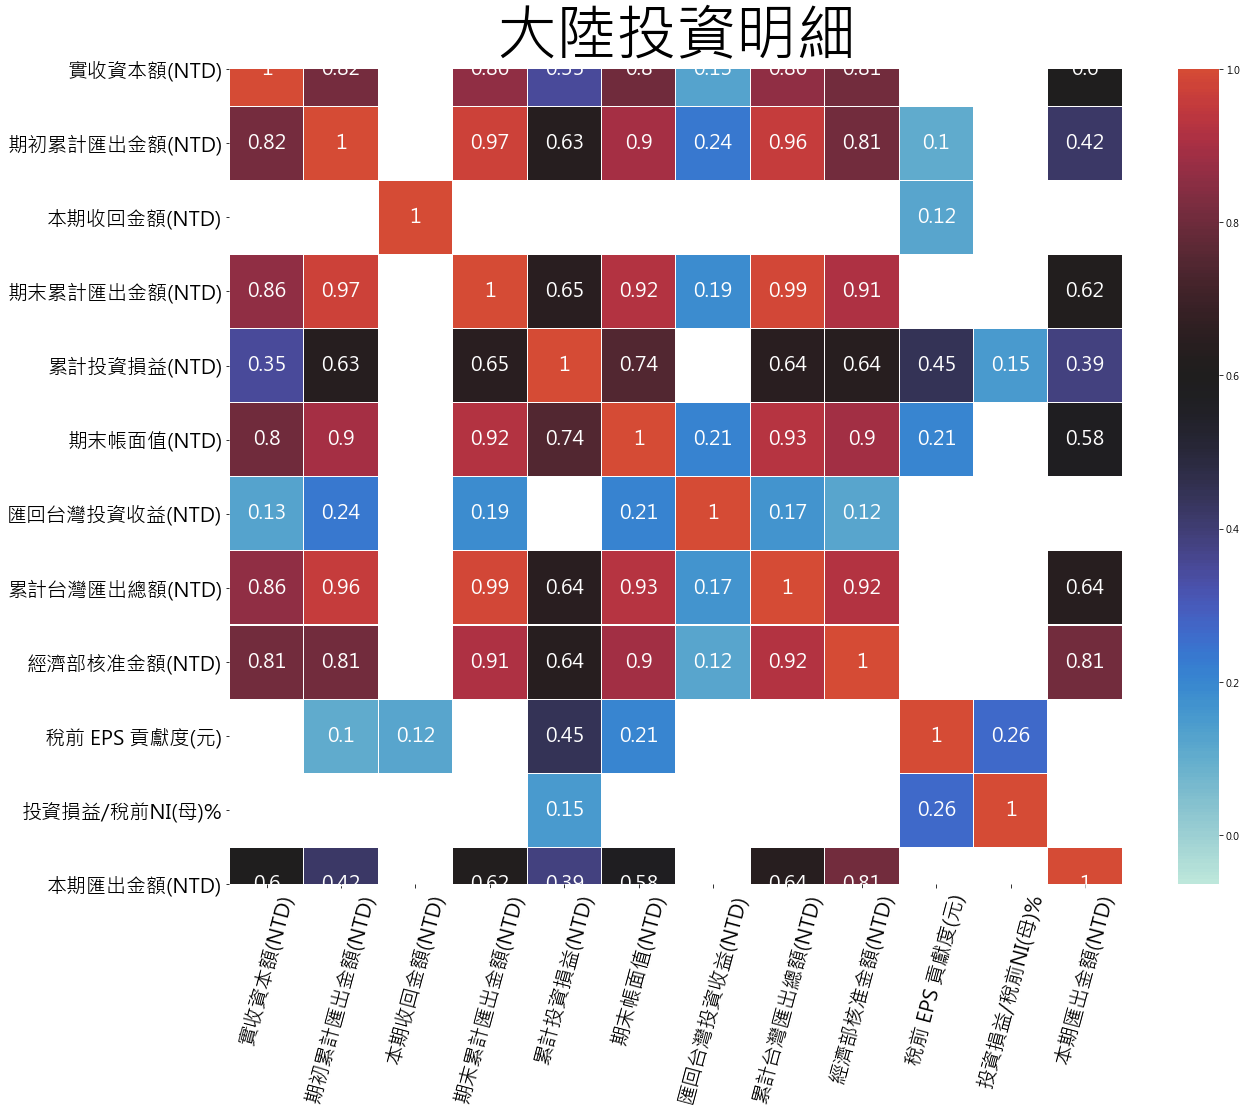

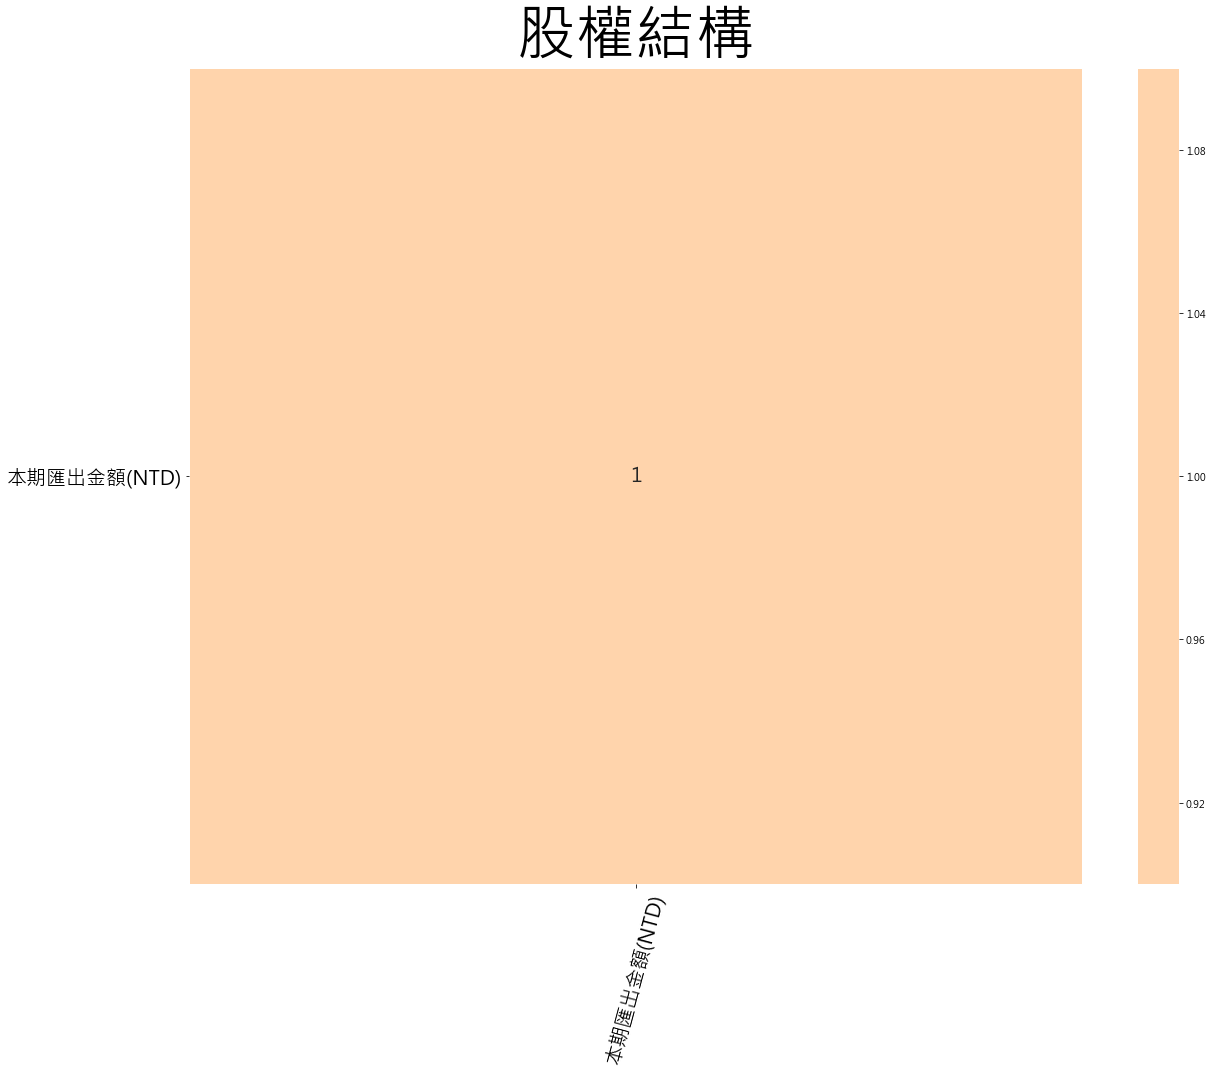

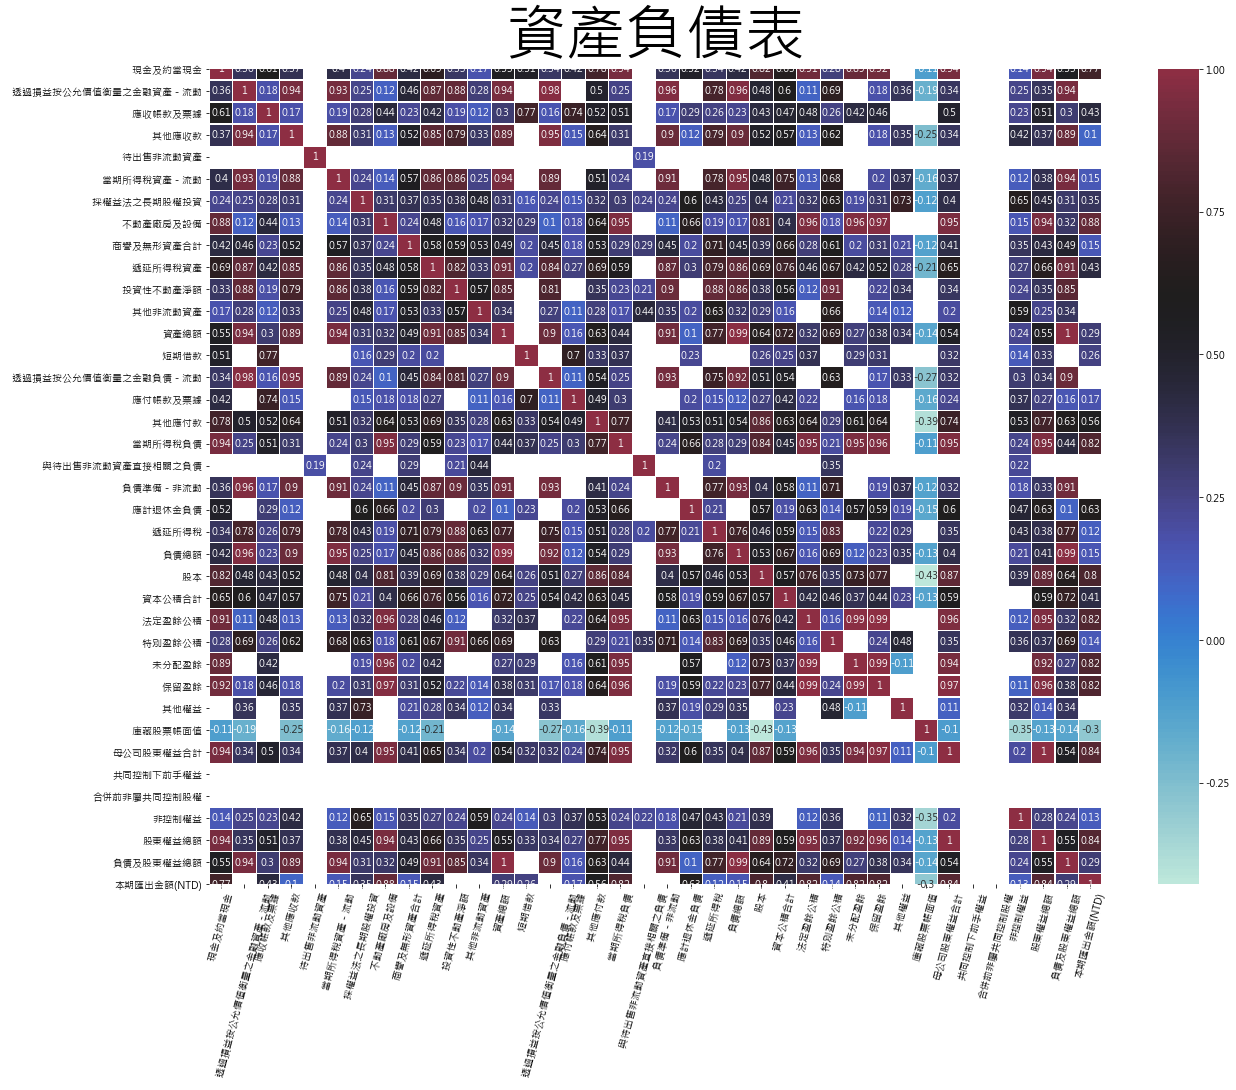

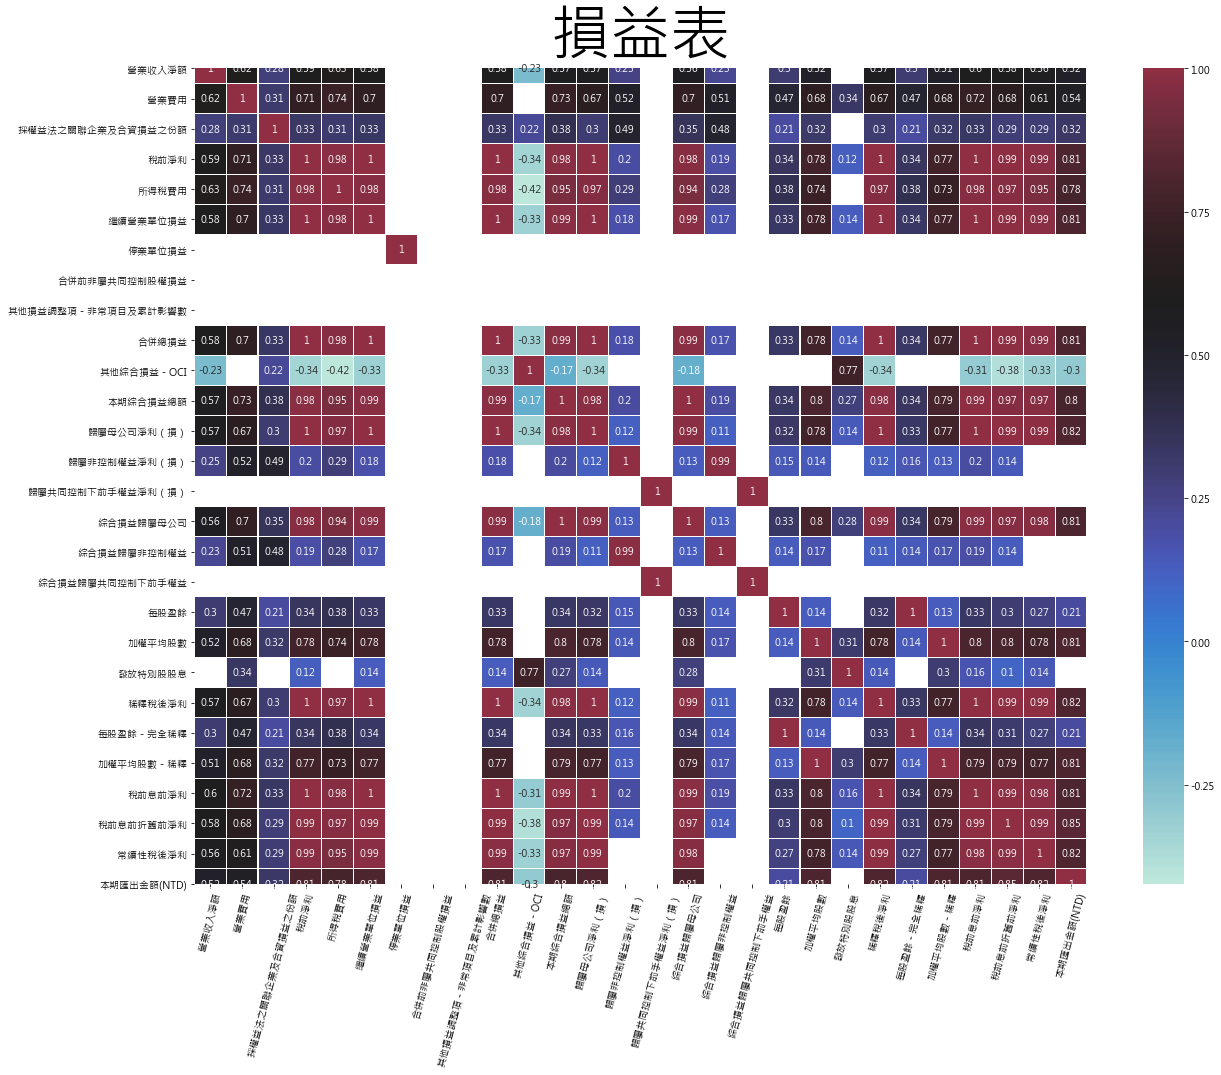

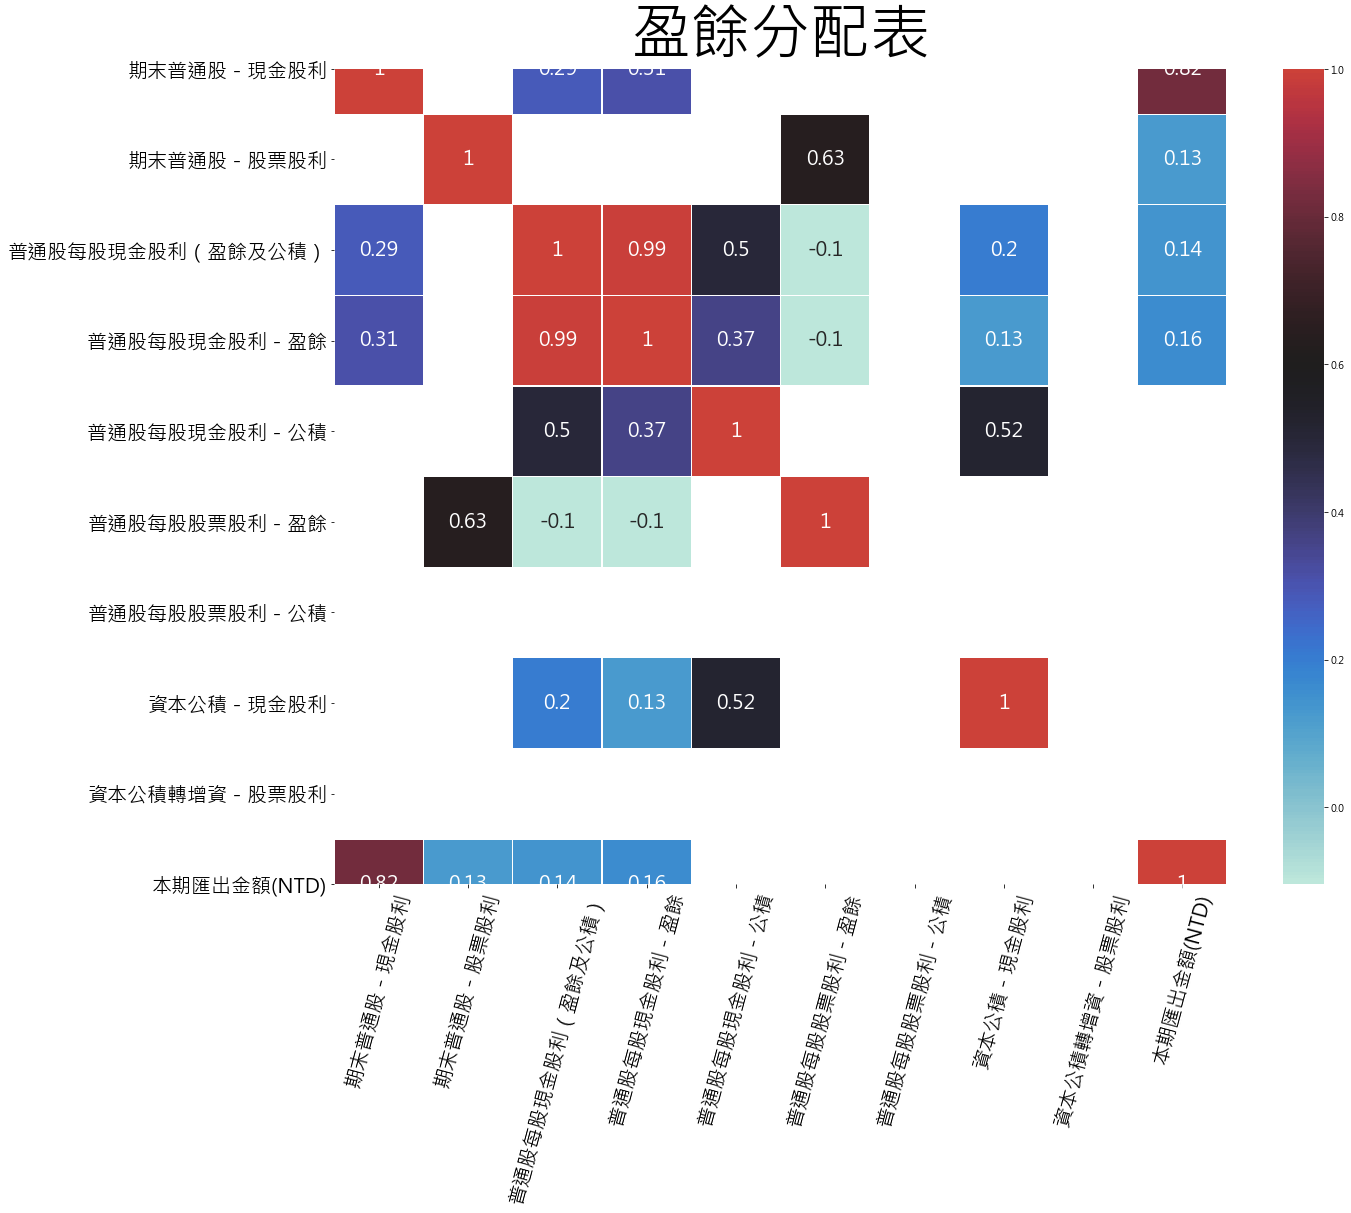

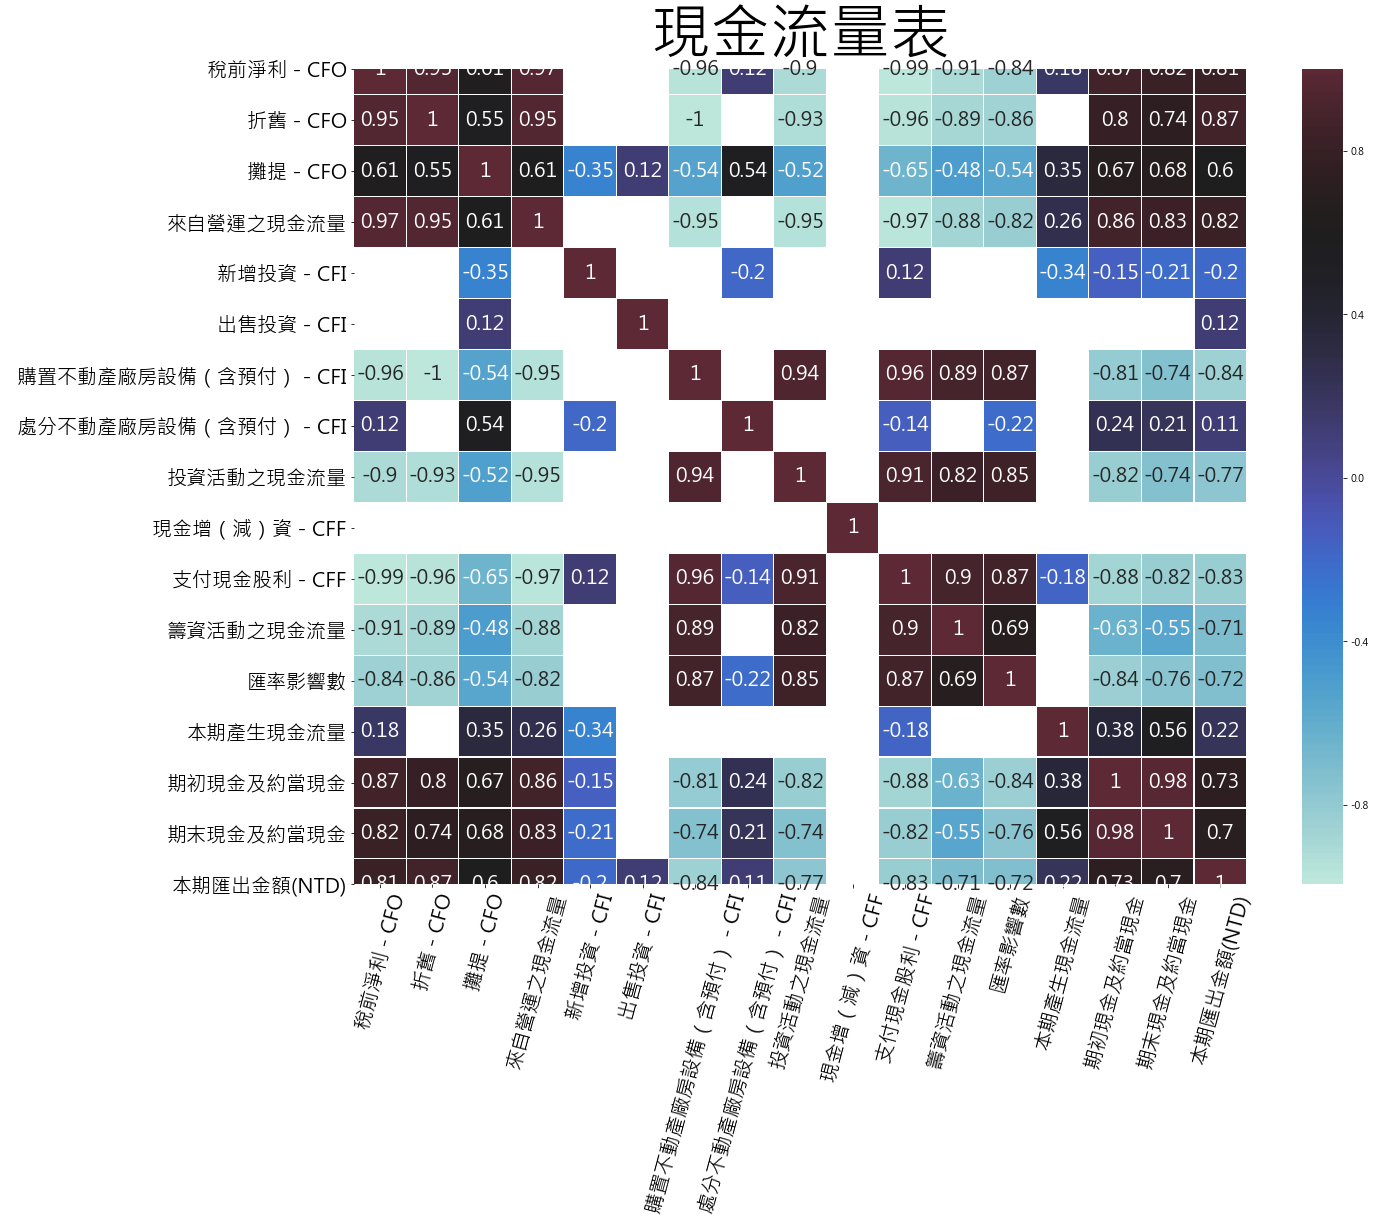

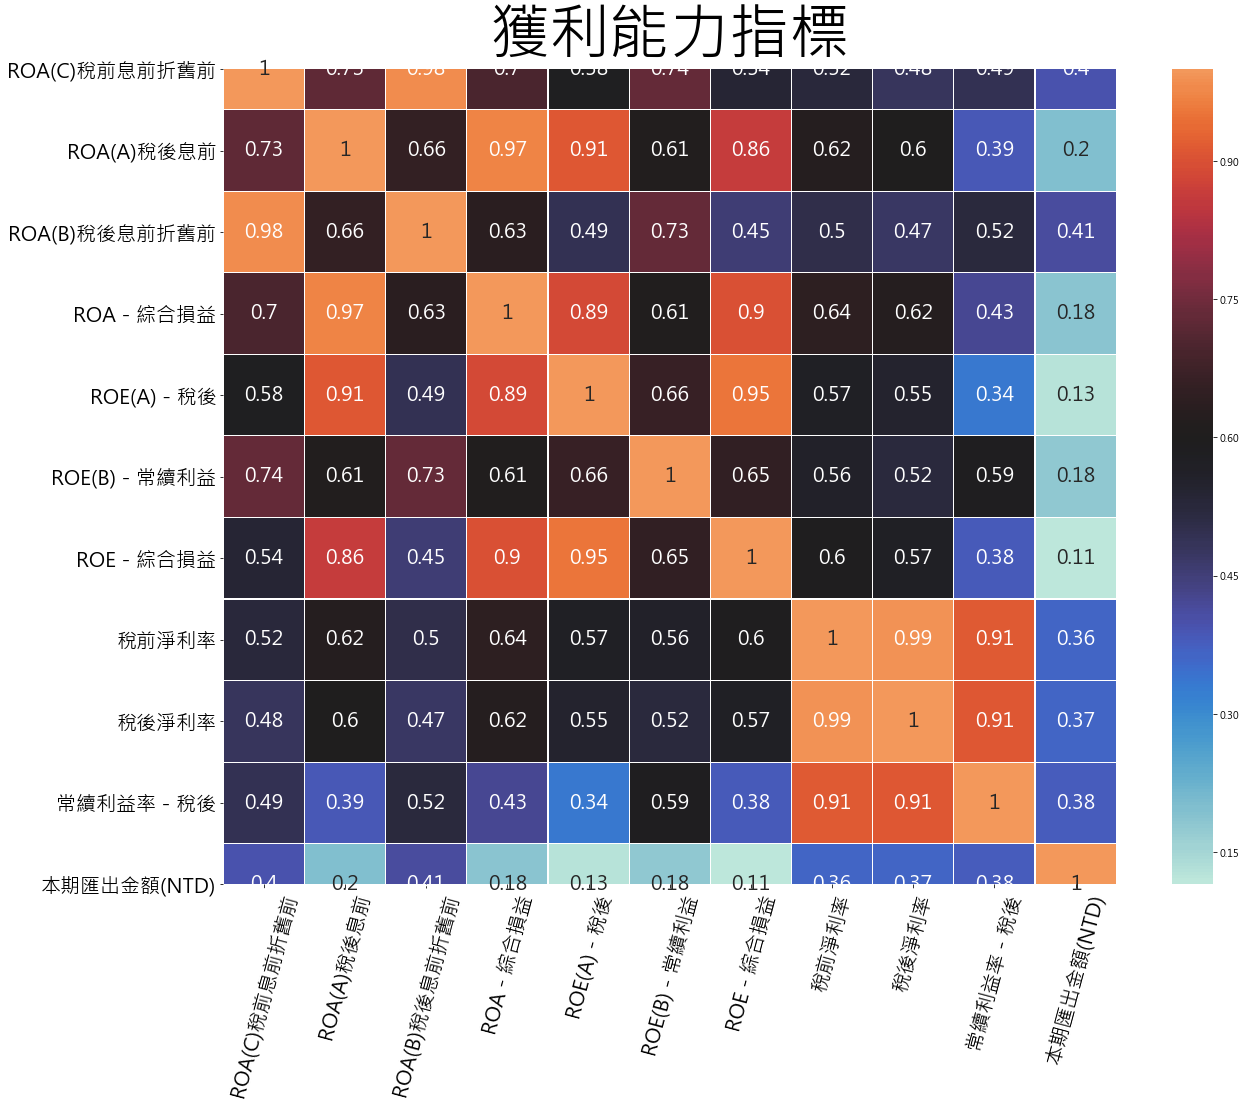

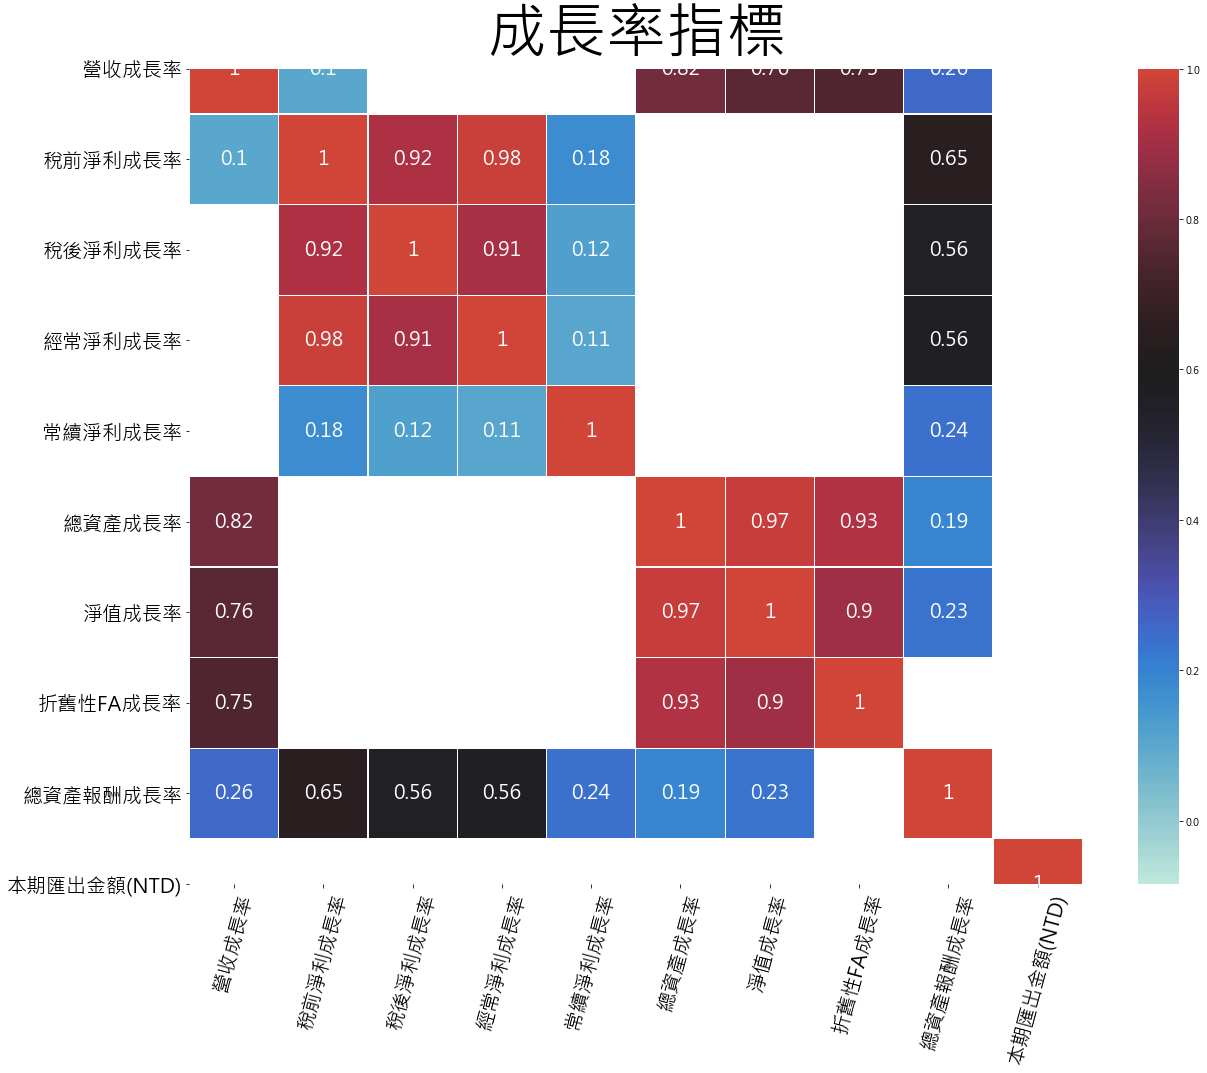

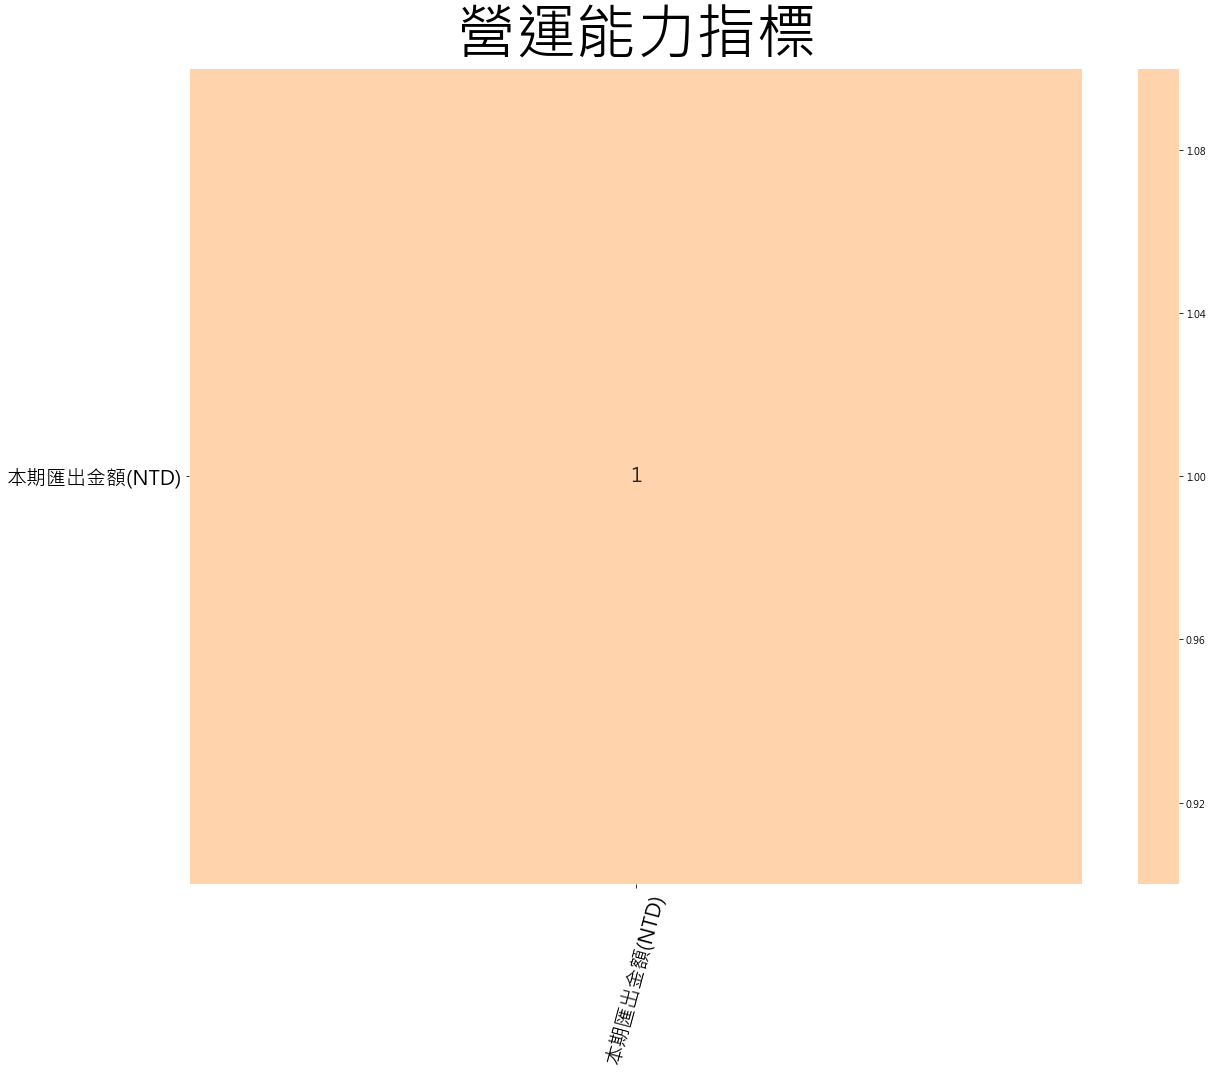

In [112]:
xl = pd.ExcelFile('大陸投資100強data.xlsx')
xl.sheet_names
heatmap(xl.sheet_names)

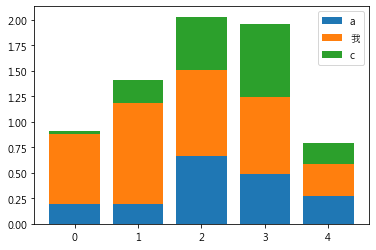

[0.19487944 0.19113934 0.66914448 0.48653063 0.27662327]
[0.68651112 0.99707742 0.83855616 0.75414643 0.31139915]
[0.02680728 0.22144114 0.52260531 0.71760732 0.20686402]


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
size = 5 
x = np.arange(size) 
a = np.random.random(size) 
b = np.random.random(size) 
c = np.random.random(size) 
plt.bar(x, a, label='a') 
plt.bar(x, b, bottom=a, label='我') 
plt.bar(x, c, bottom=a + b, label='c') 
plt.legend() 
plt.show()
print(a)
print(b)
print(c)

# 投資金額變化圖（2017 100強）

In [4]:
df2 = pd.read_excel('大陸投資2012-2018.xlsx', sheetname = 8)
pd.set_option('display.max_columns', None)
df2.head(10)

公司代碼         年月 轉投資名稱  2017本期匯出金額(NTD)       2012       2013  \
0  2330 台積電 2017-12-29   _合計         21724892        0.0        0.0   
1   2303 聯電 2017-12-29   _合計         13244953   592943.0  4679315.0   
2   1326 台化 2017-12-29   _合計          6155311   874680.0    29610.0   
3   2201 裕隆 2017-12-29   _合計          4874572  2760978.0        0.0   
4   9940 信義 2017-12-29   _合計          3900696   457462.0  3868747.0   
5   4938 和碩 2017-12-29   _合計          3749760   580800.0   566295.0   
6  2882 國泰金 2017-12-29   _合計          3457594  3773774.0  1294980.0   
7   1101 台泥 2017-12-29   _合計          3422400  4409597.0   597577.0   
8   3044 健鼎 2017-12-29   _合計          3013300  1392606.0   107339.0   
9   2603 長榮 2017-12-29   _合計          2687071        0.0        0.0   

         2014       2015       2016        2018  
0         0.0        0.0  6435200.0   2361320.0  
1     25414.0  1035969.0     4830.0  17227277.0  
2    456525.0        0.0  2367940.0   6589991.0  
3     44310.0  1437410.0  1556621.0   8591001.0  
4    454477.0    87082.0        0.0         0.0  
5   2516786.0  1608425.0  2031750.0         0.0  
6  13260760.0        0.0  1886505.0   2200394.0  
7   1269063.0  6947298.0  6259725.0    523224.0  
8   1690416.0        0.0        0.0         0.0  
9         0.0        0.0   198030.0   1128313.0

In [5]:
print(df2.columns)
df2_pro = df2.drop(columns = ['年月', '轉投資名稱'])
df2_pro.rename(columns = {'2017本期匯出金額(NTD)': 2017}, inplace = True)
df2_pro = df2_pro.iloc[0:100, :]
df2_pro = pd.merge(df2_pro, df.loc[:, ['公司代碼','TSE新產業名']], on = '公司代碼')
col_ord =['公司代碼'] + [(x) for x in range(2012, 2019)] +['TSE新產業名']
df2_pro = df2_pro[col_ord]
df2_pro


Index(['公司代碼', '年月', '轉投資名稱', '2017本期匯出金額(NTD)', 2012, 2013, 2014, 2015, 2016,
       2018],
      dtype='object')


公司代碼       2012       2013        2014       2015       2016  \
0    2330 台積電        0.0        0.0         0.0        0.0  6435200.0   
1     2303 聯電   592943.0  4679315.0     25414.0  1035969.0     4830.0   
2     1326 台化   874680.0    29610.0    456525.0        0.0  2367940.0   
3     2201 裕隆  2760978.0        0.0     44310.0  1437410.0  1556621.0   
4     9940 信義   457462.0  3868747.0    454477.0    87082.0        0.0   
5     4938 和碩   580800.0   566295.0   2516786.0  1608425.0  2031750.0   
6    2882 國泰金  3773774.0  1294980.0  13260760.0        0.0  1886505.0   
7     1101 台泥  4409597.0   597577.0   1269063.0  6947298.0  6259725.0   
8     3044 健鼎  1392606.0   107339.0   1690416.0        0.0        0.0   
9     2603 長榮        0.0        0.0         0.0        0.0   198030.0   
10   5880 合庫金        0.0        0.0   5898196.0        0.0        0.0   
11   1907 永豐餘   202380.0  2841397.0    871641.0     5055.0   645000.0   
12    1802 台玻  4416109.0  1785300.0    714160.0   832485.0   684250.0   
13    1313 聯成  1091831.0   864957.0   1691498.0   798964.0  2103824.0   
14    1304 台聚        0.0        0.0    158250.0        0.0        0.0   
15   2352 佳世達        0.0   476880.0         0.0        0.0  2246700.0   
16    1216 統一  2043457.0  2944775.0   5575199.0  2843292.0   577022.0   
17    1308 亞聚      173.0      566.0         0.0        0.0    97898.0   
18   2883 開發金  1037423.0   714370.0   1383007.0   660770.0  1889222.0   
19    2388 威盛        0.0   292530.0    163378.0        0.0        0.0   
20    9941 裕融        0.0        0.0    681646.0  1371018.0        0.0   
21   2912 統一超   759881.0   604695.0    243243.0  1030622.0    92873.0   
22   2454 聯發科  1087408.0   215610.0   4664742.0   154799.0  4396400.0   
23   1314 中石化    29060.0   882270.0   1656001.0   501100.0    60942.0   
24   2456 奇力新    80968.0   145498.0    192383.0   164918.0   391542.0   
25  2104 國際中橡        0.0   645279.0    525390.0    98475.0  1169063.0   
26   1402 遠東新  3547718.0  1270063.0   2477122.0  1689213.0   909075.0   
27    1710 東聯   406560.0  1609470.0   1629975.0        0.0        0.0   
28    6239 力成        0.0        0.0         0.0  1487970.0        0.0   
29    1227 佳格        0.0  1389347.0    645127.0   749378.0  1489776.0   
..        ...        ...        ...         ...        ...        ...   
70   3013 晟銘電   392404.0        0.0    202560.0        0.0   129000.0   
71   2472 立隆電        0.0    41699.0     44289.0   455966.0   267177.0   
72  4566 時碩工業        NaN        NaN         NaN        NaN        0.0   
73    3605 宏致   351112.0        0.0         0.0        0.0    96675.0   
74    6215 和椿    29040.0     9836.0         0.0        0.0        0.0   
75    2609 陽明        0.0        0.0    293346.0        0.0        0.0   
76    9933 中鼎    10874.0     4147.0         0.0        0.0        0.0   
77    6168 宏齊    15428.0   141023.0     75689.0        0.0    22379.0   
78    3010 華立        0.0        0.0         0.0   120334.0   120334.0   
79    1712 興農   153567.0   119121.0    215461.0   250991.0    95941.0   
80    1526 日馳        0.0        0.0         0.0    46632.0        0.0   
81    8341 日友        0.0        0.0         0.0        0.0   477974.0   
82    1806 冠軍    32197.0   148850.0         0.0        0.0        0.0   
83    3705 永信        0.0    44265.0         0.0        0.0        0.0   
84    4438 廣越        NaN        NaN         NaN   219625.0        0.0   
85    2516 新建        0.0        0.0         0.0        0.0        0.0   
86    2614 東森   339076.0    33051.0    113815.0   329613.0   258000.0   
87    2382 廣達  1271157.0   761744.0    992401.0  1643000.0   744329.0   
88    5285 界霖   350230.0        0.0         0.0        0.0        0.0   
89    5471 松翰        0.0    29805.0         0.0    65650.0    64500.0   
90  6698 旭暉應材        NaN        NaN         NaN        NaN        NaN   
91    1909 榮成        0.0  1805552.0    790617.0  1575627.0  1110505.0   
92   4164 承業醫        0.0    48382.0    128657.0    30910.0    29500

# 查看缺失數據

In [6]:
nan = df2_pro[df2_pro.isnull().values == True]
nan


公司代碼  2012  2013      2014      2015     2016    2017      2018  \
61    4555 氣立   NaN   0.0  109097.0  216221.0      0.0  165948  284552.0   
64    1339 昭輝   NaN   NaN       NaN  829960.0  71626.0  163831   30201.0   
64    1339 昭輝   NaN   NaN       NaN  829960.0  71626.0  163831   30201.0   
64    1339 昭輝   NaN   NaN       NaN  829960.0  71626.0  163831   30201.0   
72  4566 時碩工業   NaN   NaN       NaN       NaN      0.0  137997       0.0   
72  4566 時碩工業   NaN   NaN       NaN       NaN      0.0  137997       0.0   
72  4566 時碩工業   NaN   NaN       NaN       NaN      0.0  137997       0.0   
72  4566 時碩工業   NaN   NaN       NaN       NaN      0.0  137997       0.0   
84    4438 廣越   NaN   NaN       NaN  219625.0      0.0   89540   43718.0   
84    4438 廣越   NaN   NaN       NaN  219625.0      0.0   89540   43718.0   
84    4438 廣越   NaN   NaN       NaN  219625.0      0.0   89540   43718.0   
90  6698 旭暉應材   NaN   NaN       NaN       NaN      NaN   74400  184904.0   
90  6698 旭暉應材   NaN   NaN       NaN       NaN      NaN   74400  184904.0   
90  6698 旭暉應材   NaN   NaN       NaN       NaN      NaN   74400  184904.0   
90  6698 旭暉應材   NaN   NaN       NaN       NaN      NaN   74400  184904.0   
90  6698 旭暉應材   NaN   NaN       NaN       NaN      NaN   74400  184904.0   

        TSE新產業名  
61   M1500 電機機械  
64   M2200 汽車工業  
64   M2200 汽車工業  
64   M2200 汽車工業  
72   M1500 電機機械  
72   M1500 電機機械  
72   M1500 電機機械  
72   M1500 電機機械  
84   M1400 紡織纖維  
84   M1400 紡織纖維  
84   M1400 紡織纖維  
90  M2331 其他電子業  
90  M2331 其他電子業  
90  M2331 其他電子業  
90  M2331 其他電子業  
90  M2331 其他電子業

In [7]:
#刪除重複
nan.drop_duplicates(2017 ,'first', inplace=False)

公司代碼  2012  2013      2014      2015     2016    2017      2018  \
61    4555 氣立   NaN   0.0  109097.0  216221.0      0.0  165948  284552.0   
64    1339 昭輝   NaN   NaN       NaN  829960.0  71626.0  163831   30201.0   
72  4566 時碩工業   NaN   NaN       NaN       NaN      0.0  137997       0.0   
84    4438 廣越   NaN   NaN       NaN  219625.0      0.0   89540   43718.0   
90  6698 旭暉應材   NaN   NaN       NaN       NaN      NaN   74400  184904.0   

        TSE新產業名  
61   M1500 電機機械  
64   M2200 汽車工業  
72   M1500 電機機械  
84   M1400 紡織纖維  
90  M2331 其他電子業

# 暫時把nan 塞 0

In [8]:
df2_pro = df2_pro.fillna(0)
df2_pro

公司代碼       2012       2013        2014       2015       2016  \
0    2330 台積電        0.0        0.0         0.0        0.0  6435200.0   
1     2303 聯電   592943.0  4679315.0     25414.0  1035969.0     4830.0   
2     1326 台化   874680.0    29610.0    456525.0        0.0  2367940.0   
3     2201 裕隆  2760978.0        0.0     44310.0  1437410.0  1556621.0   
4     9940 信義   457462.0  3868747.0    454477.0    87082.0        0.0   
5     4938 和碩   580800.0   566295.0   2516786.0  1608425.0  2031750.0   
6    2882 國泰金  3773774.0  1294980.0  13260760.0        0.0  1886505.0   
7     1101 台泥  4409597.0   597577.0   1269063.0  6947298.0  6259725.0   
8     3044 健鼎  1392606.0   107339.0   1690416.0        0.0        0.0   
9     2603 長榮        0.0        0.0         0.0        0.0   198030.0   
10   5880 合庫金        0.0        0.0   5898196.0        0.0        0.0   
11   1907 永豐餘   202380.0  2841397.0    871641.0     5055.0   645000.0   
12    1802 台玻  4416109.0  1785300.0    714160.0   832485.0   684250.0   
13    1313 聯成  1091831.0   864957.0   1691498.0   798964.0  2103824.0   
14    1304 台聚        0.0        0.0    158250.0        0.0        0.0   
15   2352 佳世達        0.0   476880.0         0.0        0.0  2246700.0   
16    1216 統一  2043457.0  2944775.0   5575199.0  2843292.0   577022.0   
17    1308 亞聚      173.0      566.0         0.0        0.0    97898.0   
18   2883 開發金  1037423.0   714370.0   1383007.0   660770.0  1889222.0   
19    2388 威盛        0.0   292530.0    163378.0        0.0        0.0   
20    9941 裕融        0.0        0.0    681646.0  1371018.0        0.0   
21   2912 統一超   759881.0   604695.0    243243.0  1030622.0    92873.0   
22   2454 聯發科  1087408.0   215610.0   4664742.0   154799.0  4396400.0   
23   1314 中石化    29060.0   882270.0   1656001.0   501100.0    60942.0   
24   2456 奇力新    80968.0   145498.0    192383.0   164918.0   391542.0   
25  2104 國際中橡        0.0   645279.0    525390.0    98475.0  1169063.0   
26   1402 遠東新  3547718.0  1270063.0   2477122.0  1689213.0   909075.0   
27    1710 東聯   406560.0  1609470.0   1629975.0        0.0        0.0   
28    6239 力成        0.0        0.0         0.0  1487970.0        0.0   
29    1227 佳格        0.0  1389347.0    645127.0   749378.0  1489776.0   
..        ...        ...        ...         ...        ...        ...   
70   3013 晟銘電   392404.0        0.0    202560.0        0.0   129000.0   
71   2472 立隆電        0.0    41699.0     44289.0   455966.0   267177.0   
72  4566 時碩工業        0.0        0.0         0.0        0.0        0.0   
73    3605 宏致   351112.0        0.0         0.0        0.0    96675.0   
74    6215 和椿    29040.0     9836.0         0.0        0.0        0.0   
75    2609 陽明        0.0        0.0    293346.0        0.0        0.0   
76    9933 中鼎    10874.0     4147.0         0.0        0.0        0.0   
77    6168 宏齊    15428.0   141023.0     75689.0        0.0    22379.0   
78    3010 華立        0.0        0.0         0.0   120334.0   120334.0   
79    1712 興農   153567.0   119121.0    215461.0   250991.0    95941.0   
80    1526 日馳        0.0        0.0         0.0    46632.0        0.0   
81    8341 日友        0.0        0.0         0.0        0.0   477974.0   
82    1806 冠軍    32197.0   148850.0         0.0        0.0        0.0   
83    3705 永信        0.0    44265.0         0.0        0.0        0.0   
84    4438 廣越        0.0        0.0         0.0   219625.0        0.0   
85    2516 新建        0.0        0.0         0.0        0.0        0.0   
86    2614 東森   339076.0    33051.0    113815.0   329613.0   258000.0   
87    2382 廣達  1271157.0   761744.0    992401.0  1643000.0   744329.0   
88    5285 界霖   350230.0        0.0         0.0        0.0        0.0   
89    5471 松翰        0.0    29805.0         0.0    65650.0    64500.0   
90  6698 旭暉應材        0.0        0.0         0.0        0.0        0.0   
91    1909 榮成        0.0  1805552.0    790617.0  1575627.0  1110505.0   
92   4164 承業醫        0.0    48382.0    128657.0    30910.0    29500

In [9]:
indusry_name = df2_pro.groupby('TSE新產業名').size().sort_values(ascending = False).index
time = [str(x) for x in range(2012, 2019)]


In [10]:
stage = df2_pro.groupby('TSE新產業名').get_group('M2324 半導體')
sum(H['2017'])

NameError: name 'H' is not defined

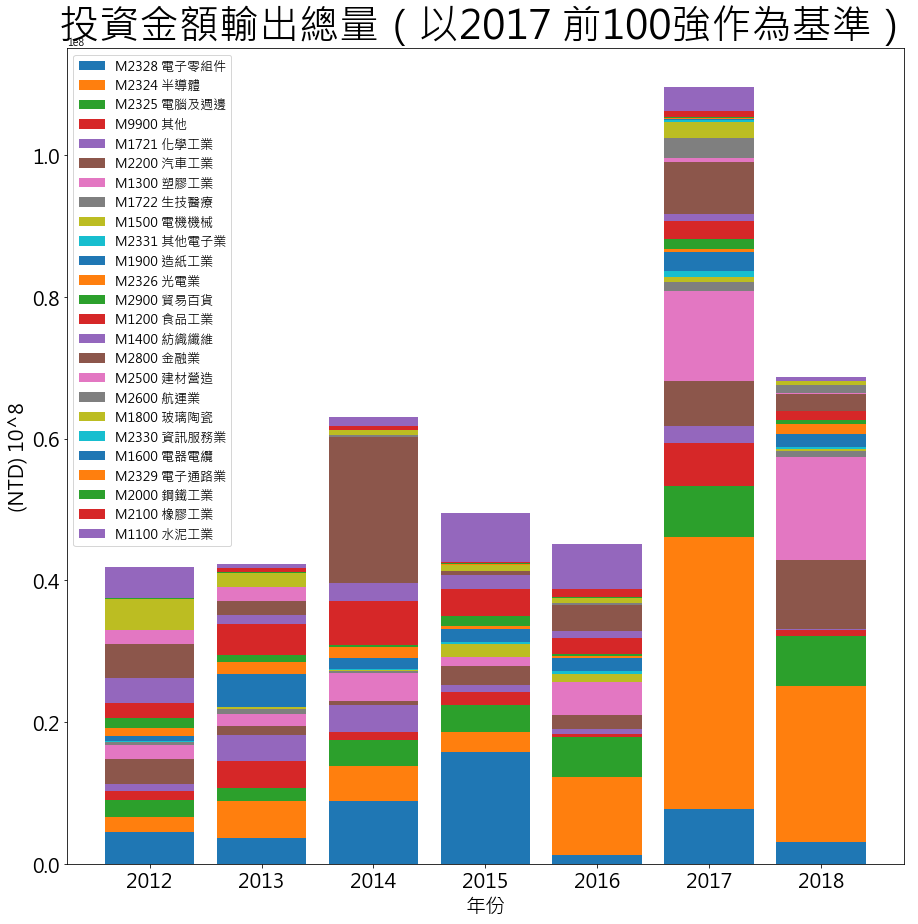

In [75]:
industry_name = df2_pro.groupby('TSE新產業名').size().sort_values(ascending = False).index
time = [(x) for x in range(2012, 2019)]
bot = np.zeros(len(time))
plt.figure(figsize = (15,15))
for industry in industry_name:
    stage = df2_pro.groupby('TSE新產業名').get_group(industry)
    Y = np.array([sum(stage[year]) for year in time])
    X = time
    plt.bar(X, Y, bottom = bot, label = industry)
    bot = bot + Y
plt.legend(loc='upper left', prop={'size': 13})
plt.xlabel('年份', fontsize = 20)
plt.ylabel('(NTD) 10^8', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('投資金額輸出總量（以2017 前100強作為基準）' , fontsize = 40)
plt.savefig('投資金額輸出總量', dpi = 500)
plt.show() 
    
        

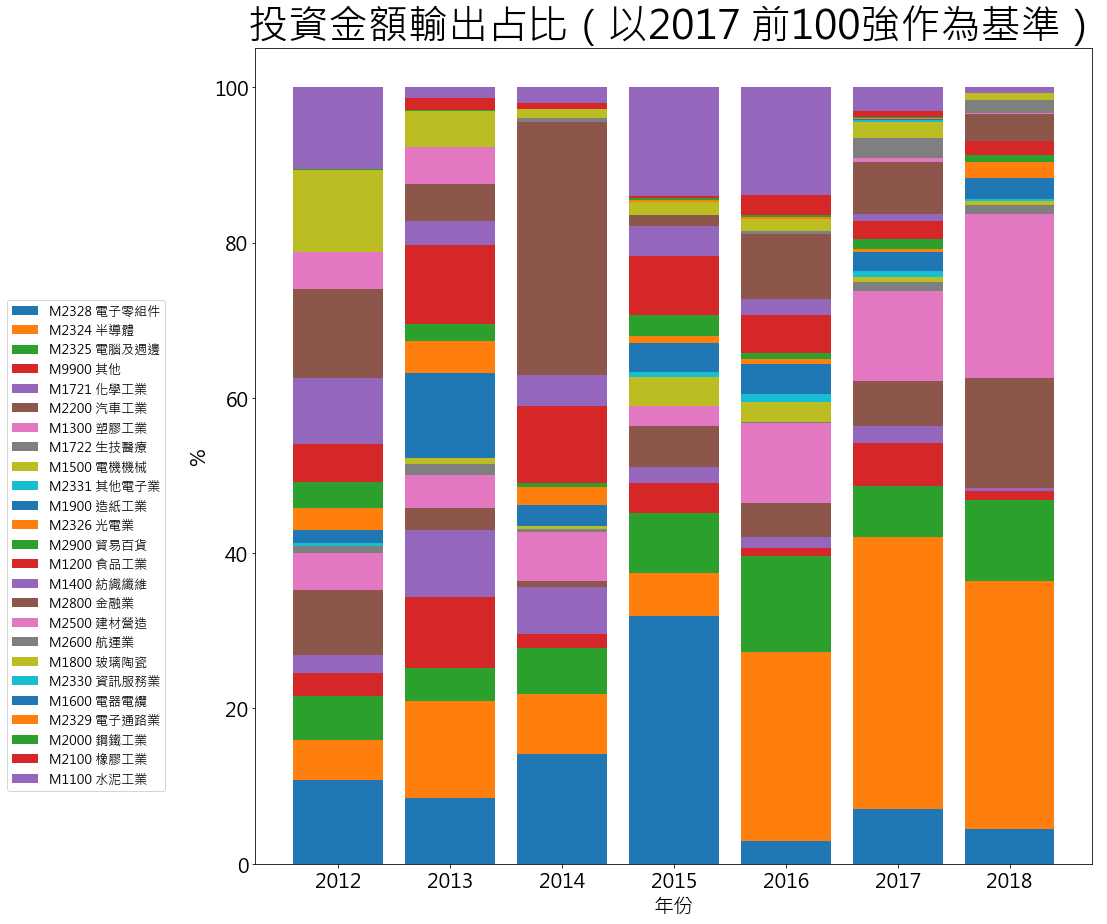

In [79]:
industry_name = df2_pro.groupby('TSE新產業名').size().sort_values(ascending = False).index
total_sum = dict()
for x in range(2012, 2019):
    total_sum[x] = sum(df2_pro[x])
time = [(x) for x in range(2012, 2019)]
bot = np.zeros(len(time))
plt.figure(figsize = (15,15))
for industry in industry_name:
    stage = df2_pro.groupby('TSE新產業名').get_group(industry)
    Y = np.array([sum(stage[year]) * 100/total_sum[year] for year in time])
    X = time
    plt.bar(X, Y, bottom = bot, label = industry)
    bot = bot + Y
plt.legend(loc='best', bbox_to_anchor=(-0.1, 0.7, 0, 0), prop={'size': 13})
plt.xlabel('年份', fontsize = 20)
plt.ylabel('%', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('投資金額輸出占比（以2017 前100強作為基準）' , fontsize = 40)
plt.savefig('前100投資金額輸出比重', dpi = 500, bbox_inches = 'tight')
plt.show() 

# 觀察2017 的100強在2012 到2018 中進100強的數量


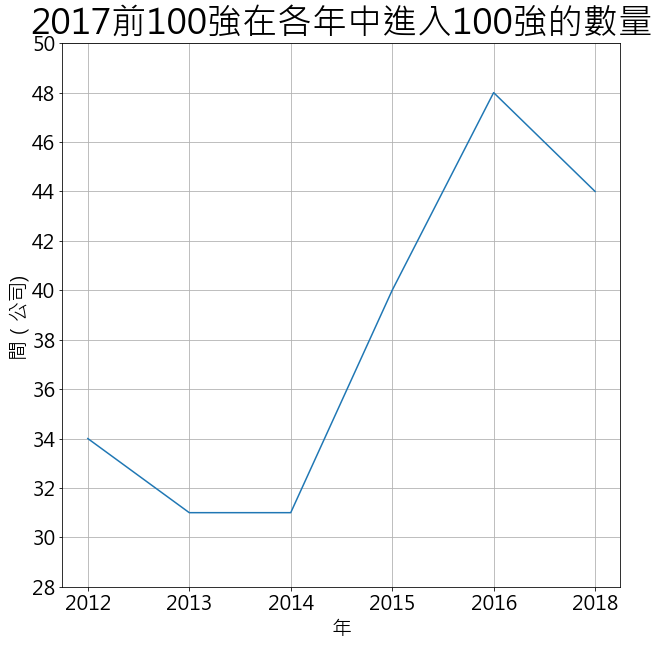

In [41]:
time = [str(x) for x in range(2012, 2019)]
time.remove('2017')
company2017 = set(df2_pro['公司代碼'])
number = []
for sheet in time:
    df_com = pd.read_excel('大陸投資2012-2018.xlsx', sheetname = sheet)
    df_com = df_com[0:100]
    company = set(df_com['公司代碼'])
    sub_number = len(company & company2017)
    number.append(sub_number)
    
plt.figure(figsize = (10,10))
plt.plot(time, number)
plt.title('2017前100強在各年中進入100強的數量', fontsize = 35)
plt.xlabel('年', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(min(number)-3, max(number) + 3, step = 2), fontsize = 20)
plt.ylabel('間（公司)', fontsize = 20)
plt.grid()
plt.savefig('2017前100強在各年中進入100強的數量', dpi = 400)
plt.show()
    
    



# 利用全部公司畫圖

In [8]:
df2_total = pd.read_excel('大陸投資2012-2018_改.xlsx', sheet_name = 9)
df2_total.shape
df2_total.head(10)

公司代碼      TSE新產業名      TEJ子產業名         年月 轉投資名稱  2017本期匯出金額(NTD)  \
0  2330 台積電    M2324 半導體  M23G1A 晶圓代工 2017-12-29   _合計         21724892   
1   2303 聯電    M2324 半導體  M23G1A 晶圓代工 2017-12-29   _合計         13244953   
2   1326 台化   M1300 塑膠工業   M13A1 泛用塑膠 2017-12-29   _合計          6155311   
3   2201 裕隆   M2200 汽車工業    M22A 汽車製造 2017-12-29   _合計          4874572   
4   9940 信義     M9900 其他    M25D 仲介建經 2017-12-29   _合計          3900696   
5   4938 和碩  M2325 電腦及週邊     M23A2 NB 2017-12-29   _合計          3749760   
6  2882 國泰金    M2800 金融業    M28L 金融控股 2017-12-29   _合計          3457594   
7   1101 台泥   M1100 水泥工業    M11A 水泥製造 2017-12-29   _合計          3422400   
8   3044 健鼎  M2328 電子零組件   M23B2D PCB 2017-12-29   _合計          3013300   
9   2603 長榮    M2600 航運業    M26A2 貨櫃輪 2017-12-29   _合計          2687071   

        2012       2013        2014       2015       2016        2018  
0        0.0        0.0         0.0        0.0  6435200.0   2361320.0  
1   592943.0  4679315.0     25414.0  1035969.0     4830.0  17227277.0  
2   874680.0    29610.0    456525.0        0.0  2367940.0   6589991.0  
3  2760978.0        0.0     44310.0  1437410.0  1556621.0   8591001.0  
4   457462.0  3868747.0    454477.0    87082.0        0.0         0.0  
5   580800.0   566295.0   2516786.0  1608425.0  2031750.0         0.0  
6  3773774.0  1294980.0  13260760.0        0.0  1886505.0   2200394.0  
7  4409597.0   597577.0   1269063.0  6947298.0  6259725.0    523224.0  
8  1392606.0   107339.0   1690416.0        0.0        0.0         0.0  
9        0.0        0.0         0.0        0.0   198030.0   1128313.0

In [9]:
df2_total.columns

Index([           '公司代碼',         'TSE新產業名',         'TEJ子產業名',
                    '年月',           '轉投資名稱', '2017本期匯出金額(NTD)',
                    2012,              2013,              2014,
                    2015,              2016,              2018],
      dtype='object')

In [10]:
df2_total = df2_total.drop(columns = ['年月', '轉投資名稱'])
df2_total.rename(columns = {'2017本期匯出金額(NTD)': 2017}, inplace = True)
df2_total = df2_total[['公司代碼','TSE新產業名','TEJ子產業名'] + [x for x in range(2012, 2019)]]
df2_total = df2_total.fillna(0)
df2_total

公司代碼     TSE新產業名      TEJ子產業名       2012       2013      2014  \
0    2330 台積電   M2324 半導體  M23G1A 晶圓代工        0.0        0.0       0.0   
1     2303 聯電   M2324 半導體  M23G1A 晶圓代工   592943.0  4679315.0   25414.0   
2     1326 台化  M1300 塑膠工業   M13A1 泛用塑膠   874680.0    29610.0  456525.0   
3     2201 裕隆  M2200 汽車工業    M22A 汽車製造  2760978.0        0.0   44310.0   
4     9940 信義    M9900 其他    M25D 仲介建經   457462.0  3868747.0  454477.0   
..        ...         ...          ...        ...        ...       ...   
667  9943 好樂迪  M2700 觀光事業   M27B 觀光遊樂區        0.0        0.0       0.0   
668   9944 新麗    M9900 其他     M14F 不織布        0.0        0.0       0.0   
669  9945 潤泰新    M9900 其他      M25A 建設        0.0        0.0  158250.0   
670   9955 佳龍    M9900 其他  M99L1 貴金屬回收        0.0        0.0       0.0   
671   5522 遠雄  M2500 建材營造      M25A 建設  1174659.0  1776610.0  798426.0   

          2015       2016      2017        2018  
0          0.0  6435200.0  21724892   2361320.0  
1    1035969.0     4830.0  13244953  17227277.0  
2          0.0  2367940.0   6155311   6589991.0  
3    1437410.0  1556621.0   4874572   8591001.0  
4      87082.0        0.0   3900696         0.0  
..         ...        ...       ...         ...  
667        0.0        0.0         0         0.0  
668        0.0        0.0         0         0.0  
669        0.0        0.0         0         0.0  
670        0.0        0.0         0         0.0  
671        0.0        0.0  -7133794         0.0  

[672 rows x 10 columns]

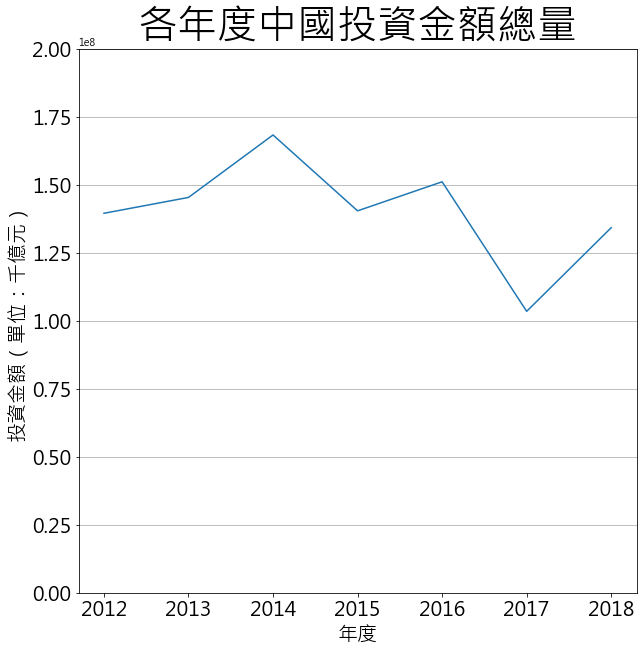

In [22]:
time = [(x) for x in range(2012, 2019)]
plt.figure(figsize = (10,10))
Y = [sum(df2_total[x]) for x in time]
X = time
plt.plot(X,Y)
plt.title('各年度中國投資金額總量', fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('年度',fontsize = 20)
plt.ylabel('投資金額（單位：千億元）',fontsize = 20)
plt.ylim(0,2*(10**8))
plt.grid(axis="y")
plt.show()

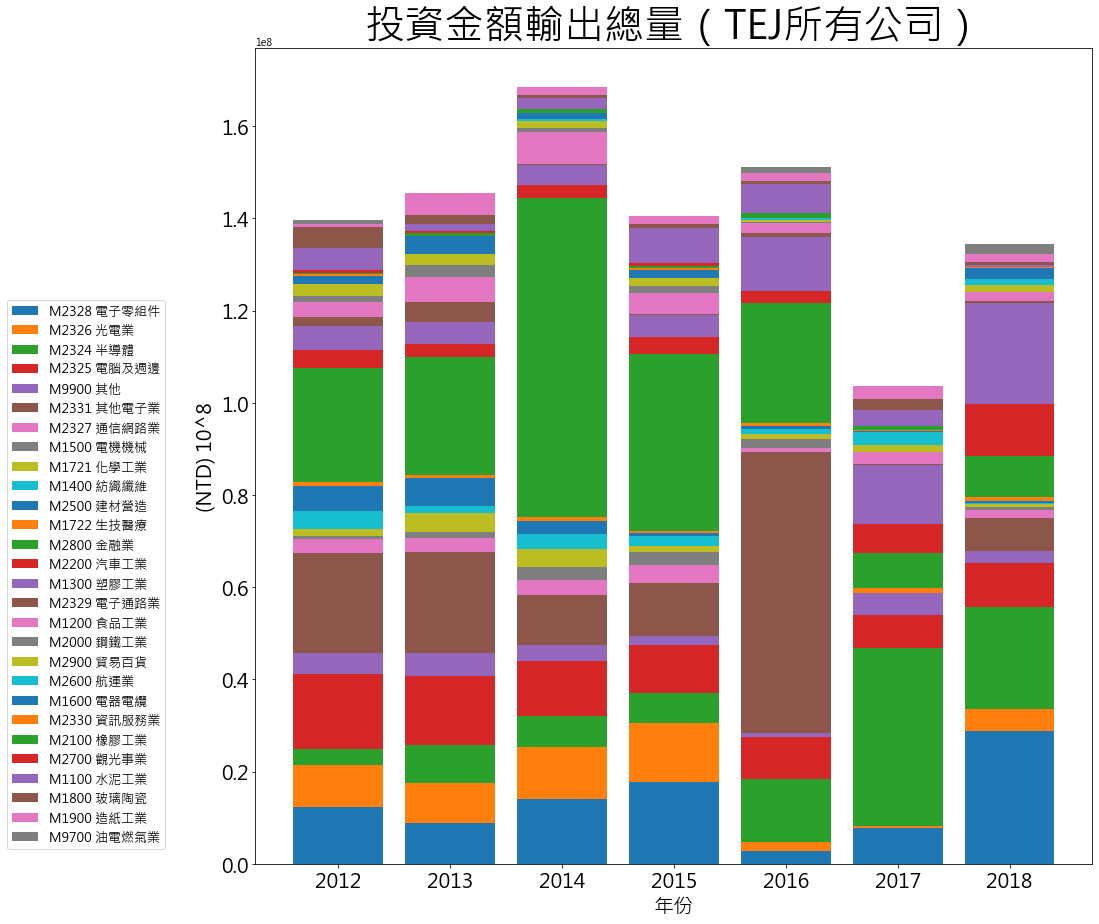

In [73]:
industry_name = df2_total.groupby('TSE新產業名').size().sort_values(ascending = False).index
time = [(x) for x in range(2012, 2019)]
bot = np.zeros(len(time))
plt.figure(figsize = (15,15))
for industry in industry_name:
    stage = df2_total.groupby('TSE新產業名').get_group(industry)
    Y = np.array([sum(stage[year]) for year in time])
    X = time
    plt.bar(X, Y, bottom = bot, label = industry)
    bot = bot + Y
plt.legend(loc='best', bbox_to_anchor=(-0.1, 0.7, 0, 0), prop={'size': 13})
plt.xlabel('年份', fontsize = 20)
plt.ylabel('(NTD) 10^8', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('投資金額輸出總量（TEJ所有公司）' , fontsize = 40)
plt.savefig('投資金額輸出總量（TEJ所有公司）',dpi = 500, bbox_inches = 'tight')
plt.show() 

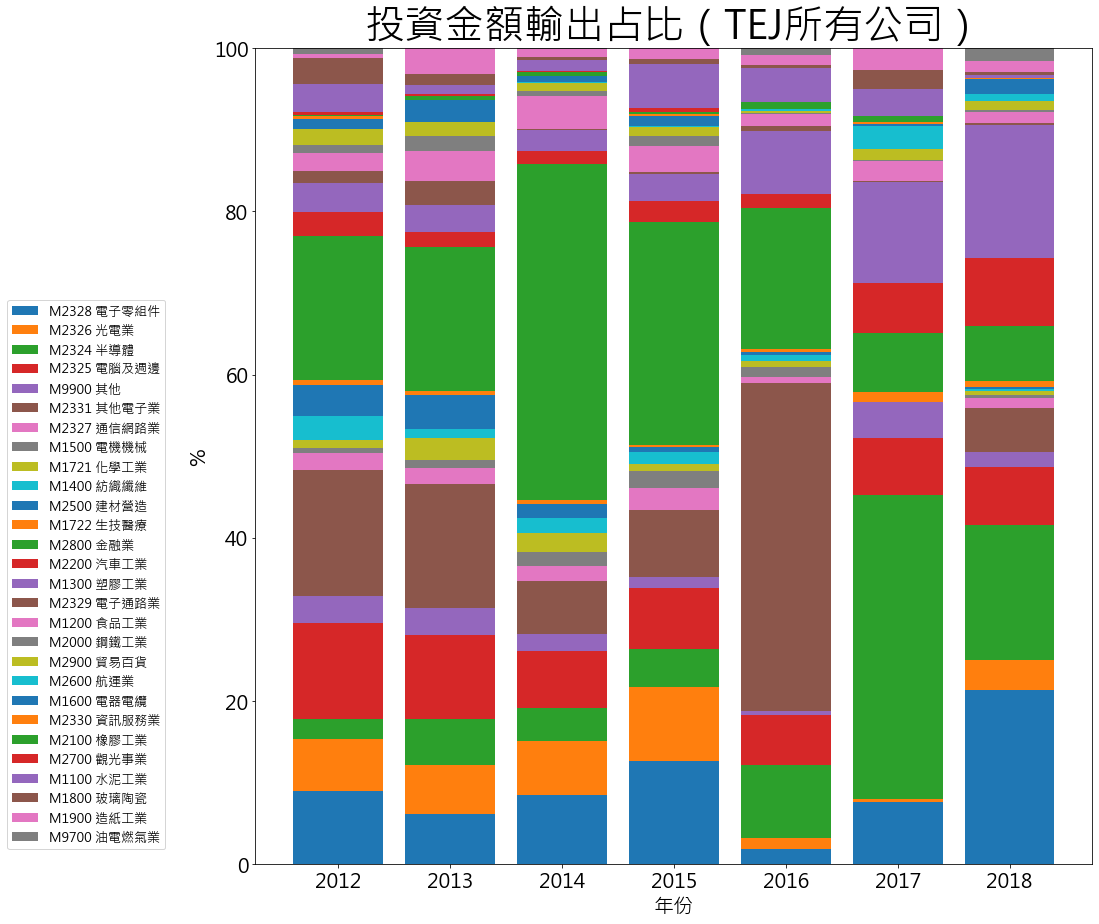

In [78]:
industry_name = df2_total.groupby('TSE新產業名').size().sort_values(ascending = False).index
total_sum = dict()
for x in range(2012, 2019):
    total_sum[x] = sum(df2_total[x])
time = [(x) for x in range(2012, 2019)]
bot = np.zeros(len(time))
plt.figure(figsize = (15,15))
for industry in industry_name:
    stage = df2_total.groupby('TSE新產業名').get_group(industry)
    Y = np.array([sum(stage[year]) * 100/total_sum[year] for year in time])
    X = time
    plt.bar(X, Y, bottom = bot, label = industry)
    bot = bot + Y
plt.legend(loc='best', bbox_to_anchor=(-0.1, 0.7, 0, 0), prop={'size': 13})
plt.xlabel('年份', fontsize = 20)
plt.ylabel('%', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('投資金額輸出占比（TEJ所有公司）' , fontsize = 40)
plt.savefig('前100投資金額輸出比重（TEJ所有公司）', dpi = 500, bbox_inches = 'tight')
plt.show() 

# 各年前100產業分佈圖

In [7]:
df_industry = pd.read_excel('大陸投資2012-2018_改.xlsx', sheet_name = 'final')
df_industry = df_industry.drop(columns = ['年月', '轉投資名稱'])
df_industry.rename(columns = {'2017本期匯出金額(NTD)': 2017}, inplace = True)
df_industry = df_industry[['公司代碼','TSE新產業名','TEJ子產業名'] + [x for x in range(2012, 2019)]]
df_industry = df_industry.fillna(0)
df_industry


公司代碼      TSE新產業名        TEJ子產業名       2012       2013        2014  \
0     2330 台積電    M2324 半導體    M23G1A 晶圓代工        0.0        0.0         0.0   
1      2303 聯電    M2324 半導體    M23G1A 晶圓代工   592943.0  4679315.0     25414.0   
2      1326 台化   M1300 塑膠工業     M13A1 泛用塑膠   874680.0    29610.0    456525.0   
3      2201 裕隆   M2200 汽車工業      M22A 汽車製造  2760978.0        0.0     44310.0   
4      9940 信義     M9900 其他      M25D 仲介建經   457462.0  3868747.0    454477.0   
5      4938 和碩  M2325 電腦及週邊       M23A2 NB   580800.0   566295.0   2516786.0   
6     2882 國泰金    M2800 金融業      M28L 金融控股  3773774.0  1294980.0  13260760.0   
7      1101 台泥   M1100 水泥工業      M11A 水泥製造  4409597.0   597577.0   1269063.0   
8      3044 健鼎  M2328 電子零組件     M23B2D PCB  1392606.0   107339.0   1690416.0   
9      2603 長榮    M2600 航運業      M26A2 貨櫃輪        0.0        0.0         0.0   
10    5880 合庫金    M2800 金融業      M28L 金融控股        0.0        0.0   5898196.0   
11    1907 永豐餘   M1900 造紙工業        M19A 造紙   202380.0  2841397.0    871641.0   
12     1802 台玻   M1800 玻璃陶瓷       M18 玻璃陶瓷  4416109.0  1785300.0    714160.0   
13     1313 聯成   M1300 塑膠工業      M13A7 可塑劑  1091831.0   864957.0   1691498.0   
14     1304 台聚   M1300 塑膠工業     M13A1 泛用塑膠        0.0        0.0    158250.0   
15    2352 佳世達  M2325 電腦及週邊      M23C1 監視器        0.0   476880.0         0.0   
16     1216 統一   M1200 食品工業      M12C 飲料乳品  2043457.0  2944775.0   5575199.0   
17     1308 亞聚   M1300 塑膠工業     M13A1 泛用塑膠      173.0      566.0         0.0   
18    2883 開發金    M2800 金融業      M28L 金融控股  1037423.0   714370.0   1383007.0   
19     2388 威盛    M2324 半導體     M23G5 IC設計        0.0   292530.0    163378.0   
20     9941 裕融     M9900 其他       M28K 租賃業        0.0        0.0    681646.0   
21    2912 統一超   M2900 貿易百貨     M29A4 便利商店   759881.0   604695.0    243243.0   
22    2454 聯發科    M2324 半導體     M23G5 IC設計  1087408.0   215610.0   4664742.0   
23    1314 中石化   M1300 塑膠工業       M13A5 化纖    29060.0   882270.0   1656001.0   
24    2456 奇力新  M2328 電子零組件     M23D5 被動元件    80968.0   145498.0    192383.0   
25   2104 國際中橡   M2100 橡膠工業      M21C 橡膠原料        0.0   645279.0    525390.0   
26    1402 遠東新   M1400 紡織纖維     M14A1 聚酯絲棉  3547718.0  1270063.0   2477122.0   
27     1710 東聯   M1721 化學工業       M13A5 化纖   406560.0  1609470.0   1629975.0   
28     6239 力成    M2324 半導體     M23G2 IC封測        0.0        0.0         0.0   
29     1227 佳格   M1200 食品工業      M12Z 其他食品        0.0  1389347.0    645127.0   
..         ...          ...            ...        ...        ...         ...   
642   8215 明基材    M2326 光電業  M23C8C LCD 原料        0.0        0.0         0.0   
643    8249 菱光  M2328 電子零組件      M23C2 掃瞄器        0.0        0.0         0.0   
644    8271 宇瞻    M2324 半導體   M23G3B 記憶體模組        0.0        0.0         0.0   
645    8374 羅昇   M1500 電機機械     M15A2 模具零件        0.0        0.0         0.0   
646    8443 阿瘦   M2900 貿易百貨     M99K 鞋及旅行箱    58080.0    60102.0     60064.0   
647   8454 富邦媒   M2900 貿易百貨     M23K4 網路服務        0.0   295286.0    101900.0   
648    8464 億豐     M9900 其他     M99B 五金及家具        0.0        0.0         0.0   
649   8473 山林水     M9900 其他    M99L2 廢棄物處理        0.0        0.0         0.0   
650  8497 格威傳媒     M9900 其他       M99E 廣告業        0.0        0.0         0.0   
651   8940 新天地   M2700 觀光事業      M27A2 餐飲業    93720.0   381911.0         0.0   
652    8996 高力   M1500 電機機械       M20A9 其他        0.0        0.0         0.0   
653    9904 寶成     M9900 其他     M99K 鞋及旅行箱        0.0        0.0         0.0   
654    9905 大華     M9900 其他      M20B 金屬製品        0.0        0.0         0.0   
655   9907 統一實     M9900 其他      M20B 金屬製品  1815781.0        0.0    949500.0   
656    9910 豐泰     M9900 其他     M99K 鞋及旅行箱        0.0   331556.0         0.0   
657    9911 櫻花     M9900 其他     M99B 五金及家具        0.0        0.0         0.0   
658    9912 偉聯  M2325 電腦及週邊      M23C1 監視器        0.0     4471.0         0.0   
659   9914 美利達     M9900 其他    M99Z1 自行健行車   217800.0   268245.0         0.0   
660   9917

# 建構出各年度100強dataframe

In [58]:
time = [(x) for x in range(2013, 2019)]
one = df_industry.sort_values(by = time, ascending = False)[0:100].groupby('TSE新產業名').size()
df_one = pd.DataFrame(one,columns =[2012])
df_all = pd.DataFrame(df_one, columns = [2012])
for T in time:
    one = df_industry.sort_values(by = T, ascending = False)[0:100].groupby('TSE新產業名').size()
    df_one = pd.DataFrame(one,columns =[T])
    df_all = pd.merge(df_all, df_one, on = 'TSE新產業名' , how = 'outer')
    
df_all = df_all.fillna(0)
df_all['sum'] = df_all.sum(1)
df_all = df_all.sort_values(by = 'sum', ascending = False)
df_all


2012  2013  2014  2015  2016  2017  2018   sum
TSE新產業名                                                    
M2328 電子零組件  12.0  12.0  10.0  12.0  11.0  15.0  20.0  92.0
M2800 金融業    10.0  10.0  15.0  14.0   7.0   3.0   9.0  68.0
M2325 電腦及週邊   9.0   9.0   8.0  11.0  13.0   9.0   6.0  65.0
M2324 半導體     8.0   8.0   4.0   6.0   9.0   9.0   5.0  49.0
M2326 光電業    10.0  10.0  10.0   6.0   5.0   3.0   4.0  48.0
M1300 塑膠工業    4.0   4.0   4.0   4.0   7.0   5.0   9.0  37.0
M2200 汽車工業    2.0   2.0   6.0   6.0   5.0   6.0   6.0  33.0
M2331 其他電子業   3.0   3.0   4.0   6.0   4.0   4.0   7.0  31.0
M9900 其他      3.0   3.0   4.0   2.0   3.0   7.0   6.0  28.0
M1200 食品工業    4.0   4.0   4.0   5.0   3.0   3.0   3.0  26.0
M2327 通信網路業   5.0   5.0   5.0   3.0   4.0   0.0   3.0  25.0
M1721 化學工業    2.0   2.0   3.0   2.0   6.0   6.0   3.0  24.0
M2900 貿易百貨    5.0   5.0   3.0   3.0   3.0   3.0   2.0  24.0
M1500 電機機械    3.0   3.0   4.0   3.0   3.0   4.0   2.0  22.0
M2500 建材營造    4.0   4.0   3.0   3.0   2.0   2.0   2.0  20.0
M1900 造紙工業    2.0   2.0   2.0   2.0   2.0   3.0   2.0  15.0
M1400 紡織纖維    1.0   1.0   2.0   2.0   2.0   3.0   1.0  12.0
M1722 生技醫療    1.0   1.0   1.0   0.0   2.0   5.0   2.0  12.0
M1100 水泥工業    2.0   2.0   2.0   2.0   1.0   1.0   1.0  11.0
M2000 鋼鐵工業    2.0   2.0   1.0   3.0   1.0   1.0   1.0  11.0
M2329 電子通路業   3.0   3.0   0.0   0.0   2.0   1.0   1.0  10.0
M1800 玻璃陶瓷    1.0   1.0   1.0   1.0   1.0   2.0   2.0   9.0
M1600 電器電纜    2.0   2.0   1.0   1.0   0.0   1.0   1.0   8.0
M2100 橡膠工業    1.0   1.0   2.0   1.0   1.0   1.0   0.0   7.0
M2600 航運業     0.0   0.0   1.0   0.0   2.0   2.0   1.0   6.0
M2700 觀光事業    1.0   1.0   0.0   1.0   0.0   0.0   0.0   3.0
M2330 資訊服務業   0.0   0.0   0.0   1.0   0.0   1.0   0.0   2.0
M9700 油電燃氣業   0.0   0.0   0.0   0.0   1.0   0.0   1.0   2.0

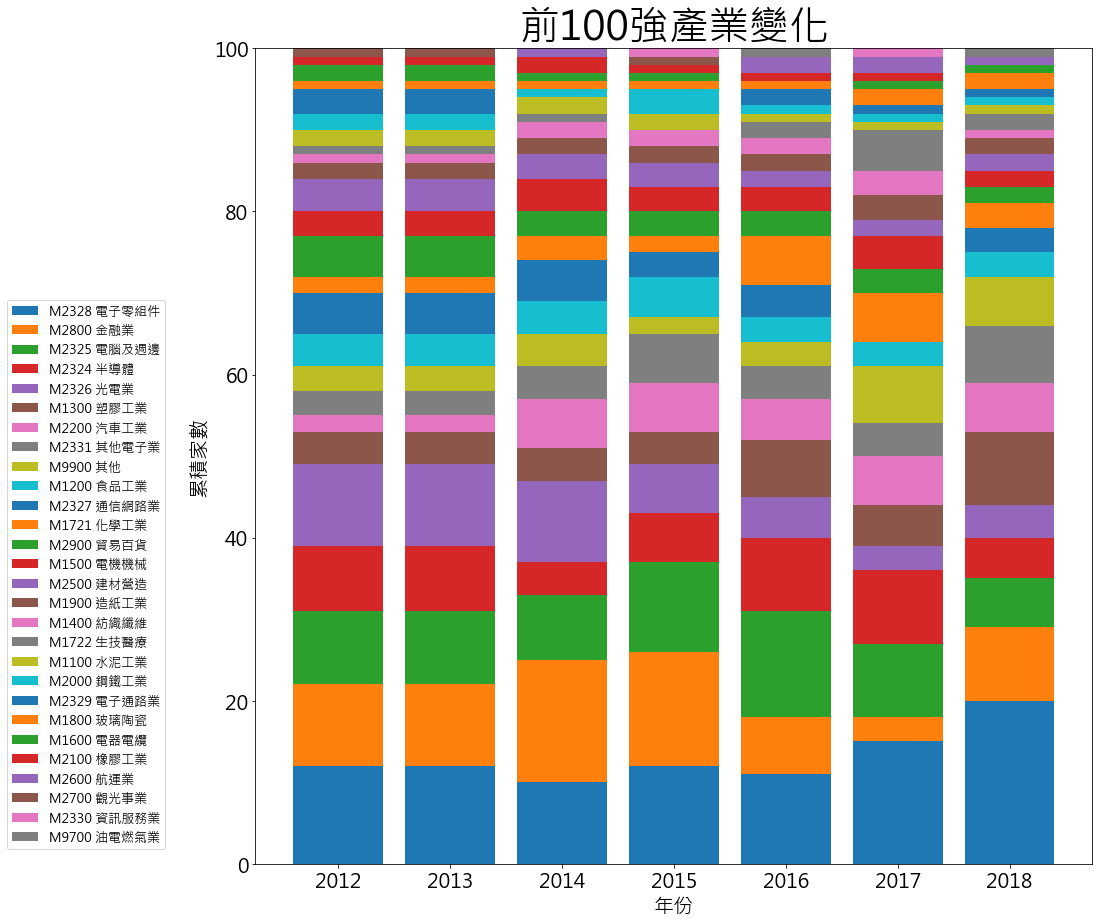

In [90]:
industry_name = df_all.index
time = [(x) for x in range(2012, 2019)]
bot = np.zeros(len(time))
plt.figure(figsize = (15,15))
row = 0
for industry in industry_name:
    Y = np.array(df_all.iloc[row, 0:7])
    X = time
    plt.bar(X, Y, bottom = bot, label = industry)
    bot = bot + Y
    row += 1
plt.legend(loc='best', bbox_to_anchor=(-0.1, 0.7, 0, 0), prop={'size': 13})
plt.xlabel('年份', fontsize = 20)
plt.ylabel('累積家數', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('前100強產業變化' , fontsize = 40)
plt.savefig('前100強產業變化',dpi = 500, bbox_inches = 'tight')
plt.show() 

# 長期投資明細

In [1]:
df_long = pd.read_excel('長期投資明細.xlsx')
df_long

NameError: name 'pd' is not defined

In [110]:
print('中國資料')
print('缺失資料',df_long.groupby('國別').get_group('中國')['成本'].isna().sum())
print(df_long.groupby('國別').get_group('中國').shape)
print('----------------------------------------')
print('全部資料')
print('缺失資料',df_long['成本'].isna().sum())
print(df_long.shape)

中國資料
缺失資料 229
(339, 22)
----------------------------------------
全部資料
缺失資料 30884
(60000, 22)


In [109]:
df_long.groupby('國別').size().sort_values(ascending = False)

國別
台灣       45052
維京        2730
外國        2518
美國        1578
薩摩亞       1441
開曼        1103
香港         978
日本         583
新加坡        521
中國         339
越南         304
泰國         268
荷蘭         244
馬來西亞       221
德國         189
模里西斯       185
韓國         142
英國         141
塞席爾        127
印尼         114
百慕達         99
澳洲          95
菲律賓         92
印度          74
巴拿馬         73
貝里斯         70
加拿大         66
巴西          60
墨西哥         48
汶萊          44
         ...  
南非          20
史瓦濟蘭        19
阿拉伯聯合       14
安圭拉         14
以色列         13
澳門          12
尼加拉瓜        12
馬紹爾         12
沙烏地阿拉       12
俄羅斯         11
緬甸          11
愛爾蘭         10
智利           8
丹麥           8
奧地利          8
巴哈馬          6
比利時          6
瓜地馬拉         5
約旦           5
關島           5
伊朗           4
阿根廷          4
挪威           4
西薩摩亞         4
塞爾維亞         4
斯洛伐克         4
薩爾瓦多         4
哥倫比亞         4
盧森堡          2
秘魯           2
Length: 69, dtype: int64

# 做出panel dataframe


In [5]:
# 先找出需要的 correlation > 0.5 的column
xl = pd.ExcelFile('大陸投資100強data.xlsx')                
col_list = []

for sheet in tqdm_notebook(xl.sheet_names):
    df1 = pd.read_excel('大陸投資100強data.xlsx', sheet_name = sheet)
    df1_dp = df1.dropna(axis = 1)
    df1_dp_corr = df1_dp.corr()
    invest_series = df1_dp_corr.loc['本期匯出金額(NTD)', :]
    invest_series = invest_series[invest_series > 0.5]
    set_list = set(col_list)
    for col in invest_series.index:
        #col = col.strip()
        if col not in set_list:
            col_list.append(col)
    

print(len(col_list))


40


In [13]:
col_list = col_list + ['公司', 'TSE新產業名', 'TEJ子產業名','年月']
col_list

['實收資本額(元)',
 '本期匯出金額(NTD)',
 '實收資本額(NTD)',
 '期末累計匯出金額(NTD)',
 '期末帳面值(NTD)',
 '累計台灣匯出總額(NTD)',
 '經濟部核准金額(NTD)',
 '  現金及約當現金',
 '  不動產廠房及設備',
 '  其他應付款',
 '  當期所得稅負債',
 '  應計退休金負債',
 '  股本',
 '    法定盈餘公積',
 '    未分配盈餘',
 '  保留盈餘',
 '母公司股東權益合計',
 '股東權益總額',
 '營業收入淨額',
 '營業費用',
 '稅前淨利',
 '所得稅費用',
 '繼續營業單位損益',
 '合併總損益',
 '本期綜合損益總額',
 '歸屬母公司淨利（損）',
 '綜合損益歸屬母公司',
 '加權平均股數',
 '稀釋稅後淨利',
 '加權平均股數－稀釋',
 '稅前息前淨利',
 '稅前息前折舊前淨利',
 '常續性稅後淨利',
 '期末普通股－現金股利',
 '  稅前淨利－CFO',
 '  折舊－CFO',
 '  攤提－CFO',
 '來自營運之現金流量',
 '期初現金及約當現金',
 '期末現金及約當現金',
 '公司',
 'TSE新產業名',
 'TEJ子產業名',
 '公司',
 'TSE新產業名',
 'TEJ子產業名',
 '年月']

# 整併dataframe

In [19]:
col_set = set(col_list)
df_orig = pd.read_excel('2012-2018全資料.xlsx', sheet_name = 0)
df_orig.rename(columns = {df_orig.columns[0]:'公司'}, inplace = True)
df_final = df_orig[['公司']]
xl = pd.ExcelFile('2012-2018全資料.xlsx')   

for sheet in tqdm_notebook(xl.sheet_names):
    col_need = []
    df_orig = pd.read_excel('2012-2018全資料.xlsx', sheet_name = sheet)
    df_orig.rename(columns = {df_orig.columns[0]:'公司'}, inplace = True)
    df_orig.rename(columns = {'年度':'年月'}, inplace = True)
    for col in df_orig.columns:
        if col in col_set:
            col_need.append(col)
    two_para = True if ('年月' in df_final.columns) &('年月' in df_orig[col_need].columns) else False
   
    df_final = pd.merge(df_final, df_orig[col_need], on = ['公司','年月'] if two_para else ['公司'])
    print(df_final.shape)
    

df_final

(863, 4)
(4633, 11)
(4621, 11)
(4621, 22)
(4621, 37)
(4621, 38)
(4621, 44)
(4621, 44)
(4621, 44)
(4621, 44)
(4621, 44)



公司     實收資本額(元)      TEJ子產業名     TSE新產業名         年月  實收資本額(NTD)  \
0     1101 台泥  56656192040    M11A 水泥製造  M1100 水泥工業 2018-12-28  64906168.0   
1     1101 台泥  56656192040    M11A 水泥製造  M1100 水泥工業 2017-12-29  63518303.0   
2     1101 台泥  56656192040    M11A 水泥製造  M1100 水泥工業 2016-12-30  64444944.0   
3     1101 台泥  56656192040    M11A 水泥製造  M1100 水泥工業 2015-12-31  60430820.0   
4     1101 台泥  56656192040    M11A 水泥製造  M1100 水泥工業 2014-12-31  54233375.0   
...       ...          ...          ...         ...        ...         ...   
4616  9955 佳龍   1032082290  M99L1 貴金屬回收    M9900 其他 2016-12-30    322500.0   
4617  9955 佳龍   1032082290  M99L1 貴金屬回收    M9900 其他 2015-12-31    328250.0   
4618  9955 佳龍   1032082290  M99L1 貴金屬回收    M9900 其他 2014-12-31    316500.0   
4619  9955 佳龍   1032082290  M99L1 貴金屬回收    M9900 其他 2013-12-31    298050.0   
4620  9955 佳龍   1032082290  M99L1 貴金屬回收    M9900 其他 2012-12-28    290400.0   

      本期匯出金額(NTD)  期末累計匯出金額(NTD)   期末帳面值(NTD)  累計台灣匯出總額(NTD)  ...      稅前息前淨利  \
0        523224.0     48621101.0  120556099.0     72144649.0  ...  33004723.0   
1       3422400.0     46632815.0  100961425.0     44199303.0  ...  15747968.0   
2       6259725.0     47874108.0   59706804.0     41812077.0  ...  13432172.0   
3       6947298.0     41838707.0   56226126.0     39715857.0  ...  10539754.0   
4       1269063.0     31597498.0   51141644.0     34393308.0  ...  23105935.0   
...           ...            ...          ...            ...  ...         ...   
4616          0.0       328950.0     235402.0       328950.0  ...   -121308.0   
4617          0.0       334815.0     279153.0       334815.0  ...   -124636.0   
4618          0.0       322830.0     317333.0       322830.0  ...     56727.0   
4619          0.0       304011.0     324177.0       304011.0  ...    -64511.0   
4620          0.0       296208.0     354027.0       296208.0  ...     67282.0   

       稅前息前折舊前淨利     常續性稅後淨利  期末普通股－現金股利    稅前淨利－CFO     折舊－CFO    攤提－CFO  \
0     39521444.0  22753293.0  16856367.0  30544421.0  6129527.0  387194.0   
1     22211761.0  10983992.0   6360764.0  13824659.0  6080554.0  383239.0   
2     20422719.0   9636065.0   5353655.0  11515335.0  6587626.0  402921.0   
3     17958912.0   6803992.0   4910594.0   8666015.0  7021678.0  397480.0   
4     29782835.0  16420654.0   9193518.0  21198720.0  6331499.0  345401.0   
...          ...         ...         ...         ...        ...       ...   
4616    -93774.0   -126551.0         0.0   -128186.0    27526.0       8.0   
4617    -93042.0   -127244.0         0.0   -131215.0    31586.0       8.0   
4618     89585.0     40404.0         0.0     50182.0    32853.0       5.0   
4619    -28773.0    -74196.0         0.0    -73566.0    35738.0       0.0   
4620    109510.0     48866.0     30955.0     61583.0    38838.0    3390.0   

       來自營運之現金流量   期初現金及約當現金   期末現金及約當現金  
0     22150720.0  26331218.0  48507889.0  
1     12310560.0  28179758.0  26331218.0  
2     18750155.0  38977360.0  28179758.0  
3     21763392.0  30514042.0  38977360.0  
4     19904673.0  25711065.0  30514042.0  
...          ...         ...         ...  
4616   -274117.0    223247.0    165547.0  
4617     64013.0    377325.0    223247.0  
4618     39417.0    368287.0    377325.0  
4619    227936.0    389583.0    368287.0  
4620    319556.0    380032.0    389583.0  

[4621 rows x 44 columns]

In [21]:
df_final.groupby('年月').size()

年月
2012-12-28    642
2013-12-31    647
2014-12-31    654
2015-12-31    665
2016-12-30    670
2017-12-29    671
2018-12-28    672
dtype: int64

In [25]:
#調整名稱
for x in range(0, len(df_final['公司'])):
    df_final['公司'][x] = df_final['公司'][x][0:4]



/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df_final.columns

Index(['公司', '實收資本額(元)', 'TEJ子產業名', 'TSE新產業名', '年月', '實收資本額(NTD)',
       '本期匯出金額(NTD)', '期末累計匯出金額(NTD)', '期末帳面值(NTD)', '累計台灣匯出總額(NTD)',
       '經濟部核准金額(NTD)', '  現金及約當現金', '  不動產廠房及設備', '  其他應付款', '  當期所得稅負債',
       '  應計退休金負債', '  股本', '    法定盈餘公積', '    未分配盈餘', '  保留盈餘', '母公司股東權益合計',
       '股東權益總額', '營業收入淨額', '營業費用', '稅前淨利', '所得稅費用', '繼續營業單位損益', '合併總損益',
       '本期綜合損益總額', '歸屬母公司淨利（損）', '綜合損益歸屬母公司', '加權平均股數', '稀釋稅後淨利', '加權平均股數－稀釋',
       '稅前息前淨利', '稅前息前折舊前淨利', '常續性稅後淨利', '期末普通股－現金股利', '  稅前淨利－CFO',
       '  折舊－CFO', '  攤提－CFO', '來自營運之現金流量', '期初現金及約當現金', '期末現金及約當現金'],
      dtype='object')

In [34]:
order = list(df_final.columns)
take  = ['年月','TEJ子產業名','TSE新產業名','期末累計匯出金額(NTD)']
for x in take:
    order.remove(x)
    
order.insert(1,'年月')
order.insert(2,'TEJ子產業名')
order.insert(2,'TSE新產業名')
order.append('期末累計匯出金額(NTD)')

order



['公司',
 '年月',
 'TSE新產業名',
 'TEJ子產業名',
 '實收資本額(元)',
 '實收資本額(NTD)',
 '本期匯出金額(NTD)',
 '期末帳面值(NTD)',
 '累計台灣匯出總額(NTD)',
 '經濟部核准金額(NTD)',
 '  現金及約當現金',
 '  不動產廠房及設備',
 '  其他應付款',
 '  當期所得稅負債',
 '  應計退休金負債',
 '  股本',
 '    法定盈餘公積',
 '    未分配盈餘',
 '  保留盈餘',
 '母公司股東權益合計',
 '股東權益總額',
 '營業收入淨額',
 '營業費用',
 '稅前淨利',
 '所得稅費用',
 '繼續營業單位損益',
 '合併總損益',
 '本期綜合損益總額',
 '歸屬母公司淨利（損）',
 '綜合損益歸屬母公司',
 '加權平均股數',
 '稀釋稅後淨利',
 '加權平均股數－稀釋',
 '稅前息前淨利',
 '稅前息前折舊前淨利',
 '常續性稅後淨利',
 '期末普通股－現金股利',
 '  稅前淨利－CFO',
 '  折舊－CFO',
 '  攤提－CFO',
 '來自營運之現金流量',
 '期初現金及約當現金',
 '期末現金及約當現金',
 '期末累計匯出金額(NTD)']

In [38]:
df_final = df_final[order]
df_final.shape
df_final.to_csv('Panel_Data.csv')

In [40]:
df_final.isna().sum()

公司                 0
年月                 0
TSE新產業名            0
TEJ子產業名            0
實收資本額(元)           0
實收資本額(NTD)         1
本期匯出金額(NTD)        1
期末帳面值(NTD)         2
累計台灣匯出總額(NTD)      1
經濟部核准金額(NTD)       0
  現金及約當現金          0
  不動產廠房及設備         0
  其他應付款            0
  當期所得稅負債          0
  應計退休金負債          3
  股本               0
    法定盈餘公積         0
    未分配盈餘          0
  保留盈餘             0
母公司股東權益合計          0
股東權益總額             0
營業收入淨額             0
營業費用               0
稅前淨利               0
所得稅費用              0
繼續營業單位損益           0
合併總損益              0
本期綜合損益總額           1
歸屬母公司淨利（損）         0
綜合損益歸屬母公司          1
加權平均股數             1
稀釋稅後淨利           625
加權平均股數－稀釋        625
稅前息前淨利             1
稅前息前折舊前淨利          1
常續性稅後淨利            0
期末普通股－現金股利         4
  稅前淨利－CFO         0
  折舊－CFO           0
  攤提－CFO           0
來自營運之現金流量          0
期初現金及約當現金          0
期末現金及約當現金          0
期末累計匯出金額(NTD)      1
dtype: int64

# 找出每年成長率

In [3]:
df2_total = pd.read_excel('大陸投資2012-2018_改.xlsx', sheet_name = 9)
df2_total.shape
df2_total = df2_total.drop(columns = ['年月', '轉投資名稱'])
df2_total.rename(columns = {'2017本期匯出金額(NTD)': 2017}, inplace = True)
df2_total = df2_total[['公司代碼','TSE新產業名','TEJ子產業名'] + [x for x in range(2012, 2019)]]
df2_total = df2_total.fillna(0)
df2_total

公司代碼     TSE新產業名      TEJ子產業名       2012       2013      2014  \
0    2330 台積電   M2324 半導體  M23G1A 晶圓代工        0.0        0.0       0.0   
1     2303 聯電   M2324 半導體  M23G1A 晶圓代工   592943.0  4679315.0   25414.0   
2     1326 台化  M1300 塑膠工業   M13A1 泛用塑膠   874680.0    29610.0  456525.0   
3     2201 裕隆  M2200 汽車工業    M22A 汽車製造  2760978.0        0.0   44310.0   
4     9940 信義    M9900 其他    M25D 仲介建經   457462.0  3868747.0  454477.0   
..        ...         ...          ...        ...        ...       ...   
667  9943 好樂迪  M2700 觀光事業   M27B 觀光遊樂區        0.0        0.0       0.0   
668   9944 新麗    M9900 其他     M14F 不織布        0.0        0.0       0.0   
669  9945 潤泰新    M9900 其他      M25A 建設        0.0        0.0  158250.0   
670   9955 佳龍    M9900 其他  M99L1 貴金屬回收        0.0        0.0       0.0   
671   5522 遠雄  M2500 建材營造      M25A 建設  1174659.0  1776610.0  798426.0   

          2015       2016      2017        2018  
0          0.0  6435200.0  21724892   2361320.0  
1    1035969.0     4830.0  13244953  17227277.0  
2          0.0  2367940.0   6155311   6589991.0  
3    1437410.0  1556621.0   4874572   8591001.0  
4      87082.0        0.0   3900696         0.0  
..         ...        ...       ...         ...  
667        0.0        0.0         0         0.0  
668        0.0        0.0         0         0.0  
669        0.0        0.0         0         0.0  
670        0.0        0.0         0         0.0  
671        0.0        0.0  -7133794         0.0  

[672 rows x 10 columns]

In [5]:
industry_name = df2_total.groupby('TSE新產業名').size().sort_values(ascending = False).index
time = [(x) for x in range(2012, 2019)]
need = df2_total.groupby('TSE新產業名').size().sort_values(ascending = False) 
need


TSE新產業名
M2328 電子零組件    88
M2326 光電業      55
M2324 半導體      54
M2325 電腦及週邊    54
M9900 其他       43
M2331 其他電子業    35
M2327 通信網路業    33
M1500 電機機械     30
M1721 化學工業     25
M1400 紡織纖維     25
M2500 建材營造     25
M1722 生技醫療     24
M2800 金融業      23
M2200 汽車工業     23
M1300 塑膠工業     18
M2329 電子通路業    17
M1200 食品工業     17
M2000 鋼鐵工業     13
M2900 貿易百貨     12
M2600 航運業      11
M1600 電器電纜      9
M2330 資訊服務業     9
M2100 橡膠工業      8
M2700 觀光事業      6
M1100 水泥工業      5
M1800 玻璃陶瓷      4
M1900 造紙工業      4
M9700 油電燃氣業     2
dtype: int64

各產業每年加總平均

In [6]:
industry_name = df2_total.groupby('TSE新產業名').size().sort_values(ascending = False)
industry_name = industry_name[industry_name > 15].index
time = [(x) for x in range(2012, 2019)]
total_info = []
bot = np.zeros(len(time))
for industry in industry_name:
    stage = df2_total.groupby('TSE新產業名').get_group(industry)
    Y = np.array([sum(stage[year]) for year in time])
    total_info.append(Y)
    
df_indus = pd.DataFrame(total_info, index = industry_name, columns = time)
df_indus = df_indus.replace(0,0.1)
df_indus



2012        2013        2014        2015        2016  \
TSE新產業名                                                                   
M2328 電子零組件  12388345.0   8803666.0  14113824.0  17639276.0   2829138.0   
M2326 光電業     8983837.0   8757529.0  11280653.0  12895859.0   1924542.0   
M2324 半導體     3481459.0   8193543.0   6722771.0   6480199.0  13562687.0   
M2325 電腦及週邊  16399378.0  15069527.0  11832007.0  10499455.0   9234440.0   
M9900 其他      4530171.0   4856753.0   3437996.0   1993594.0    739913.0   
M2331 其他電子業  21646671.0  22042249.0  10974412.0  11405728.0  60951849.0   
M2327 通信網路業   2986785.0   2873378.0   3235762.0   3927117.0   1037535.0   
M1500 電機機械     705845.0   1406125.0   2775513.0   2815129.0   1923386.0   
M1721 化學工業    1425407.0   4036760.0   3892608.0   1262949.0   1081776.0   
M1400 紡織纖維    4076657.0   1472890.0   3250805.0   2102549.0   1115732.0   
M2500 建材營造    5368476.0   6128063.0   2813813.0    832348.0    548679.0   
M1722 生技醫療     806250.0    733862.0    855726.0    282117.0    587144.0   
M2800 金融業    24763168.0  25575307.0  69276868.0  38457094.0  26127356.0   
M2200 汽車工業    3973778.0   2790195.0   2817643.0   3643213.0   2478320.0   
M1300 塑膠工業    5091538.0   4840203.0   4212594.0   4711538.0  11840105.0   
M2329 電子通路業   2029171.0   4229182.0    279936.0    264586.0    807259.0   
M1200 食品工業    3144648.0   5367580.0   6921665.0   4581599.0   2251742.0   

                   2017        2018  
TSE新產業名                              
M2328 電子零組件   7794618.0  28698773.0  
M2326 光電業      445798.0   4804949.0  
M2324 半導體    38585643.0  22281251.0  
M2325 電腦及週邊   7239252.0   9517750.0  
M9900 其他      6150456.0   2498698.0  
M2331 其他電子業    829751.0   7280423.0  
M2327 通信網路業     74012.0   1600159.0  
M1500 電機機械     826763.0    626933.0  
M1721 化學工業    2330247.0    653218.0  
M1400 紡織纖維    1069487.0    195520.0  
M2500 建材營造   -6676267.0    460228.0  
M1722 生技醫療    1248608.0    844405.0  
M2800 金融業     7430908.0   9085985.0  
M2200 汽車工業    6432212.0  11274309.0  
M1300 塑膠工業   12790802.0  21871285.0  
M2329 電子通路業    198076.0    427093.0  
M1200 食品工業    2513238.0   1810521.0

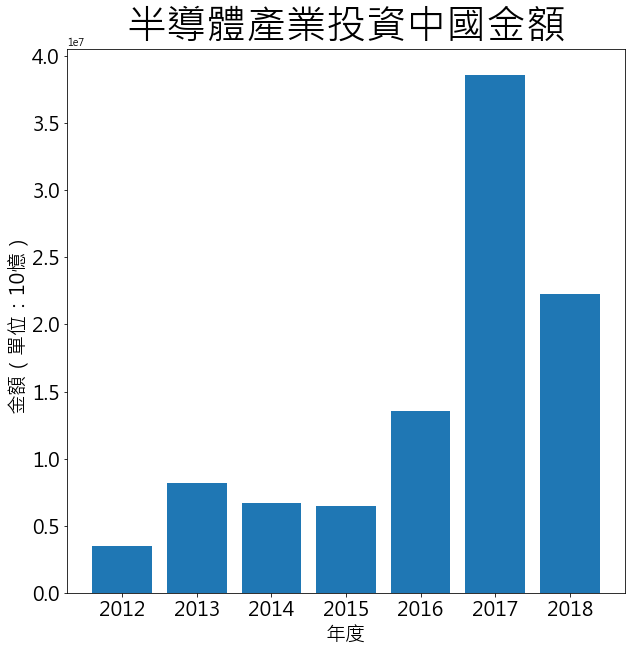

In [22]:
y = df_indus.loc['M2324 半導體', :].values
x = df_indus.loc['M2324 半導體', :].index
plt.figure(figsize = (10,10))
plt.bar(x,y, )
plt.title('半導體產業投資中國金額',fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('年度',fontsize = 20)
plt.ylabel('金額（單位：10憶）', fontsize = 20)
plt.show()

In [8]:
y = df_indus.loc['M2324 半導體', :]
y

2012     3481459.0
2013     8193543.0
2014     6722771.0
2015     6480199.0
2016    13562687.0
2017    38585643.0
2018    22281251.0
Name: M2324 半導體, dtype: float64

In [118]:
new_col = [str(x)+'成長率(%)' for x in range(2013, 2019)]
time = [x for x in range(2013, 2019)]
for year,col in zip(time,new_col):
    df_indus[col] = ( (df_indus[year]-df_indus[year-1])/df_indus[year-1]) * 100
    


In [119]:
df_indus = df_indus.drop(columns = [x for x in range(2012, 2019)])
df_indus

2013成長率(%)  2014成長率(%)  2015成長率(%)  2016成長率(%)   2017成長率(%)  \
TSE新產業名                                                                    
M2328 電子零組件  -28.935899   60.317577   24.978716  -83.961144   175.512117   
M2326 光電業     -2.519057   28.810912   14.318373  -85.076279   -76.836151   
M2324 半導體    135.347968  -17.950379   -3.608215  109.294298   184.498514   
M2325 電腦及週邊   -8.109155  -21.483886  -11.262265  -12.048387   -21.605945   
M9900 其他       7.209044  -29.212048  -42.012905  -62.885472   731.240430   
M2331 其他電子業    1.827431  -50.211923    3.930197  434.396831   -98.638678   
M2327 通信網路業   -3.796959   12.611776   21.366065  -73.580237   -92.866554   
M1500 電機機械    99.211583   97.387359    1.427340  -31.676808   -57.015233   
M1721 化學工業   183.200517   -3.570983  -67.555197  -14.345235   115.409382   
M1400 紡織纖維   -63.870151  120.709286  -35.322205  -46.934316    -4.144813   
M2500 建材營造    14.149025  -54.083158  -70.419214  -34.080577 -1316.789234   
M1722 生技醫療    -8.978357   16.605847  -67.031854  108.120744   112.657883   
M2800 金融業      3.279625  170.874043  -44.487828  -32.061024   -71.558898   
M2200 汽車工業   -29.784829    0.983731   29.300021  -31.974331   159.539204   
M1300 塑膠工業    -4.936328  -12.966584   11.844104  151.300212     8.029464   
M2329 電子通路業  108.419202  -93.380848   -5.483396  205.102689   -75.463141   
M1200 食品工業    70.689374   28.953178  -33.807848  -50.852486    11.613053   

              2018成長率(%)  
TSE新產業名                   
M2328 電子零組件   268.187036  
M2326 光電業     977.830991  
M2324 半導體     -42.255074  
M2325 電腦及週邊    31.474219  
M9900 其他      -59.373777  
M2331 其他電子業   777.422624  
M2327 通信網路業  2062.026428  
M1500 電機機械    -24.170167  
M1721 化學工業    -71.967864  
M1400 紡織纖維    -81.718338  
M2500 建材營造   -106.893493  
M1722 生技醫療    -32.372290  
M2800 金融業      22.272877  
M2200 汽車工業     75.278878  
M1300 塑膠工業     70.992288  
M2329 電子通路業   115.620772  
M1200 食品工業    -27.960623

In [121]:
df_indus = abs(df_indus)
new_col = [str(x)+'成長率(%)' for x in range(2013, 2019)]
win_set = set()
year_win = dict()
for col in new_col:
    rate = dict()
    df_indus = df_indus.sort_values(by = col, ascending = False)
    for ind,val in zip(df_indus[col][0:3].index, df_indus[col][0:3].values):
        rate[ind] = val
        win_set.add(ind)
    year_win[col] = rate
    
    
year_win

{'2013成長率(%)': {'M1721 化學工業': 183.20051746623946,
  'M2324 半導體': 135.34796761932282,
  'M2329 電子通路業': 108.41920173312157},
 '2014成長率(%)': {'M2800 金融業': 170.8740426850008,
  'M1400 紡織纖維': 120.7092858258254,
  'M1500 電機機械': 97.38735887634456},
 '2015成長率(%)': {'M2500 建材營造': 70.41921407001816,
  'M1721 化學工業': 67.55519692709875,
  'M1722 生技醫療': 67.03185365409021},
 '2016成長率(%)': {'M2331 其他電子業': 434.3968311360748,
  'M2329 電子通路業': 205.1026887288065,
  'M1300 塑膠工業': 151.3002123722657},
 '2017成長率(%)': {'M2500 建材營造': 1316.7892337778555,
  'M9900 其他': 731.2404296180767,
  'M2324 半導體': 184.4985141956015},
 '2018成長率(%)': {'M2327 通信網路業': 2062.026428146787,
  'M2326 光電業': 977.8309907177689,
  'M2331 其他電子業': 777.4226243776748}}

In [122]:
print(len(win_set))
win_set

13


{'M1300 塑膠工業',
 'M1400 紡織纖維',
 'M1500 電機機械',
 'M1721 化學工業',
 'M1722 生技醫療',
 'M2324 半導體',
 'M2326 光電業',
 'M2327 通信網路業',
 'M2329 電子通路業',
 'M2331 其他電子業',
 'M2500 建材營造',
 'M2800 金融業',
 'M9900 其他'}

In [64]:
for ind in df_indus.index:
    if ind not in win_set:
        df_indus = df_indus.drop(index = ind)
        
df_indus
        


2013成長率(%)  2014成長率(%)  2015成長率(%)  2016成長率(%)  2017成長率(%)  \
TSE新產業名                                                                   
M2327 通信網路業   -3.796959   12.611776   21.366065  -73.580237  -92.866554   
M2326 光電業     -2.519057   28.810912   14.318373  -85.076279  -76.836151   
M2331 其他電子業    1.827431  -50.211923    3.930197  434.396831  -98.638678   
M2328 電子零組件  -28.935899   60.317577   24.978716  -83.961144  175.512117   
M2329 電子通路業  108.419202  -93.380848   -5.483396  205.102689  -75.463141   
M2200 汽車工業   -29.784829    0.983731   29.300021  -31.974331  159.539204   
M1300 塑膠工業    -4.936328  -12.966584   11.844104  151.300212    8.029464   
M2800 金融業      3.279625  170.874043  -44.487828  -32.061024  -71.558898   
M1500 電機機械    99.211583   97.387359    1.427340  -31.676808  -57.015233   
M2324 半導體    135.347968  -17.950379   -3.608215  109.294298  184.498514   
M9900 其他       7.209044  -29.212048  -42.012905  -62.885472  731.240430   
M1721 化學工業   183.200517   -3.570983  -67.555197  -14.345235  115.409382   
M1400 紡織纖維   -63.870151  120.709286  -35.322205  -46.934316   -4.144813   

              2018成長率(%)  
TSE新產業名                   
M2327 通信網路業  2062.026428  
M2326 光電業     977.830991  
M2331 其他電子業   777.422624  
M2328 電子零組件   268.187036  
M2329 電子通路業   115.620772  
M2200 汽車工業     75.278878  
M1300 塑膠工業     70.992288  
M2800 金融業      22.272877  
M1500 電機機械    -24.170167  
M2324 半導體     -42.255074  
M9900 其他      -59.373777  
M1721 化學工業    -71.967864  
M1400 紡織纖維    -81.718338

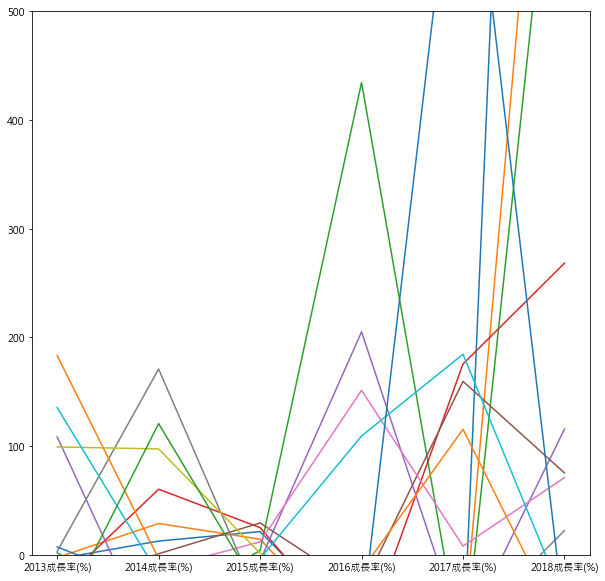

In [100]:
plt.figure(figsize = (10,10))
x = list(df_indus[n-1:n].columns)
for n in range(1,len(df_indus)+1):
    plt.plot(x, df_indus[n-1:n].values.flatten())
    
plt.yticks()
plt.ylim(0,500)
plt.show()

In [78]:
df_indus[n-1:n].columns

Index(['2013成長率(%)', '2014成長率(%)', '2015成長率(%)', '2016成長率(%)', '2017成長率(%)',
       '2018成長率(%)'],
      dtype='object')

In [84]:
df_indus

2013成長率(%)  2014成長率(%)  2015成長率(%)  2016成長率(%)  2017成長率(%)  \
TSE新產業名                                                                   
M2327 通信網路業   -3.796959   12.611776   21.366065  -73.580237  -92.866554   
M2326 光電業     -2.519057   28.810912   14.318373  -85.076279  -76.836151   
M2331 其他電子業    1.827431  -50.211923    3.930197  434.396831  -98.638678   
M2328 電子零組件  -28.935899   60.317577   24.978716  -83.961144  175.512117   
M2329 電子通路業  108.419202  -93.380848   -5.483396  205.102689  -75.463141   
M2200 汽車工業   -29.784829    0.983731   29.300021  -31.974331  159.539204   
M1300 塑膠工業    -4.936328  -12.966584   11.844104  151.300212    8.029464   
M2800 金融業      3.279625  170.874043  -44.487828  -32.061024  -71.558898   
M1500 電機機械    99.211583   97.387359    1.427340  -31.676808  -57.015233   
M2324 半導體    135.347968  -17.950379   -3.608215  109.294298  184.498514   
M9900 其他       7.209044  -29.212048  -42.012905  -62.885472  731.240430   
M1721 化學工業   183.200517   -3.570983  -67.555197  -14.345235  115.409382   
M1400 紡織纖維   -63.870151  120.709286  -35.322205  -46.934316   -4.144813   

              2018成長率(%)  
TSE新產業名                   
M2327 通信網路業  2062.026428  
M2326 光電業     977.830991  
M2331 其他電子業   777.422624  
M2328 電子零組件   268.187036  
M2329 電子通路業   115.620772  
M2200 汽車工業     75.278878  
M1300 塑膠工業     70.992288  
M2800 金融業      22.272877  
M1500 電機機械    -24.170167  
M2324 半導體     -42.255074  
M9900 其他      -59.373777  
M1721 化學工業    -71.967864  
M1400 紡織纖維    -81.718338

In [123]:
df_indus

2013成長率(%)  2014成長率(%)  2015成長率(%)  2016成長率(%)   2017成長率(%)  \
TSE新產業名                                                                    
M2327 通信網路業    3.796959   12.611776   21.366065   73.580237    92.866554   
M2326 光電業      2.519057   28.810912   14.318373   85.076279    76.836151   
M2331 其他電子業    1.827431   50.211923    3.930197  434.396831    98.638678   
M2328 電子零組件   28.935899   60.317577   24.978716   83.961144   175.512117   
M2329 電子通路業  108.419202   93.380848    5.483396  205.102689    75.463141   
M2500 建材營造    14.149025   54.083158   70.419214   34.080577  1316.789234   
M1400 紡織纖維    63.870151  120.709286   35.322205   46.934316     4.144813   
M2200 汽車工業    29.784829    0.983731   29.300021   31.974331   159.539204   
M1721 化學工業   183.200517    3.570983   67.555197   14.345235   115.409382   
M1300 塑膠工業     4.936328   12.966584   11.844104  151.300212     8.029464   
M9900 其他       7.209044   29.212048   42.012905   62.885472   731.240430   
M2324 半導體    135.347968   17.950379    3.608215  109.294298   184.498514   
M1722 生技醫療     8.978357   16.605847   67.031854  108.120744   112.657883   
M2325 電腦及週邊    8.109155   21.483886   11.262265   12.048387    21.605945   
M1200 食品工業    70.689374   28.953178   33.807848   50.852486    11.613053   
M1500 電機機械    99.211583   97.387359    1.427340   31.676808    57.015233   
M2800 金融業      3.279625  170.874043   44.487828   32.061024    71.558898   

              2018成長率(%)  
TSE新產業名                   
M2327 通信網路業  2062.026428  
M2326 光電業     977.830991  
M2331 其他電子業   777.422624  
M2328 電子零組件   268.187036  
M2329 電子通路業   115.620772  
M2500 建材營造    106.893493  
M1400 紡織纖維     81.718338  
M2200 汽車工業     75.278878  
M1721 化學工業     71.967864  
M1300 塑膠工業     70.992288  
M9900 其他       59.373777  
M2324 半導體      42.255074  
M1722 生技醫療     32.372290  
M2325 電腦及週邊    31.474219  
M1200 食品工業     27.960623  
M1500 電機機械     24.170167  
M2800 金融業      22.272877

In [95]:
df_indus[n-1:n].values.flatten()

array([  -3.79695894,   12.6117761 ,   21.36606462,  -73.58023711,
        -92.8665539 , 2062.02642815])

In [ ]:
list(df2_total['公司代碼'].values)

In [8]:
for x in list(df2_total['公司代碼'].values):
    print(x[0:4])

2330
2303
1326
2201
9940
4938
2882
1101
3044
2603
5880
1907
1802
1313
1304
2352
1216
1308
2883
2388
9941
2912
2454
1314
2456
2104
1402
1710
6239
1227
1598
5469
2392
1717
6269
2207
9939
6235
1709
4532
2501
3032
6414
6288
2464
4961
8039
1904
6605
2905
3037
6409
1218
2308
2427
4720
3607
3164
1609
9919
1789
4555
2393
4414
1339
2331
6251
1718
3501
1522
3013
2472
4566
3605
6215
2609
9933
6168
3010
1712
1526
8341
1806
3705
4438
2516
2614
2382
5285
5471
6698
1909
4164
2448
3004
3005
2369
2353
3229
9935
1605
2466
8261
3035
3443
2636
2884
2231
1604
3048
6196
2357
8481
1536
3588
1786
2358
2498
4133
6579
3617
6152
2453
4562
6005
6024
2514
2345
3702
2029
3031
6205
8422
3023
3356
5434
3312
2439
1217
2373
2049
2731
8103
1735
9925
4967
5203
1707
4155
2465
2371
1611
1805
3231
1102
1103
1108
1109
1201
1210
1213
1215
1219
1225
1229
1231
1232
1233
1234
1301
1303
1305
1307
1309
1310
1312
1315
1316
1319
1321
1323
1324
1325
1409
1417
1419
1423
1432
1434
1435
1437
1441
1443
1447
1454
1455
1457
1459
1460
1464


In [10]:
df2_total.to_csv('2012_2018.csv')

# 各產業累積投資金額圖

In [29]:
df2_total = pd.read_excel('大陸投資2012-2018_改.xlsx', sheet_name = 9)
df2_total.shape
df2_total = df2_total.drop(columns = ['年月', '轉投資名稱'])
df2_total.rename(columns = {'2017本期匯出金額(NTD)': 2017}, inplace = True)
df2_total = df2_total[['公司代碼','TSE新產業名','TEJ子產業名'] + [x for x in range(2012, 2019)]]
df2_total = df2_total.fillna(0)

industry_name = df2_total.groupby('TSE新產業名').size().sort_values(ascending = False)
industry_name = industry_name[industry_name > 15].index
time = [(x) for x in range(2012, 2019)]
total_info = []
bot = np.zeros(len(time))
for industry in industry_name:
    stage = df2_total.groupby('TSE新產業名').get_group(industry)
    Y = np.array([sum(stage[year]) for year in time])
    total_info.append(Y)
    
df_indus = pd.DataFrame(total_info, index = industry_name, columns = time)
df_indus = df_indus.replace(0,0.1)
df_indus

2012        2013        2014        2015        2016  \
TSE新產業名                                                                   
M2328 電子零組件  12388345.0   8803666.0  14113824.0  17639276.0   2829138.0   
M2326 光電業     8983837.0   8757529.0  11280653.0  12895859.0   1924542.0   
M2324 半導體     3481459.0   8193543.0   6722771.0   6480199.0  13562687.0   
M2325 電腦及週邊  16399378.0  15069527.0  11832007.0  10499455.0   9234440.0   
M9900 其他      4530171.0   4856753.0   3437996.0   1993594.0    739913.0   
M2331 其他電子業  21646671.0  22042249.0  10974412.0  11405728.0  60951849.0   
M2327 通信網路業   2986785.0   2873378.0   3235762.0   3927117.0   1037535.0   
M1500 電機機械     705845.0   1406125.0   2775513.0   2815129.0   1923386.0   
M1721 化學工業    1425407.0   4036760.0   3892608.0   1262949.0   1081776.0   
M1400 紡織纖維    4076657.0   1472890.0   3250805.0   2102549.0   1115732.0   
M2500 建材營造    5368476.0   6128063.0   2813813.0    832348.0    548679.0   
M1722 生技醫療     806250.0    733862.0    855726.0    282117.0    587144.0   
M2800 金融業    24763168.0  25575307.0  69276868.0  38457094.0  26127356.0   
M2200 汽車工業    3973778.0   2790195.0   2817643.0   3643213.0   2478320.0   
M1300 塑膠工業    5091538.0   4840203.0   4212594.0   4711538.0  11840105.0   
M2329 電子通路業   2029171.0   4229182.0    279936.0    264586.0    807259.0   
M1200 食品工業    3144648.0   5367580.0   6921665.0   4581599.0   2251742.0   

                   2017        2018  
TSE新產業名                              
M2328 電子零組件   7794618.0  28698773.0  
M2326 光電業      445798.0   4804949.0  
M2324 半導體    38585643.0  22281251.0  
M2325 電腦及週邊   7239252.0   9517750.0  
M9900 其他      6150456.0   2498698.0  
M2331 其他電子業    829751.0   7280423.0  
M2327 通信網路業     74012.0   1600159.0  
M1500 電機機械     826763.0    626933.0  
M1721 化學工業    2330247.0    653218.0  
M1400 紡織纖維    1069487.0    195520.0  
M2500 建材營造   -6676267.0    460228.0  
M1722 生技醫療    1248608.0    844405.0  
M2800 金融業     7430908.0   9085985.0  
M2200 汽車工業    6432212.0  11274309.0  
M1300 塑膠工業   12790802.0  21871285.0  
M2329 電子通路業    198076.0    427093.0  
M1200 食品工業    2513238.0   1810521.0

In [34]:
new_col = [(str(x)+'累計金額') for x in range(2012,2019)]
time = [(x) for x in range(2012, 2019)]
orders = 0
for x in range(2013, 2020):
    df_indus[new_col[orders]] = sum([df_indus[z] for z in range(2012,x)])
    orders += 1
    
df_indus = df_indus.drop(columns = time)
df_indus

2012累計金額    2013累計金額     2014累計金額     2015累計金額     2016累計金額  \
TSE新產業名                                                                      
M2328 電子零組件  12388345.0  21192011.0   35305835.0   52945111.0   55774249.0   
M2326 光電業     8983837.0  17741366.0   29022019.0   41917878.0   43842420.0   
M2324 半導體     3481459.0  11675002.0   18397773.0   24877972.0   38440659.0   
M2325 電腦及週邊  16399378.0  31468905.0   43300912.0   53800367.0   63034807.0   
M9900 其他      4530171.0   9386924.0   12824920.0   14818514.0   15558427.0   
M2331 其他電子業  21646671.0  43688920.0   54663332.0   66069060.0  127020909.0   
M2327 通信網路業   2986785.0   5860163.0    9095925.0   13023042.0   14060577.0   
M1500 電機機械     705845.0   2111970.0    4887483.0    7702612.0    9625998.0   
M1721 化學工業    1425407.0   5462167.0    9354775.0   10617724.0   11699500.0   
M1400 紡織纖維    4076657.0   5549547.0    8800352.0   10902901.0   12018633.0   
M2500 建材營造    5368476.0  11496539.0   14310352.0   15142700.0   15691379.0   
M1722 生技醫療     806250.0   1540112.0    2395838.0    2677955.0    3265099.0   
M2800 金融業    24763168.0  50338475.0  119615343.0  158072437.0  184199793.0   
M2200 汽車工業    3973778.0   6763973.0    9581616.0   13224829.0   15703149.0   
M1300 塑膠工業    5091538.0   9931741.0   14144335.0   18855873.0   30695978.0   
M2329 電子通路業   2029171.0   6258353.0    6538289.0    6802875.0    7610134.0   
M1200 食品工業    3144648.0   8512228.0   15433893.0   20015492.0   22267234.0   

                2017累計金額     2018累計金額  
TSE新產業名                                
M2328 電子零組件   63568867.0   92267640.0  
M2326 光電業     44288218.0   49093167.0  
M2324 半導體     77026302.0   99307553.0  
M2325 電腦及週邊   70274059.0   79791809.0  
M9900 其他      21708883.0   24207581.0  
M2331 其他電子業  127850660.0  135131083.0  
M2327 通信網路業   14134589.0   15734748.0  
M1500 電機機械    10452761.0   11079694.0  
M1721 化學工業    14029747.0   14682965.0  
M1400 紡織纖維    13088120.0   13283640.0  
M2500 建材營造     9015112.0    9475340.0  
M1722 生技醫療     4513707.0    5358112.0  
M2800 金融業    191630701.0  200716686.0  
M2200 汽車工業    22135361.0   33409670.0  
M1300 塑膠工業    43486780.0   65358065.0  
M2329 電子通路業    7808210.0    8235303.0  
M1200 食品工業    24780472.0   26590993.0

# 畫散布圖

In [39]:
# 需要的欄位
col_want = ['  現金及約當現金','  不動產廠房及設備','  股本','    未分配盈餘','年月','公司','本期匯出金額(NTD)']

col_set = set(col_want)
df_orig = pd.read_excel('2012-2018全資料.xlsx', sheet_name = 0)
df_orig.rename(columns = {df_orig.columns[0]:'公司'}, inplace = True)
df_final = df_orig[['公司']]
xl = pd.ExcelFile('2012-2018全資料.xlsx')   

for sheet in tqdm_notebook(xl.sheet_names):
    col_need = []
    df_orig = pd.read_excel('2012-2018全資料.xlsx', sheet_name = sheet)
    df_orig.rename(columns = {df_orig.columns[0]:'公司'}, inplace = True)
    df_orig.rename(columns = {'年度':'年月'}, inplace = True)
    for col in df_orig.columns:
        if col in col_set:
            col_need.append(col)
    two_para = True if ('年月' in df_final.columns) &('年月' in df_orig[col_need].columns) else False
   
    df_final = pd.merge(df_final, df_orig[col_need], on = ['公司','年月'] if two_para else ['公司'])
    print(df_final.shape)
    

df_final


(863, 1)
(4633, 3)
(4621, 3)
(4621, 7)
(4621, 7)
(4621, 7)
(4621, 7)
(4621, 7)
(4621, 7)
(4621, 7)
(4621, 7)



公司         年月  本期匯出金額(NTD)     現金及約當現金    不動產廠房及設備        股本  \
0     1101 台泥 2018-12-28     523224.0  48507889.0    91093825  53080599   
1     1101 台泥 2017-12-29    3422400.0  26331218.0    94709404  42465090   
2     1101 台泥 2016-12-30    6259725.0  28179758.0   101799766  36921759   
3     1101 台泥 2015-12-31    6947298.0  38977360.0   113310134  36921759   
4     1101 台泥 2014-12-31    1269063.0  30514042.0   108445563  36921759   
...       ...        ...          ...         ...         ...       ...   
4616  9955 佳龍 2016-12-30          0.0    165547.0     2062474   1032082   
4617  9955 佳龍 2015-12-31          0.0    223247.0     2030288   1032082   
4618  9955 佳龍 2014-12-31          0.0    377325.0     1916967   1032082   
4619  9955 佳龍 2013-12-31          0.0    368287.0     1589919   1032082   
4620  9955 佳龍 2012-12-28          0.0    389583.0     1022891   1067682   

           未分配盈餘  
0     33755165.0  
1     21944766.0  
2     20897776.0  
3     19710897.0  
4     24750795.0  
...          ...  
4616   -244378.0  
4617   -116543.0  
4618      8752.0  
4619    -28864.0  
4620     72058.0  

[4621 rows x 7 columns]

In [43]:
df_final.groupby('年月').size().index

DatetimeIndex(['2012-12-28', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-30', '2017-12-29', '2018-12-28'],
              dtype='datetime64[ns]', name='年月', freq=None)

In [64]:
df_final = df_final.fillna(0)
time = df_final.groupby('年月').size()
col_want = ['  現金及約當現金','  不動產廠房及設備','  股本','    未分配盈餘','本期匯出金額(NTD)']


total_info = []
bot = np.zeros(len(time))
for T in time.index:
    stage = df_final.groupby('年月').get_group(T)
    Y = np.array([sum(stage[col]) for col in col_want])
    total_info.append(Y)
    
df_indus = pd.DataFrame(total_info, index = time.index, columns = col_want)
df_indus

現金及約當現金      不動產廠房及設備            股本         未分配盈餘  \
年月                                                                   
2012-12-28  4.518250e+09  7.621122e+09  5.731688e+09  2.226016e+09   
2013-12-31  5.259748e+09  7.826647e+09  5.946950e+09  2.743535e+09   
2014-12-31  5.865093e+09  7.938327e+09  5.881081e+09  3.417777e+09   
2015-12-31  5.676532e+09  7.947387e+09  6.098262e+09  3.829158e+09   
2016-12-30  5.719795e+09  8.067077e+09  6.207940e+09  4.177633e+09   
2017-12-29  6.119708e+09  8.195008e+09  6.272500e+09  4.820694e+09   
2018-12-28  6.172304e+09  8.532505e+09  6.412363e+09  5.212635e+09   

            本期匯出金額(NTD)  
年月                       
2012-12-28  140058790.0  
2013-12-31  145825294.0  
2014-12-31  168620879.0  
2015-12-31  140449066.0  
2016-12-30  151218081.0  
2017-12-29  103481249.0  
2018-12-28  136020088.0


# 本期匯出金額(NTD) 對 現金及約當現金

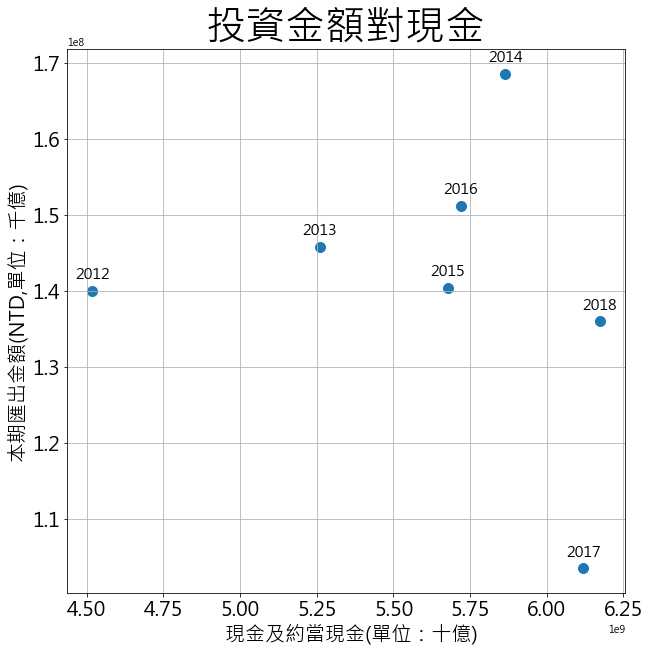

In [96]:
plt.figure(figsize = (10,10))
Y = df_indus['本期匯出金額(NTD)'].values
X = df_indus['  現金及約當現金'].values

plt.scatter(X,Y,s = 100)
year = 2012
for x,y in zip(X,Y):
    plt.text(x, y+1000000, '%d' % year, ha='center', va= 'bottom',fontsize=15)
    year += 1
    
plt.title('投資金額對現金',fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('  現金及約當現金(單位：十億)', fontsize = 20)
plt.ylabel('本期匯出金額(NTD,單位：千億)', fontsize = 20)
plt.grid(axis="both")

plt.show()

# 本期匯出金額(NTD) 對 不動產廠房及設備	

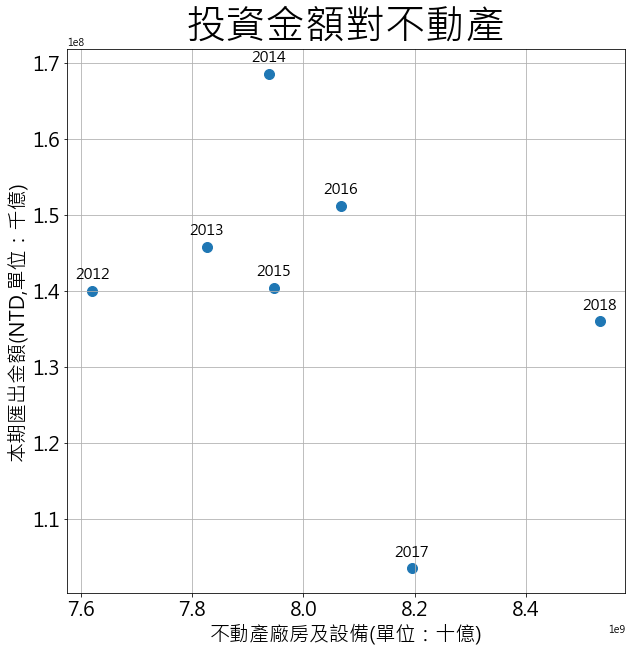

In [93]:
plt.figure(figsize = (10,10))
Y = df_indus['本期匯出金額(NTD)'].values
X = df_indus['  不動產廠房及設備'].values

plt.scatter(X,Y,s = 100)
year = 2012
for x,y in zip(X,Y):
    plt.text(x, y+1000000, '%d' % year, ha='center', va= 'bottom',fontsize=15)
    year += 1
    
plt.title('投資金額對不動產',fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('不動產廠房及設備(單位：十億)', fontsize = 20)
plt.ylabel('本期匯出金額(NTD,單位：千億)', fontsize = 20)
plt.grid(axis="both")

plt.show()

# 本期匯出金額(NTD) 對 股本

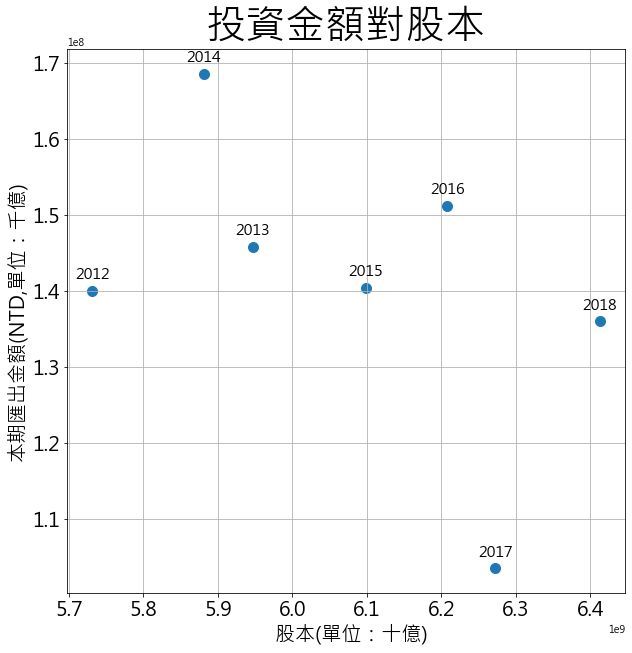

In [94]:
plt.figure(figsize = (10,10))
Y = df_indus['本期匯出金額(NTD)'].values
X = df_indus['  股本'].values

plt.scatter(X,Y,s = 100)
year = 2012
for x,y in zip(X,Y):
    plt.text(x, y+1000000, '%d' % year, ha='center', va= 'bottom',fontsize=15)
    year += 1
    
plt.title('投資金額對股本',fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('  股本(單位：十億)', fontsize = 20)
plt.ylabel('本期匯出金額(NTD,單位：千億)', fontsize = 20)
plt.grid(axis="both")

plt.show()

# 本期匯出金額(NTD) 對未分配盈餘

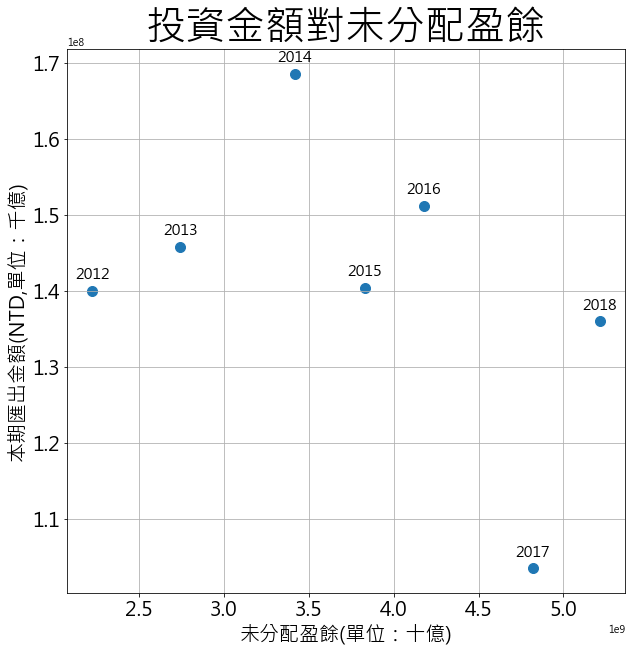

In [95]:
plt.figure(figsize = (10,10))
Y = df_indus['本期匯出金額(NTD)'].values
X = df_indus['    未分配盈餘'].values

plt.scatter(X,Y,s = 100)
year = 2012
for x,y in zip(X,Y):
    plt.text(x, y+1000000, '%d' % year, ha='center', va= 'bottom',fontsize=15)
    year += 1
    
plt.title('投資金額對未分配盈餘',fontsize = 40)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('未分配盈餘(單位：十億)', fontsize = 20)
plt.ylabel('本期匯出金額(NTD,單位：千億)', fontsize = 20)
plt.grid(axis="both")

plt.show()